In [ ]:
! pip install plotly

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os
import zipfile
import numpy as np
import plotly.graph_objects as go

Importing the dataset:

In [ ]:
!kaggle datasets download -d najzeko/steam-reviews-2021

Dataset URL: https://www.kaggle.com/datasets/najzeko/steam-reviews-2021
License(s): GPL-2.0
100% 2.97G/2.97G [00:44<00:00, 54.1MB/s]
100% 2.97G/2.97G [00:44<00:00, 72.0MB/s]


In [ ]:
!unzip steam-reviews-2021.zip

Archive:  steam-reviews-2021.zip
  inflating: steam_reviews.csv       


In [ ]:
# Function to parse time columns
def dateparse(time_in_secs):
    return pd.to_datetime(time_in_secs, unit='s')

# **Research Questions**

## **RQ1**

**Before diving deep into the dataset provided, it's crucial to understand its structure and main features. Data scientists usually take the first step of performing an Exploratory Data Analysis (EDA). What can you say about our dataset? Please perform an EDA and summarize the dataset's key characteristics using visualizations and tabular summaries.**

In [ ]:
data=dataset

In [ ]:
# Checking the column names
print(data.columns)

Index(['app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')


In [ ]:
# Displaying the first few rows
print("İlk 5 Satır: / First 5 Rows: / Prime 5 Righe:")
print(data.head())

İlk 5 Satır: / First 5 Rows: / Prime 5 Righe:
   app_id                  app_name  review_id  language  \
0  292030  The Witcher 3: Wild Hunt   85185598  schinese   
1  292030  The Witcher 3: Wild Hunt   85185250  schinese   
2  292030  The Witcher 3: Wild Hunt   85185111  schinese   
3  292030  The Witcher 3: Wild Hunt   85184605   english   
4  292030  The Witcher 3: Wild Hunt   85184287  schinese   

                                              review   timestamp_created  \
0                            不玩此生遗憾，RPG游戏里的天花板，太吸引人了 2021-01-23 06:00:29   
1                                 拔DIAO无情打桩机--杰洛特!!! 2021-01-23 05:50:30   
2                                              巫师3NB 2021-01-23 05:46:40   
3  One of the best RPG's of all time, worthy of a... 2021-01-23 05:32:50   
4                                                 大作 2021-01-23 05:23:47   

    timestamp_updated  recommended  votes_helpful  votes_funny  ...  \
0 2021-01-23 06:00:29         True              0            0  .

In [ ]:
# Displaying column information
print("\nVeri Bilgisi: / Data Information: / Informazioni sui Dati:")
data.info()


Veri Bilgisi: / Data Information: / Informazioni sui Dati:
<class 'pandas.core.frame.DataFrame'>
Index: 5981464 entries, 0 to 6000000
Data columns (total 22 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   app_id                          int64         
 1   app_name                        object        
 2   review_id                       int64         
 3   language                        object        
 4   review                          object        
 5   timestamp_created               datetime64[ns]
 6   timestamp_updated               datetime64[ns]
 7   recommended                     bool          
 8   votes_helpful                   int64         
 9   votes_funny                     int64         
 10  weighted_vote_score             float64       
 11  comment_count                   int64         
 12  steam_purchase                  bool          
 13  received_for_free               bool          


In [ ]:
# Basic statistical summary
print("\nVeri İstatistikleri: / Data Statistics: / Statistiche sui Dati:")
print(data.describe(include='all'))


Veri İstatistikleri: / Data Statistics: / Statistiche sui Dati:
              app_id     app_name     review_id language   review  \
count   5.981464e+06      5981464  5.981464e+06  5981464  5981464   
unique           NaN           87           NaN       28  4726483   
top              NaN  Garry's Mod           NaN  english     good   
freq             NaN       653815           NaN  2636465    29509   
mean    3.389814e+05          NaN  5.291037e+07      NaN      NaN   
min     7.000000e+01          NaN  4.300000e+01      NaN      NaN   
25%     2.273000e+05          NaN  3.756561e+07      NaN      NaN   
50%     2.920300e+05          NaN  5.604679e+07      NaN      NaN   
75%     4.319600e+05          NaN  7.056849e+07      NaN      NaN   
max     1.225330e+06          NaN  8.521823e+07      NaN      NaN   
std     2.634345e+05          NaN  2.120200e+07      NaN      NaN   

                    timestamp_created              timestamp_updated  \
count                         5981

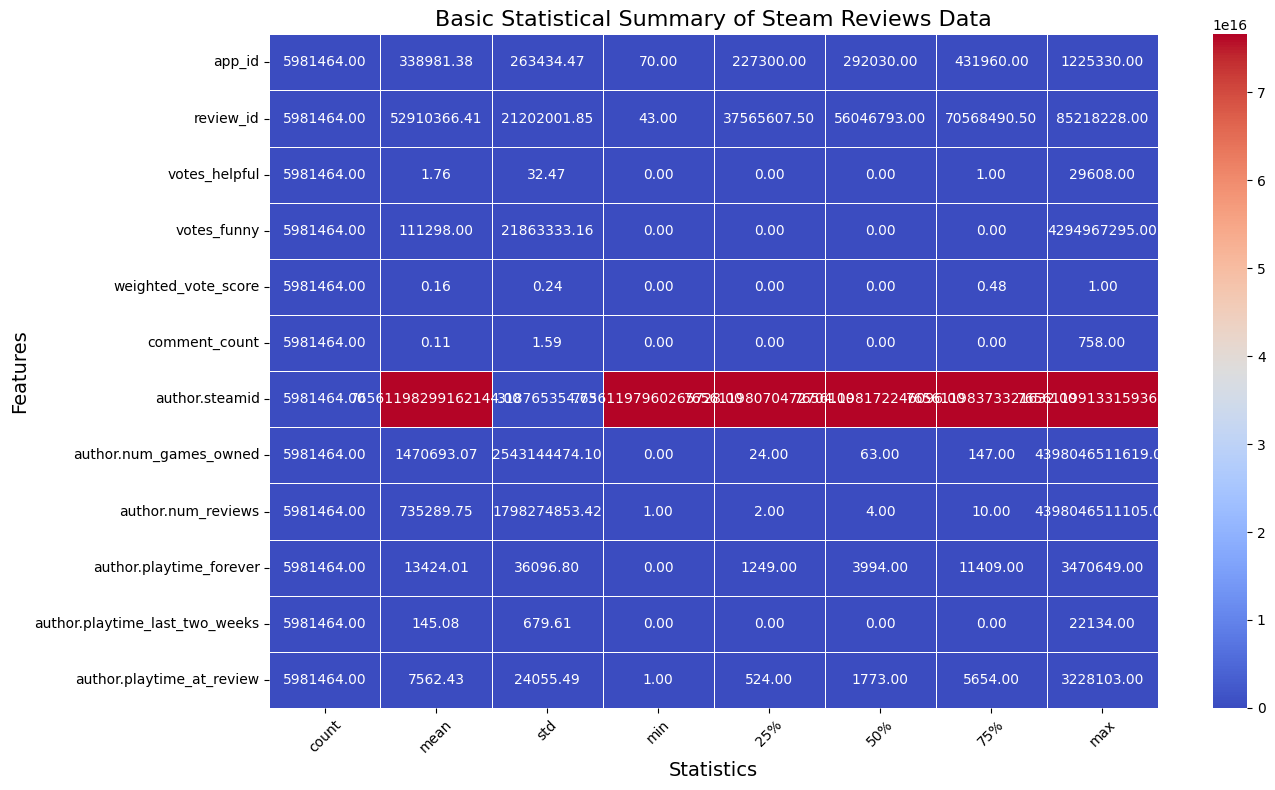

In [ ]:
# Getting basic statistics for numeric data
numeric_summary = data.select_dtypes(include='number').describe()  # Sadece sayısal verileri seçin

# Visualizing the summary table
plt.figure(figsize=(14, 8))
sns.heatmap(numeric_summary.T, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Basic Statistical Summary of Steam Reviews Data', fontsize=16)
# Temel İstatistik Özeti: Steam İnceleme Verisi
# Riepilogo statistico di base dei dati delle recensioni di Steam
plt.xlabel('Statistics', fontsize=14)
# İstatistikler
# Statistiche
plt.ylabel('Features', fontsize=14)
# Özellikler
# Caratteristiche
plt.xticks(rotation=45)
plt.tight_layout()

# Displaying the graph
plt.show()

In [ ]:
# Counting missing values and percentages
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({
    'Missing Value Count / Eksik Değer Sayısı / Numero di Valori Mancanti': missing_values,
    'Missing Value Percentage / Eksik Değer Yüzdesi / Percentuale di Valori Mancanti': missing_percentage
})

print("\nEksik Veriler: / Missing Values: / Valori Mancanti:")
print(missing_df)


Eksik Veriler: / Missing Values: / Valori Mancanti:
                                Missing Value Count / Eksik Değer Sayısı / Numero di Valori Mancanti  \
app_id                                                                          0                      
app_name                                                                        0                      
review_id                                                                       0                      
language                                                                        0                      
review                                                                          0                      
timestamp_created                                                               0                      
timestamp_updated                                                               0                      
recommended                                                                     0                      
votes_helpf

In [ ]:
# Counting missing values and percentages
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({
    'Missing Value Count / Eksik Değer Sayısı / Numero di Valori Mancanti': missing_values,
    'Missing Value Percentage / Eksik Değer Yüzdesi / Percentuale di Valori Mancanti': missing_percentage
})

print("\nEksik Veriler: / Missing Values: / Valori Mancanti:")
print(missing_df)


Eksik Veriler: / Missing Values: / Valori Mancanti:
                                Missing Value Count / Eksik Değer Sayısı / Numero di Valori Mancanti  \
app_id                                                                          0                      
app_name                                                                        0                      
review_id                                                                       0                      
language                                                                        0                      
review                                                                          0                      
timestamp_created                                                               0                      
timestamp_updated                                                               0                      
recommended                                                                     0                      
votes_helpf

In [ ]:
# Filling missing 'review' values with empty string
data['review'] = data['review'].fillna('')

# Converting timestamp to datetime format
data['timestamp_created'] = pd.to_datetime(data['timestamp_created'], unit='s')

# Identifying categorical and numerical variables
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Removing 'timestamp_created' from numerical_cols since it's an index
if 'timestamp_created' in numerical_cols:
    numerical_cols.remove('timestamp_created')

print("\nCategorical Variables:")
print(categorical_cols)

print("\nNumerical Variables:")
print(numerical_cols)



Kategorik Değişkenler / Categorical Variables / Variabili Categoriali:
Index(['app_name', 'language', 'review'], dtype='object')

Sayısal Değişkenler / Numerical Variables / Variabili Numeriche:
['app_id', 'review_id', 'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count', 'author.steamid', 'author.num_games_owned', 'author.num_reviews', 'author.playtime_forever', 'author.playtime_last_two_weeks', 'author.playtime_at_review']


In [ ]:
# Setting 'timestamp_created' as index
data.set_index('timestamp_created', inplace=True)
#Checking the number of duplicate indices
duplicate_indices = data.index.duplicated().sum()
print(f"\nDuplicate indices: {duplicate_indices}")
# If duplicate indices exist, reset the index /
if duplicate_indices > 0:
    data.reset_index(inplace=True)


Duplicate indices: 285905


In [ ]:
from textblob import TextBlob

# Selecting the top 10 reviews with the most likes
top_reviews = data.nlargest(10, 'votes_helpful')

# Performing sentiment analysis
top_reviews['sentiment'] = top_reviews['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Showing the average sentiment score
avg_sentiment_top = top_reviews['sentiment'].mean()
print(f'Average Sentiment Polarity for Top 10 Helpful Reviews: {avg_sentiment_top:.2f}')

# Printing the top 10 reviews and their sentiment scores
print(top_reviews[['review', 'sentiment']])


Average Sentiment Polarity for Top 10 Helpful Reviews: 0.06
                                                    review  sentiment
5788626  [b]**NOTE: Updated as of 5/12/18**[/b]\n\n\n[h...   0.068434
3256421  Opened a hidden Ark Menu in the Main Menu scre...  -0.116721
4606795  写给想入手这款软件的人\n前言：\n这是一款什么软件相信大家看到评测应该都了解了！这也是国内...   0.000000
3728109  This piece of art right here?\n\nGame of the y...   0.082414
1532180              You can spawn watermelons.\n\n\n10/10   0.000000
3009933  ================================\nhttps://www....   0.045139
2238830  I have almost 600 hours on this game and I lik...  -0.122646
3104946             The most powerful card is credit card.   0.400000
5447247               Good game with Good Christian Values   0.250000
5144471  只狼解锁，喜极而泣\n二十三点，打开游戏\n自诩魂系，深知宫崎\n初见小怪，无所畏惧\n龙胤...   0.000000


In [ ]:
from textblob import TextBlob

# Selecting the top 10 reviews with the most likes
top_reviews = data.nlargest(10, 'votes_helpful')

# Performing sentiment analysis
top_reviews['sentiment'] = top_reviews['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Showing the average sentiment score
avg_sentiment_top = top_reviews['sentiment'].mean()
print(f'Average Sentiment Polarity for Top 10 Helpful Reviews: {avg_sentiment_top:.2f}')

# Printing the top 10 reviews and sentiment scores as a DataFrame
styled_df = top_reviews[['review', 'sentiment']].style.set_table_attributes('style="width: 80%; margin: auto; border: 1px solid black;"') \
    .set_properties(**{'text-align': 'left'}) \
    .set_caption("Top 10 Helpful Reviews with Sentiment Scores")

# Displaying the DataFrame
styled_df


Average Sentiment Polarity for Top 10 Helpful Reviews: 0.06


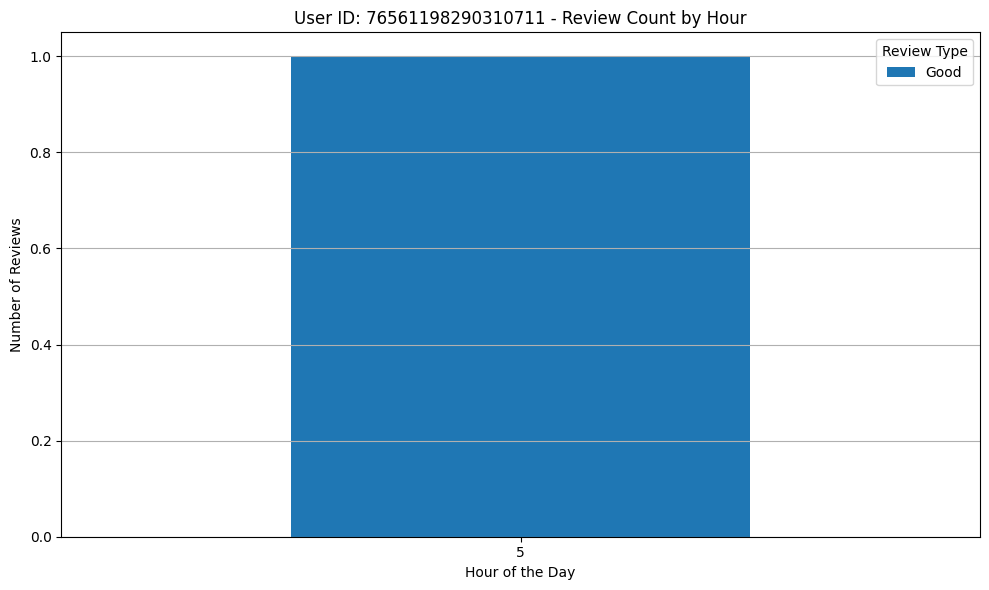

User ID: 76561198290310711 - Review Summary:
         weighted_vote_score review_type  hour
5788626             0.953941        Good     5




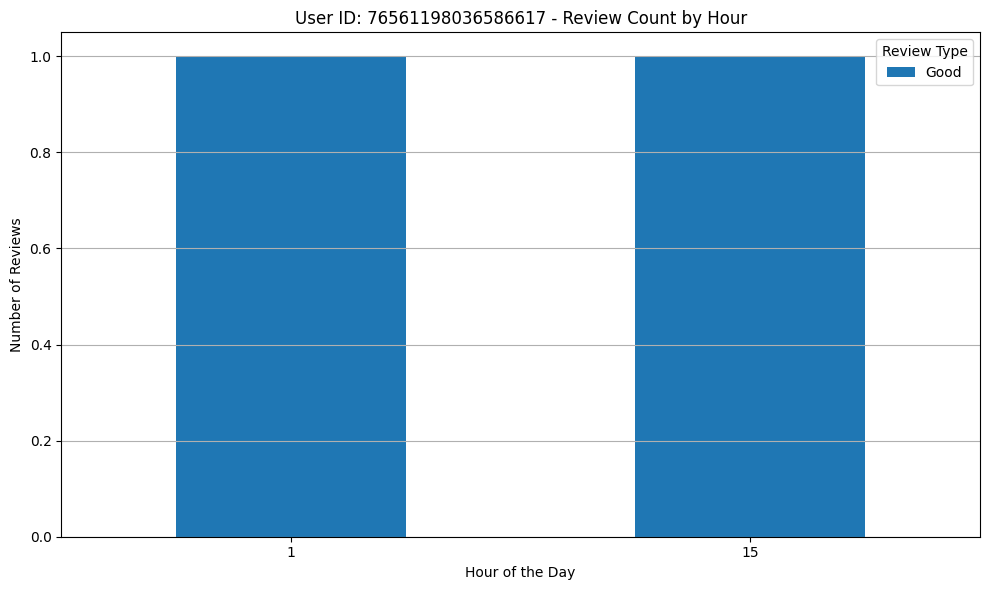

User ID: 76561198036586617 - Review Summary:
         weighted_vote_score review_type  hour
3256421             0.903982        Good     1
5247440             0.529412        Good    15




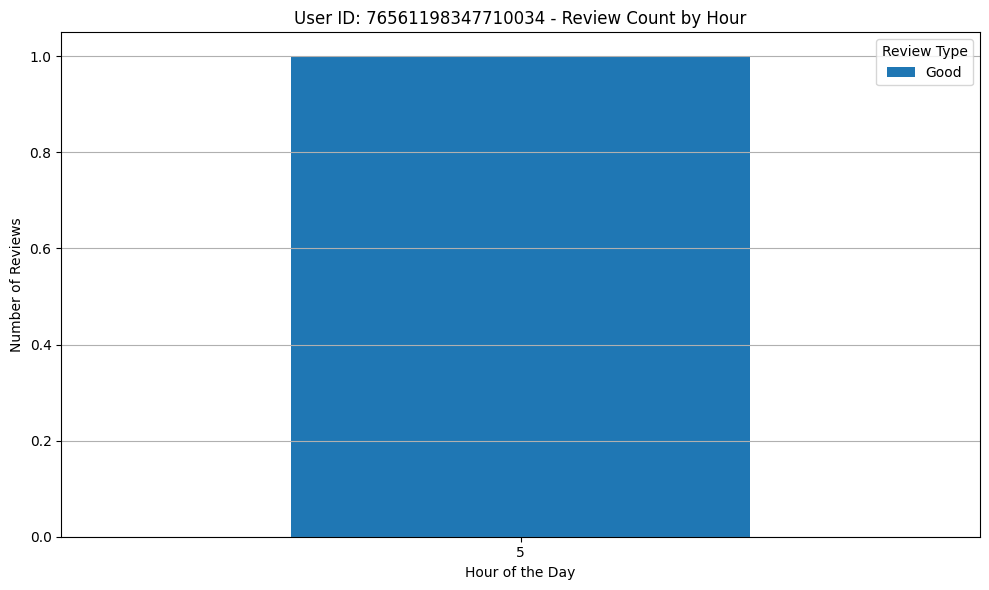

User ID: 76561198347710034 - Review Summary:
         weighted_vote_score review_type  hour
4606795             0.991802        Good     5




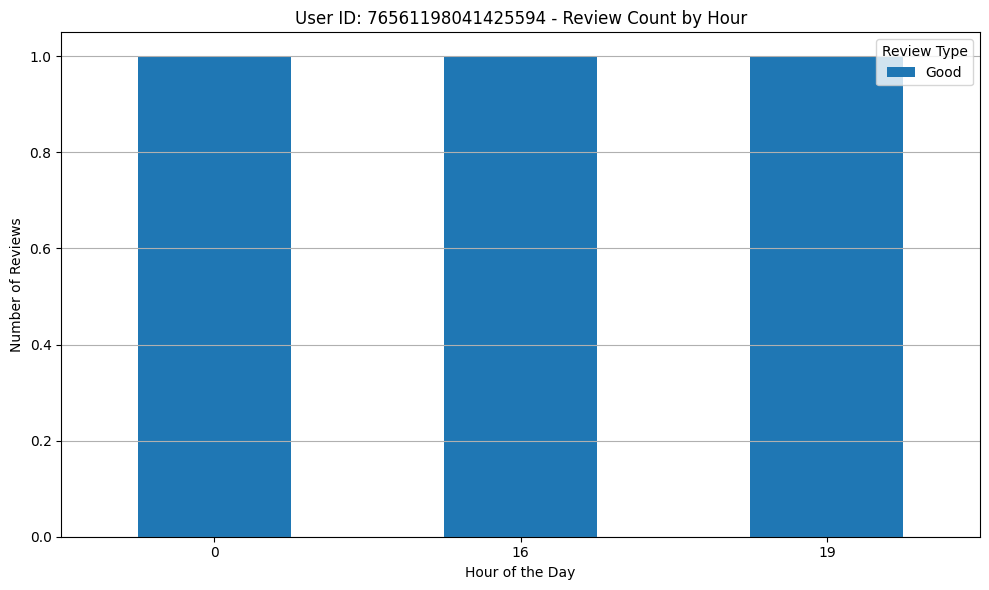

User ID: 76561198041425594 - Review Summary:
         weighted_vote_score review_type  hour
2676485             0.678717        Good    19
3402922             0.517930        Good    16
3728109             0.962367        Good     0




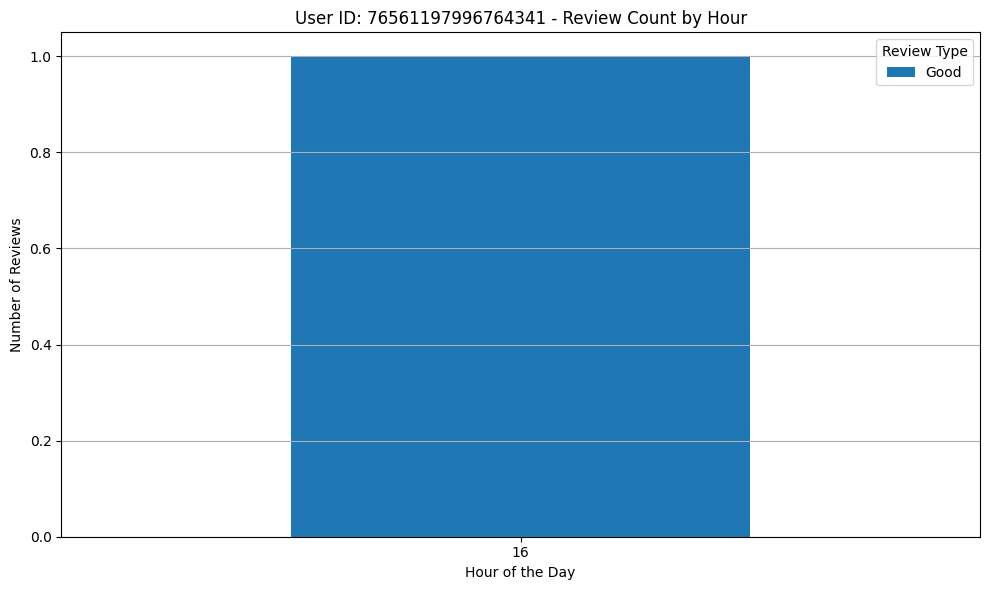

User ID: 76561197996764341 - Review Summary:
         weighted_vote_score review_type  hour
1532180             0.887856        Good    16




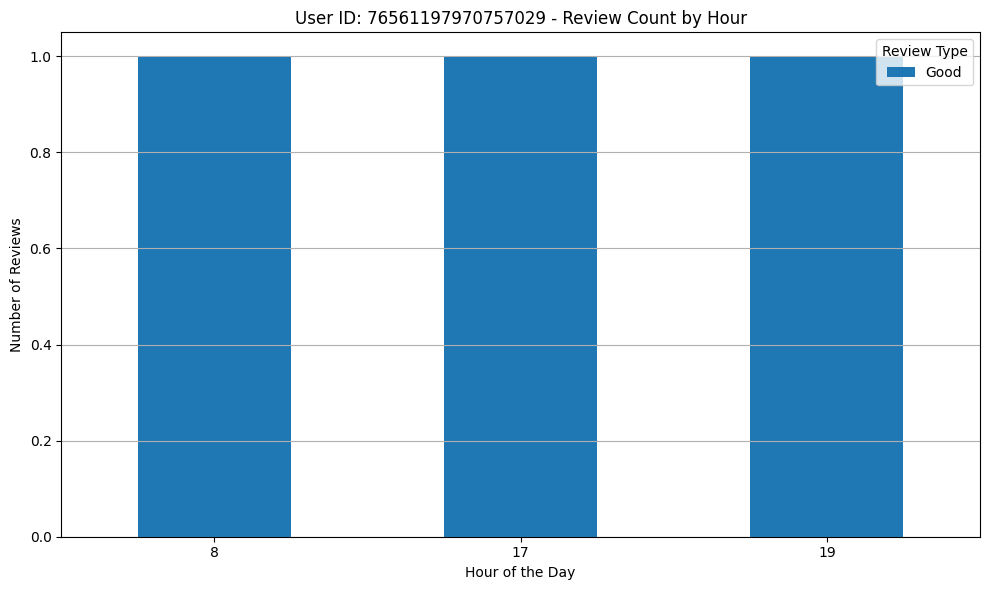

User ID: 76561197970757029 - Review Summary:
         weighted_vote_score review_type  hour
3009933             0.899909        Good    17
4463106             0.790615        Good     8
4821807             0.523810        Good    19




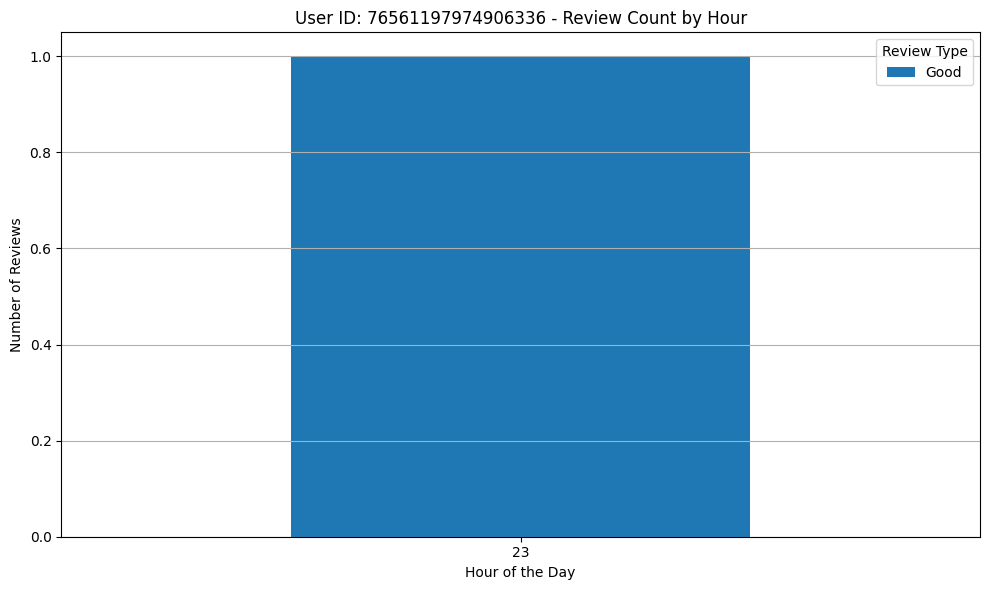

User ID: 76561197974906336 - Review Summary:
         weighted_vote_score review_type  hour
2238830             0.931551        Good    23




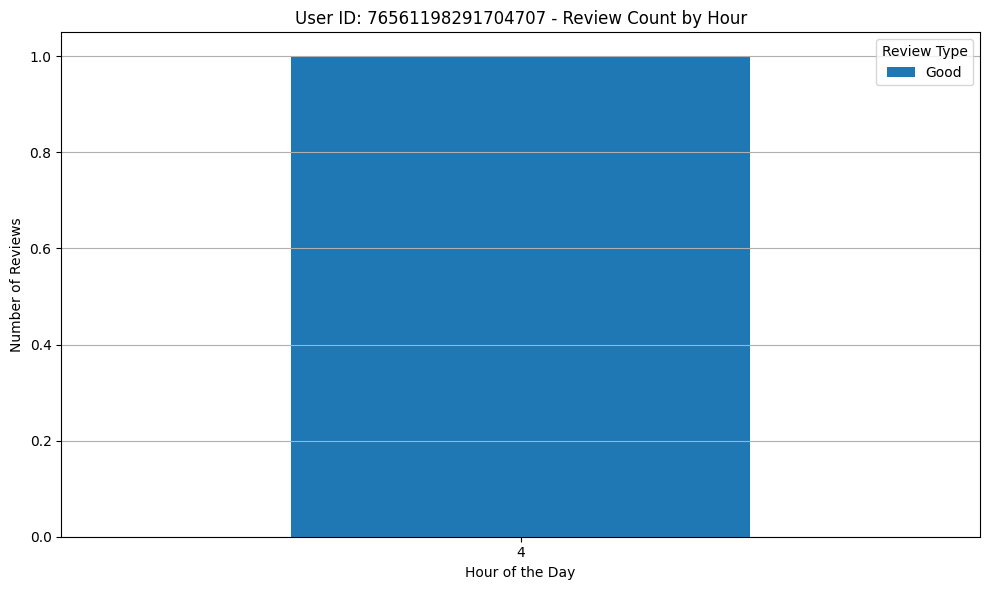

User ID: 76561198291704707 - Review Summary:
         weighted_vote_score review_type  hour
3104946              0.90771        Good     4




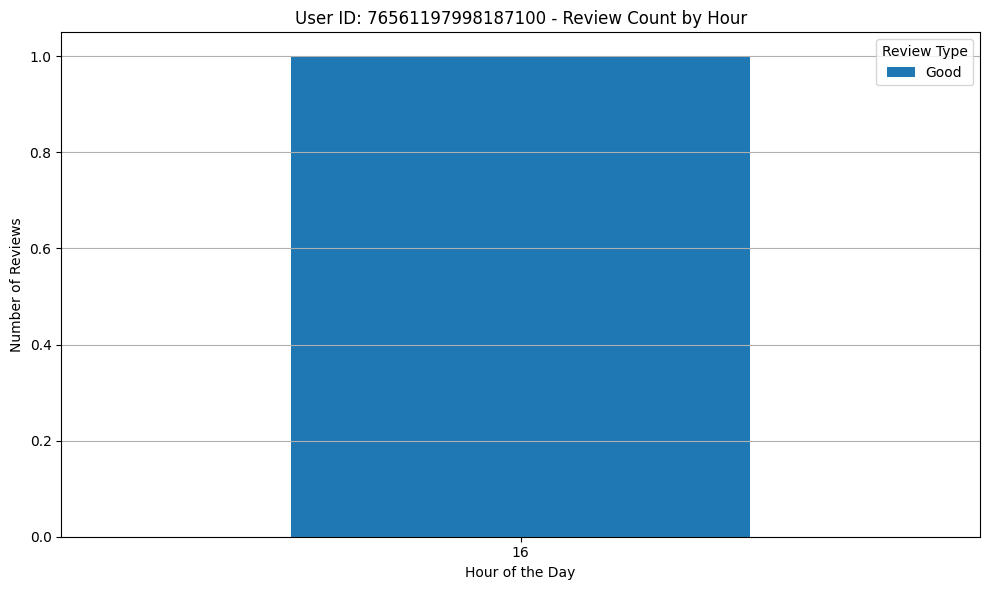

User ID: 76561197998187100 - Review Summary:
         weighted_vote_score review_type  hour
5447247             0.947975        Good    16




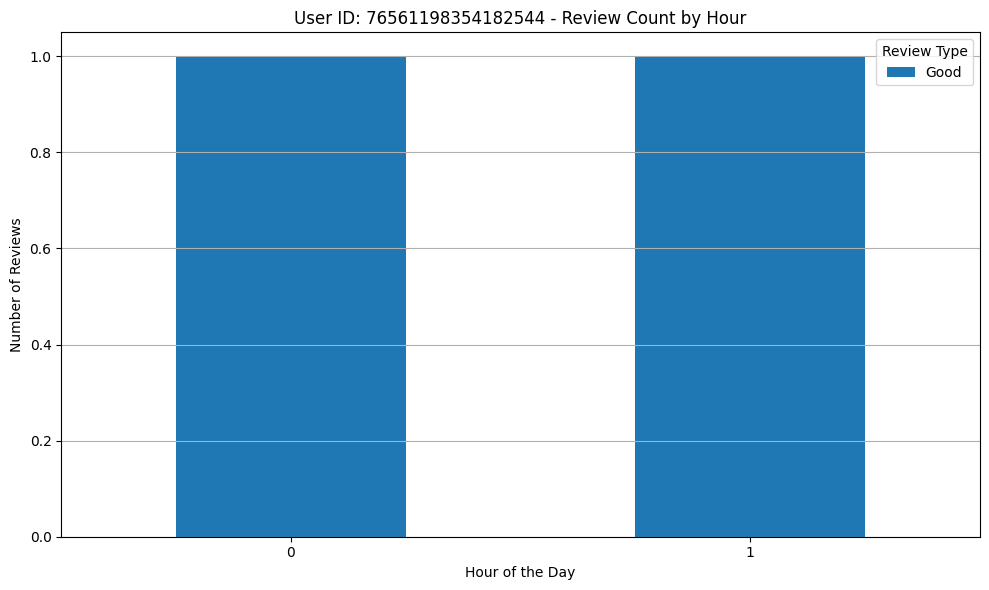

User ID: 76561198354182544 - Review Summary:
         weighted_vote_score review_type  hour
4574074             0.957065        Good     1
5144471             0.989233        Good     0




In [ ]:
from collections import Counter

# Selecting the top 10 users with the most likes
top_10_users = data.nlargest(10, 'votes_helpful')['author.steamid']

# Font settings
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica']  # Specify the fonts you want to use

# Analyzing user reviews
for user_id in top_10_users:
    user_reviews = data[data['author.steamid'] == user_id].copy()  # Copy to avoid SettingWithCopyWarning
    user_reviews['review_type'] = user_reviews['weighted_vote_score'].apply(lambda x: 'Good' if x >= 0.5 else 'Bad')

    # Extracting the hour of the review
    user_reviews['hour'] = pd.to_datetime(user_reviews['timestamp_created'], unit='s').dt.hour

    # Counting the review counts by hour and type
    review_counts = user_reviews.groupby(['hour', 'review_type']).size().unstack(fill_value=0)

    # Creating the plot
    review_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'User ID: {user_id} - Review Count by Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Reviews')
    plt.legend(title='Review Type')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Printing the user's review summary
    print(f"User ID: {user_id} - Review Summary:")
    print(user_reviews[['weighted_v


<Figure size 800x600 with 0 Axes>

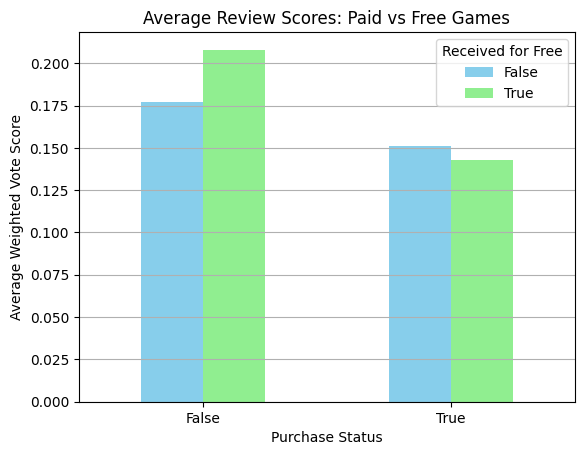

In [ ]:
# Calculating the average scores for paid and free games
average_scores = data.groupby(['steam_purchase', 'received_for_free'])['weighted_vote_score'].mean().unstack()

# Visualizing with a bar plot
plt.figure(figsize=(8, 6))
average_scores.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average Review Scores: Paid vs Free Games')
plt.xlabel('Purchase Status')
plt.ylabel('Average Weighted Vote Score')
plt.xticks(rotation=0)
plt.legend(title='Received for Free')
plt.grid(axis='y')
plt.show()


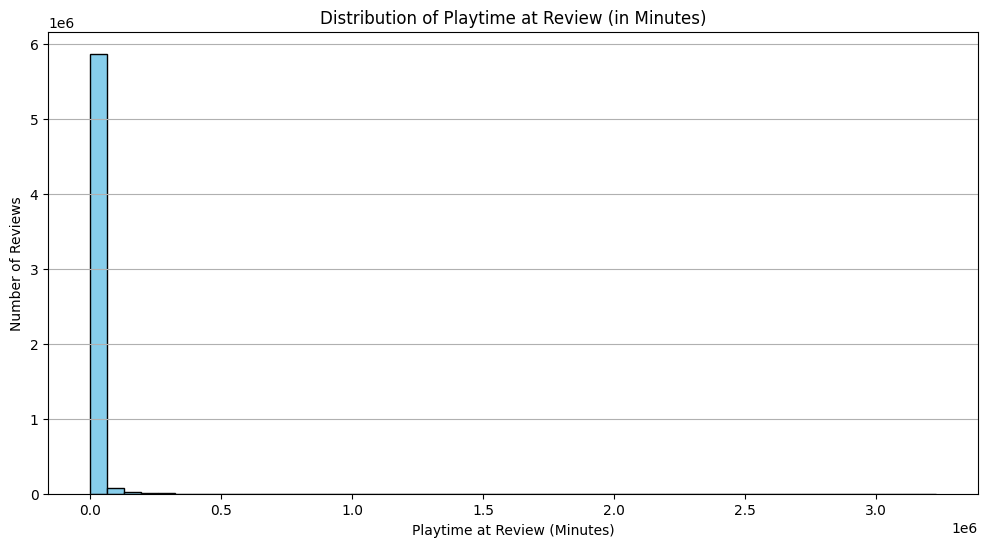

In [ ]:
# Below is an example code that can be used to create a histogram showing users' playtime.

# Checking playtime at review (in minutes)
playtime_at_review = data['author.playtime_at_review'].dropna()  # Dropping NaN values

# Creating a histogram
plt.figure(figsize=(12, 6))
plt.hist(playtime_at_review, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Playtime at Review (in Minutes)')
plt.xlabel('Playtime at Review (Minutes)')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()


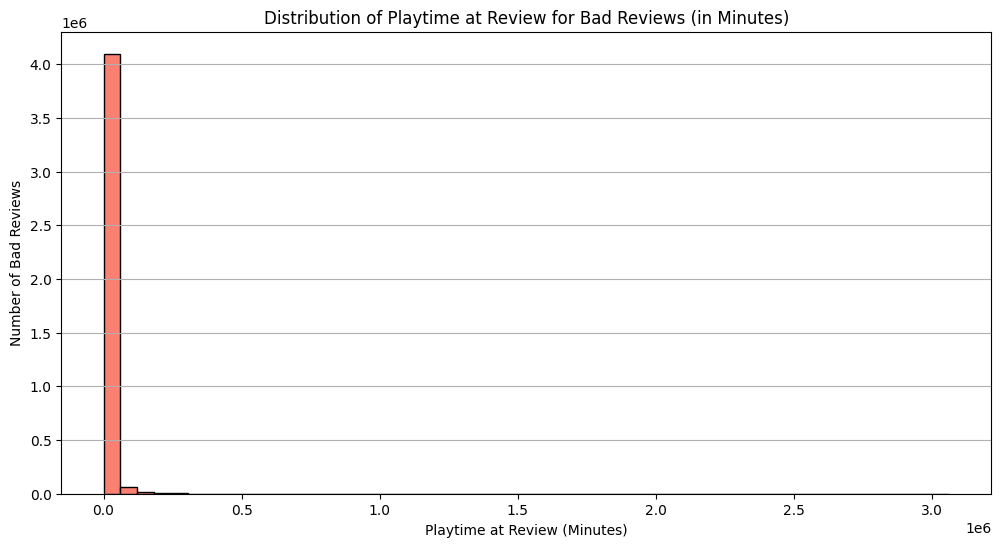

In [ ]:
# Identifying bad reviews (e.g., weighted_vote_score < 0.2)
bad_reviews = data[data['weighted_vote_score'] < 0.2]

# Checking playtime at bad reviews (in minutes)
playtime_at_bad_reviews = bad_reviews['author.playtime_at_review'].dropna()  # Dropping NaN values

# Creating a histogram
plt.figure(figsize=(12, 6))
plt.hist(playtime_at_bad_reviews, bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Playtime at Review for Bad Reviews (in Minutes)')
plt.xlabel('Playtime at Review (Minutes)')
plt.ylabel('Number of Bad Reviews')
plt.grid(axis='y')
plt.show()


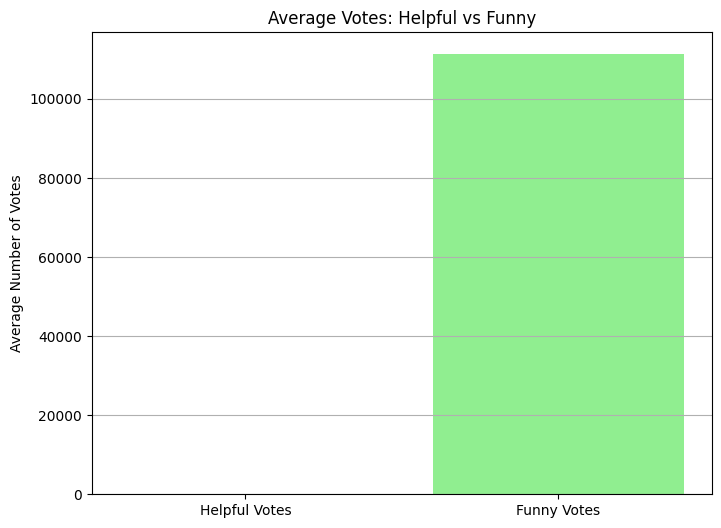

In [ ]:
# This analysis uses the votes_helpful and votes_funny values to examine which reviews users find more helpful or funny.

# Calculating the average helpful votes and funny votes
helpful_mean = data['votes_helpful'].mean()
funny_mean = data['votes_funny'].mean()

# Visualizing with a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Helpful Votes', 'Funny Votes'], [helpful_mean, funny_mean], color=['skyblue', 'lightgreen'])
plt.title('Average Votes: Helpful vs Funny')
plt.ylabel('Average Number of Votes')
plt.grid(axis='y')
plt.show()


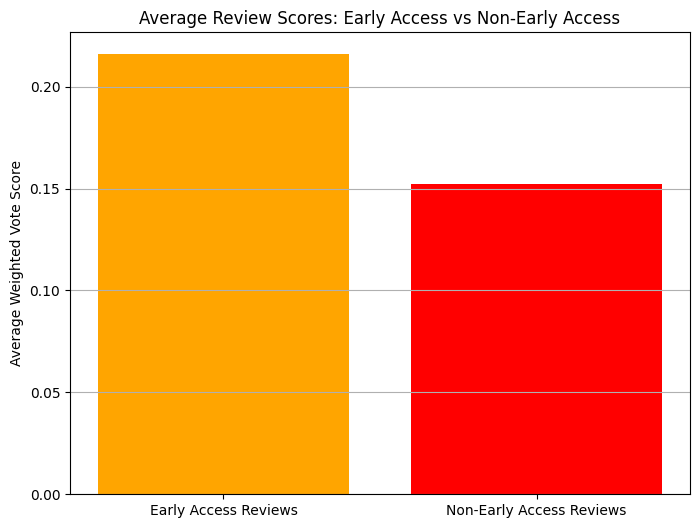

In [ ]:

# Calculating the average scores of reviews written during the early access period

early_access_reviews = data[data['written_during_early_access']]
non_early_access_reviews = data[~data['written_during_early_access']]

early_access_mean = early_access_reviews['weighted_vote_score'].mean()
non_early_access_mean = non_early_access_reviews['weighted_vote_score'].mean()


# Visualizing with a bar plot

plt.figure(figsize=(8, 6))
plt.bar(['Early Access Reviews', 'Non-Early Access Reviews'], [early_access_mean, non_early_access_mean], color=['orange', 'red'])
plt.title('Average Review Scores: Early Access vs Non-Early Access')
# Ortalama İnceleme Puanları: Erken Erişim vs Erken Erişim Dışı
# Punteggi medi delle recensioni: Accesso anticipato vs Non accesso anticipato
plt.ylabel('Average Weighted Vote Score')
# Ortalama Ağırlıklı Oy Puanı
# Punteggio medio ponderato
plt.grid(axis='y')
plt.show()

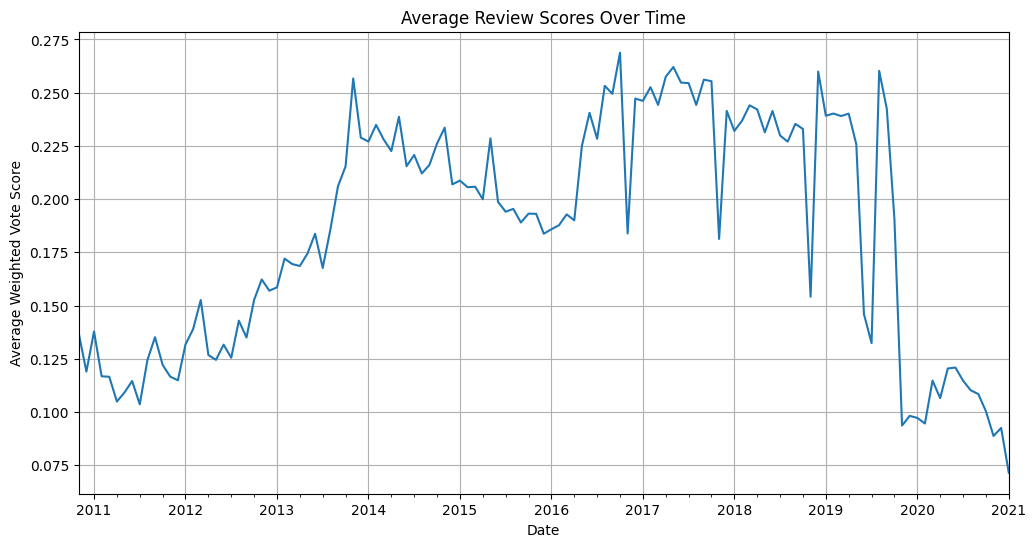

In [ ]:

# Trends Over Time

# Converting the timestamp to datetime format
data['timestamp_created'] = pd.to_datetime(data['timestamp_created'], unit='s')

# Calculating the average scores by month
monthly_avg = data.resample('ME', on='timestamp_created')['weighted_vote_score'].mean()


# Time series graph
plt.figure(figsize=(12, 6))
monthly_avg.plot()
plt.title('Average Review Scores Over Time')
# Zaman İçinde Ortalama İnceleme Puanları
# Punteggi medi delle recensioni nel tempo
plt.xlabel('Date')
# Tarih
# Data
plt.ylabel('Average Weighted Vote Score')
# Ortalama Ağırlıklı Oy Puanı
# Punteggio medio ponderato
plt.grid()
plt.show()

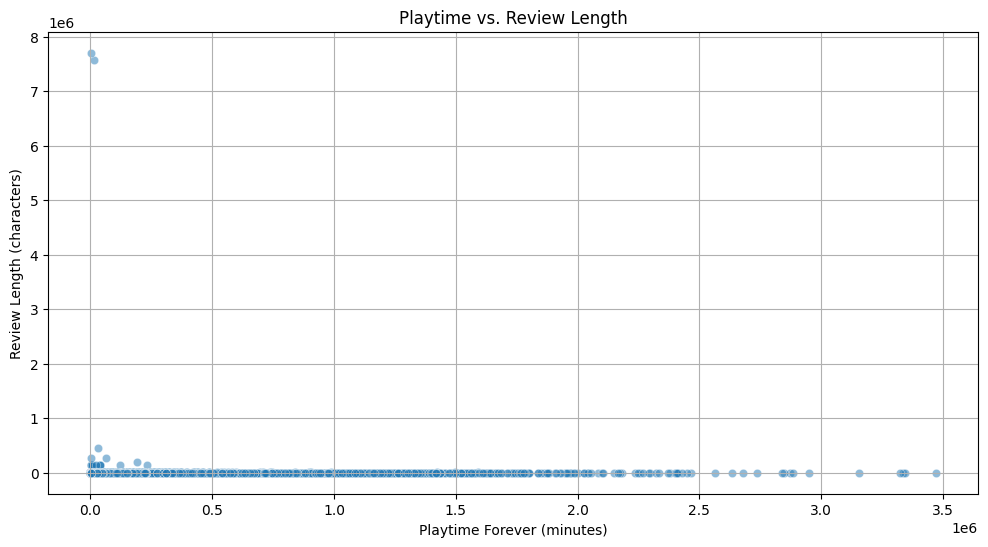

In [ ]:

# User Behavior Patterns


# Calculating the review length
data['review_length'] = data['review'].apply(len)

# Visualizing with a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='author.playtime_forever', y='review_length', alpha=0.5)
plt.title('Playtime vs. Review Length')
# Oynama Süresi vs. İnceleme Uzunluğu
# Tempo di gioco vs. Lunghezza della recensione
plt.xlabel('Playtime Forever (minutes)')
# Sonsuza Dek Oynama Süresi (dakika)
# Tempo di gioco per sempre (minuti)
plt.ylabel('Review Length (characters)')
# İnceleme Uzunluğu (karakter)
# Lunghezza della recensione (caratteri)
plt.grid()
plt.show()

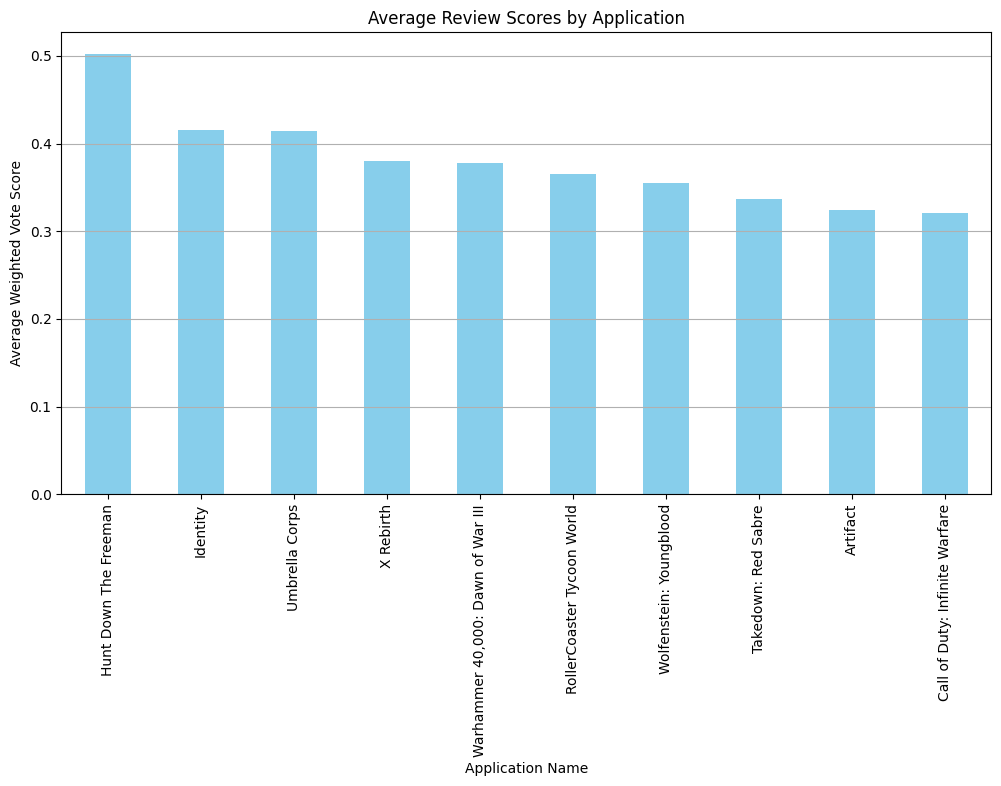

In [ ]:
# Calculating average scores by game names
app_review_counts = data.groupby('app_name')['weighted_vote_score'].mean().sort_values(ascending=False)

# Visualizing with a bar plot
plt.figure(figsize=(12, 6))
app_review_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Average Review Scores by Application')
# Ortalama İnceleme Puanları Uygulamaya Göre
# Punteggi medi delle recensioni per applicazione
plt.xlabel('Application Name')
# Uygulama Adı
# Nome dell'applicazione
plt.ylabel('Average Weighted Vote Score')
# Ortalama Ağırlıklı Oy Puanı
# Punteggio medio ponderato
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

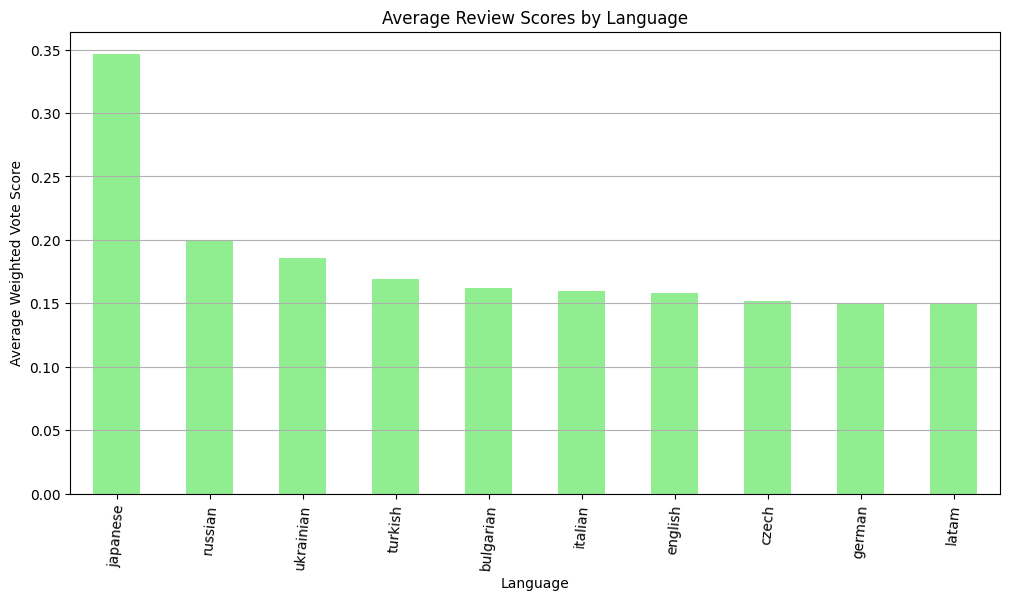

In [ ]:

# Calculating average scores by language
language_review_counts = data.groupby('language')['weighted_vote_score'].mean().sort_values(ascending=False)


# Visualizing with a bar plot
plt.figure(figsize=(12, 6))
language_review_counts.head(10).plot(kind='bar', color='lightgreen')
plt.title('Average Review Scores by Language')
# Ortalama İnceleme Puanları Dile Göre
# Punteggi medi delle recensioni per lingua
plt.xlabel('Language')
# Dil
# Lingua
plt.ylabel('Average Weighted Vote Score')
# Ortalama Ağırlıklı Oy Puanı
# Punteggio medio ponderato
plt.xticks(rotation=85)
plt.grid(axis='y')
plt.show()

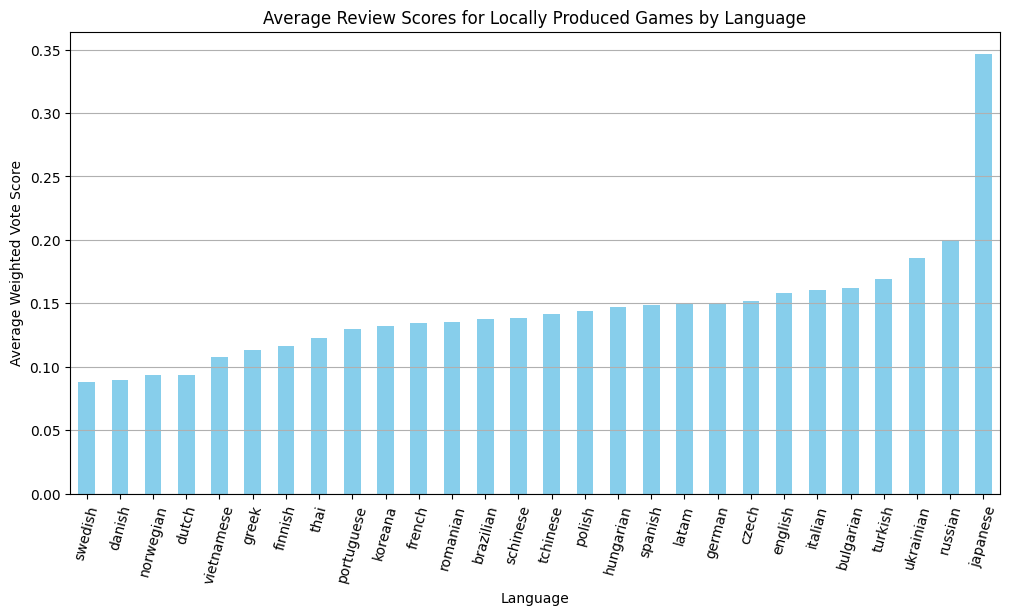

In [ ]:
# Defining the relationship between language and country

language_to_country = {
    'schinese': 'China',        # Simplified Chinese
    'english': 'USA',           # English (commonly attributed to the USA)
    'turkish': 'Turkey',        # Turkish
    'spanish': 'Spain',         # Spanish (Spain)
    'russian': 'Russia',        # Russian
    'koreana': 'South Korea',   # Korean
    'latam': 'Latin America',   # Latin America (Spanish)
    'brazilian': 'Brazil',      # Brazilian Portuguese
    'portuguese': 'Portugal',   # Portuguese
    'vietnamese': 'Vietnam',    # Vietnamese
    'polish': 'Poland',         # Polish
    'french': 'France',         # French
    'german': 'Germany',        # German
    'hungarian': 'Hungary',     # Hungarian
    'ukrainian': 'Ukraine',     # Ukrainian
    'tchinese': 'Taiwan',       # Traditional Chinese
    'bulgarian': 'Bulgaria',    # Bulgarian
    'czech': 'Czech Republic',   # Czech
    'italian': 'Italy',         # Italian
    'thai': 'Thailand',         # Thai
    'greek': 'Greece',          # Greek
    'dutch': 'Netherlands',     # Dutch
    'finnish': 'Finland',       # Finnish
    'romanian': 'Romania',      # Romanian
    'japanese': 'Japan',        # Japanese
    'swedish': 'Sweden',        # Swedish
    'danish': 'Denmark',        # Danish
    'norwegian': 'Norway'       # Norwegian
}


# Adding the 'is_local' column
data['is_local'] = data['language'].map(lambda x: language_to_country.get(x) == 'Turkey')  # Specify your country here

# Calculating average scores for each language
average_scores = data.groupby('language')['weighted_vote_score'].mean()

# Visualizing with a bar plot
plt.figure(figsize=(12, 6))
average_scores.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Review Scores for Locally Produced Games by Language')
# Yerel Üretim Oyunları için Ortalama İnceleme Puanları Dile Göre
# Punteggi medi delle recensioni per giochi prodotti localmente in base alla lingua
plt.xlabel('Language')
# Dil
# Lingua
plt.ylabel('Average Weighted Vote Score')
# Ortalama Ağırlıklı Oy Puanı
# Punteggio medio ponderato
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.show()

Average Helpful Votes for Good Reviews: 7.62
Average Helpful Votes for Bad Reviews: 0.17


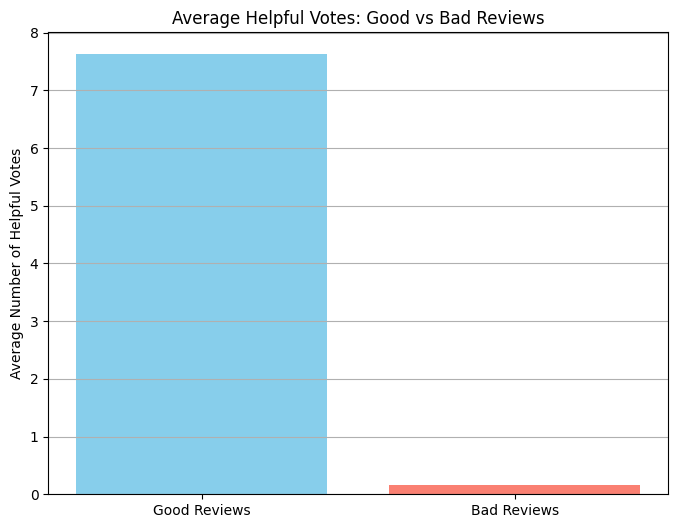

In [ ]:
# Identifying good and bad reviews
good_reviews = data[data['weighted_vote_score'] >= 0.5]
bad_reviews = data[data['weighted_vote_score'] < 0.5]

# Calculating the total number of helpful votes
good_votes = good_reviews['votes_helpful'].sum()
bad_votes = bad_reviews['votes_helpful'].sum()

# Calculating and printing the average helpful votes
average_good_votes = good_votes / len(good_reviews) if len(good_reviews) > 0 else 0
average_bad_votes = bad_votes / len(bad_reviews) if len(bad_reviews) > 0 else 0

print(f'Average Helpful Votes for Good Reviews: {average_good_votes:.2f}')
# İyi Yorumlar için Ortalama Yardımcı Oy Sayısı
# Numero medio di voti utili per recensioni buone
print(f'Average Helpful Votes for Bad Reviews: {average_bad_votes:.2f}')
# Kötü Yorumlar için Ortalama Yardımcı Oy Sayısı

# Visualizing with a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Good Reviews', 'Bad Reviews'], [average_good_votes, average_bad_votes], color=['skyblue', 'salmon'])
plt.title('Average Helpful Votes: Good vs Bad Reviews')
# Ortalama Yardımcı Oylar: İyi vs Kötü Yorumlar
# Voti utili medi: Recensioni buone vs cattive
plt.ylabel('Average Number of Helpful Votes')
# Ortalama Yardımcı Oy Sayısı
# Numero medio di voti utili
plt.grid(axis='y')
plt.show()

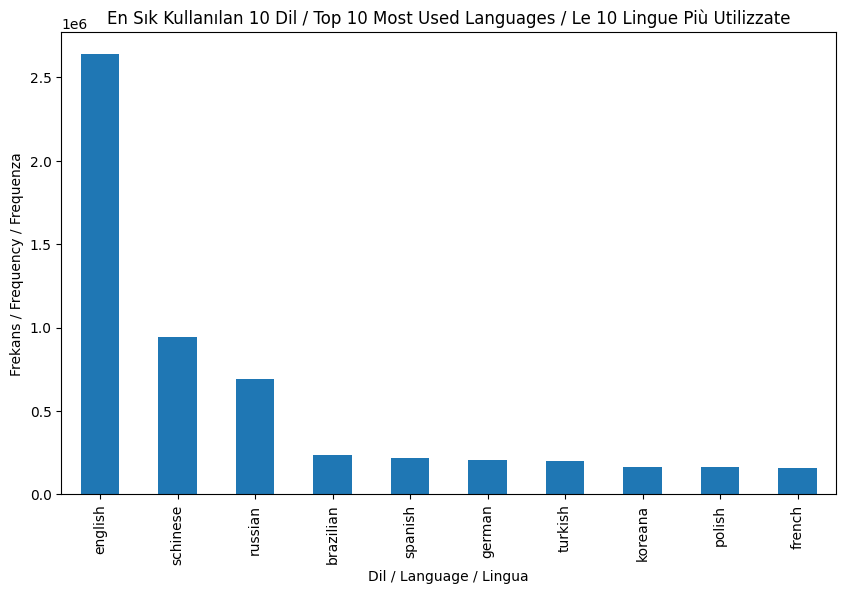

In [ ]:
# Frequency distributions of categorical variables (e.g., 'language' column)
plt.figure(figsize=(10, 6))
data['language'].value_counts().head(10).plot(kind='bar')
plt.title('En Sık Kullanılan 10 Dil / Top 10 Most Used Languages / Le 10 Lingue Più Utilizzate')
plt.xlabel('Dil / Language / Lingua')
plt.ylabel('Frekans / Frequency / Frequenza')
plt.show()

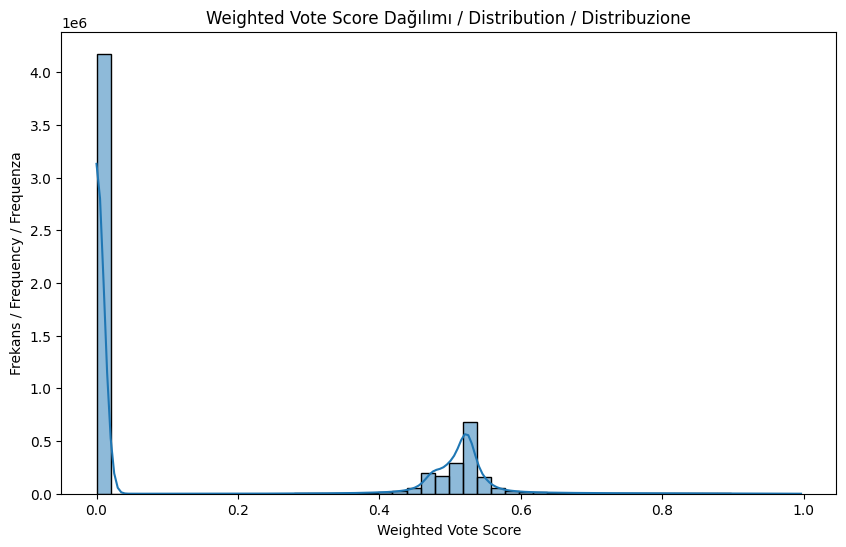

In [ ]:
# Distribution of 'weighted_vote_score'
plt.figure(figsize=(10, 6))
sns.histplot(data['weighted_vote_score'], bins=50, kde=True)
plt.title('Weighted Vote Score Dağılımı / Distribution / Distribuzione')
plt.xlabel('Weighted Vote Score')
plt.ylabel('Frekans / Frequency / Frequenza')
plt.show()

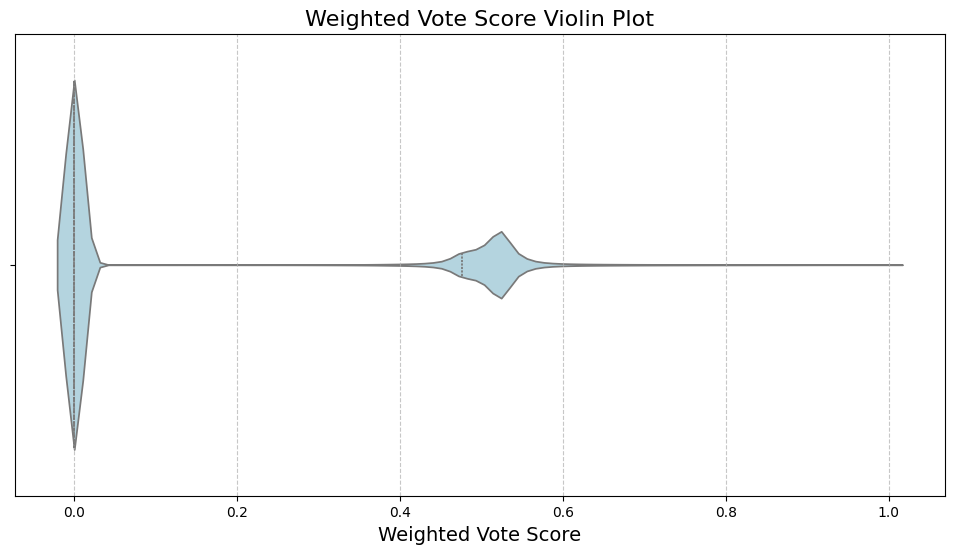

In [ ]:
 # Boxplot for outlier detection
plt.figure(figsize=(12, 6))
sns.violinplot(x=data['weighted_vote_score'], color='lightblue', inner='quartile')
plt.title('Weighted Vote Score Violin Plot', fontsize=16)
plt.xlabel('Weighted Vote Score', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# TCounting recommended and not recommended reviews
recommendation_counts = data['recommended'].value_counts()
print("\nTavsiye Oranları / Recommendation Rates / Tassi di Raccomandazione:")
print(recommendation_counts)


Tavsiye Oranları / Recommendation Rates / Tassi di Raccomandazione:
recommended
True     5498868
False     482596
Name: count, dtype: int64


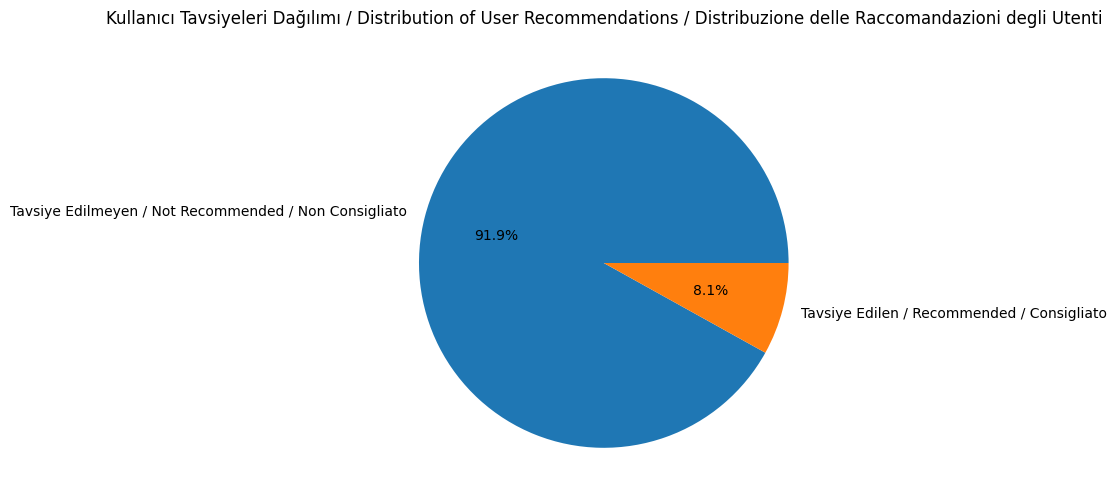

In [ ]:
# Visualizing recommendation rates
plt.figure(figsize=(6, 6))
recommendation_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Tavsiye Edilmeyen / Not Recommended / Non Consigliato', 'Tavsiye Edilen / Recommended / Consigliato'])
plt.title('Kullanıcı Tavsiyeleri Dağılımı / Distribution of User Recommendations / Distribuzione delle Raccomandazioni degli Utenti')
plt.ylabel('')
plt.show()

In [ ]:
# Number of reviews per application
app_reviews = data['app_id'].value_counts()
# Top 10 applications with the most reviews
top_apps = app_reviews.head(10)
print("\nEn Çok Yorum Alan Uygulamalar / Most Reviewed Applications / Applicazioni con Più Recensioni:")
print(top_apps)


En Çok Yorum Alan Uygulamalar / Most Reviewed Applications / Applicazioni con Più Recensioni:
app_id
4000      653815
292030    468330
381210    417994
227300    386277
413150    314959
431960    291036
242760    238887
620       230871
8930      170867
264710    151815
Name: count, dtype: int64


app_id
4000      653815
292030    468330
381210    417994
227300    386277
413150    314959
431960    291036
242760    238887
620       230871
8930      170867
264710    151815
Name: count, dtype: int64


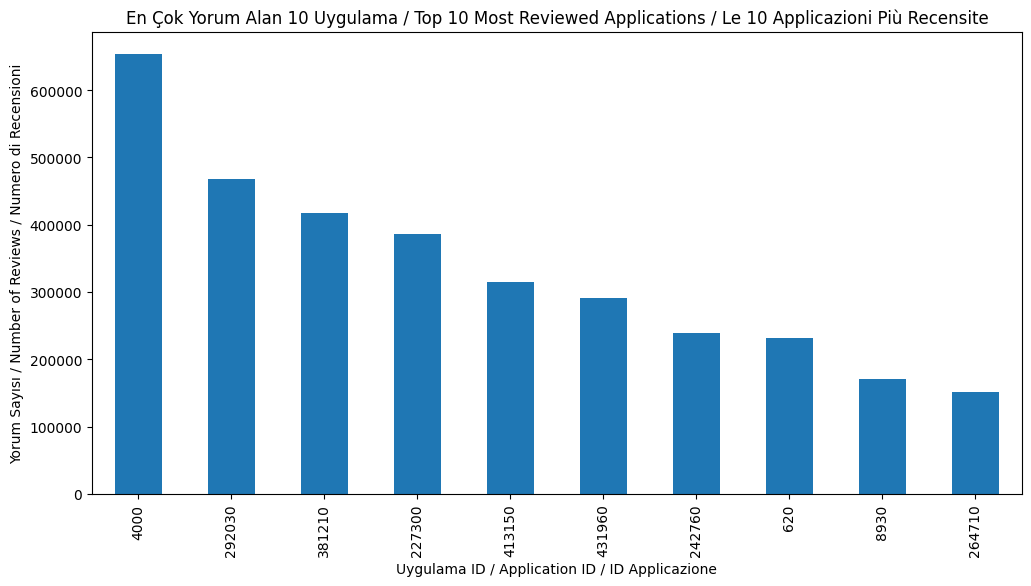

In [ ]:
print(top_apps)

# Visualization
plt.figure(figsize=(12, 6))
top_apps.plot(kind='bar')
plt.title('En Çok Yorum Alan 10 Uygulama / Top 10 Most Reviewed Applications / Le 10 Applicazioni Più Recensite')
plt.xlabel('Uygulama ID / Application ID / ID Applicazione')
plt.ylabel('Yorum Sayısı / Number of Reviews / Numero di Recensioni')
plt.show()

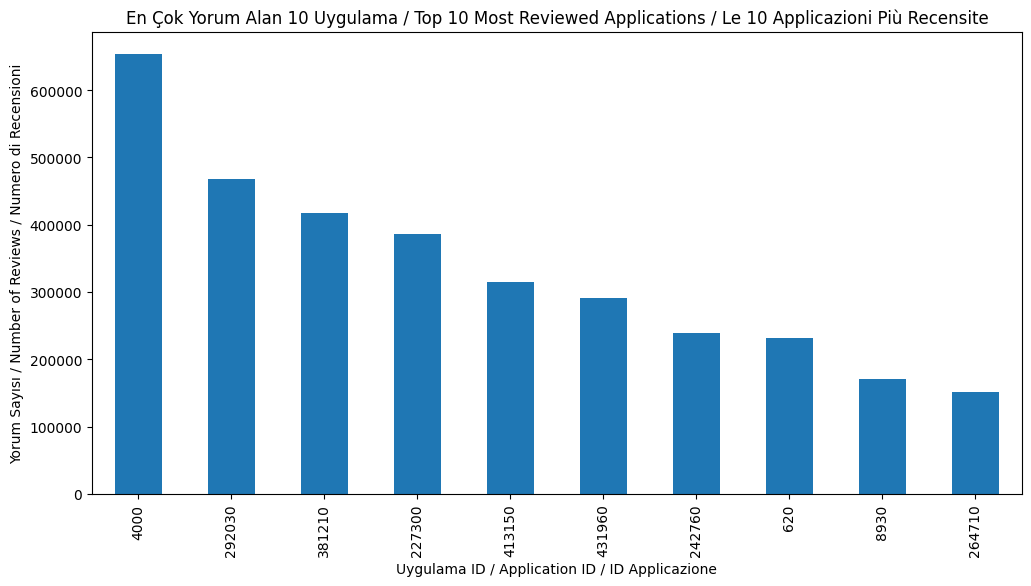

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))
top_apps.plot(kind='bar')
plt.title('En Çok Yorum Alan 10 Uygulama / Top 10 Most Reviewed Applications / Le 10 Applicazioni Più Recensite')
plt.xlabel('Uygulama ID / Application ID / ID Applicazione')
plt.ylabel('Yorum Sayısı / Number of Reviews / Numero di Recensioni')
plt.show()

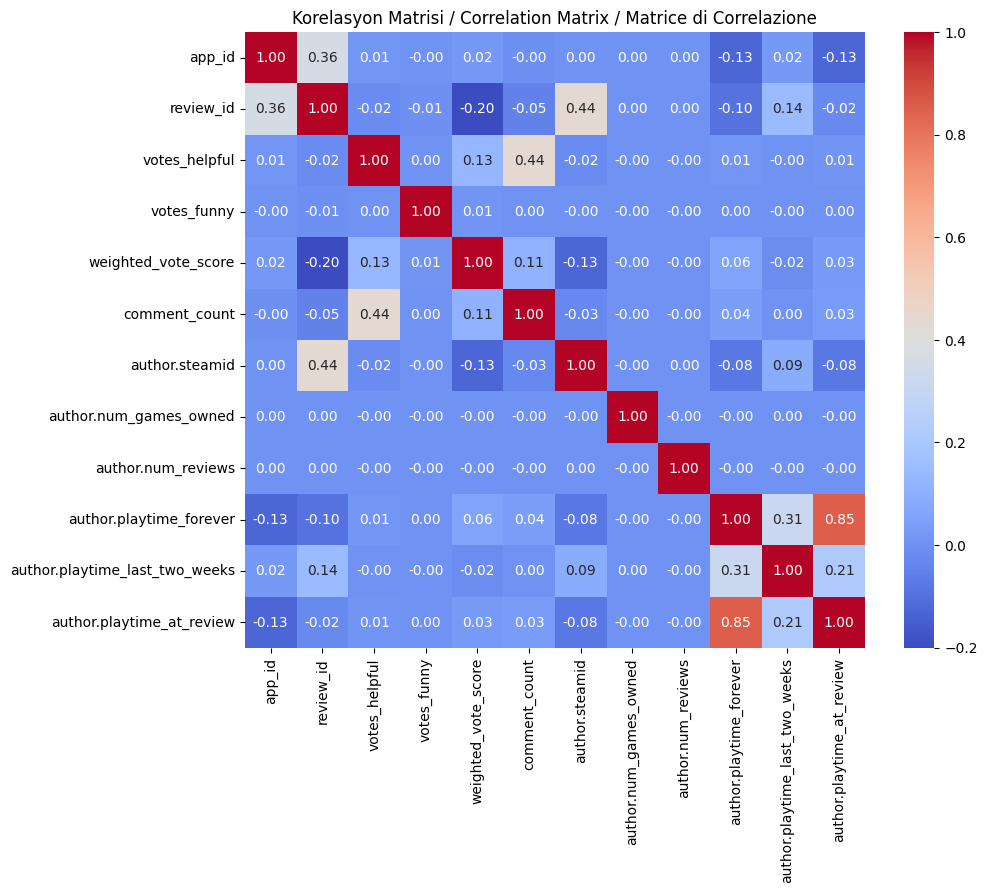

In [ ]:
#Correlation matrix of numerical variables
#Resetting index because our index is 'timestamp_created'
data.reset_index(inplace=True)
corr_matrix = data[numerical_cols].corr()
#%%
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi / Correlation Matrix / Matrice di Correlazione')
plt.show()

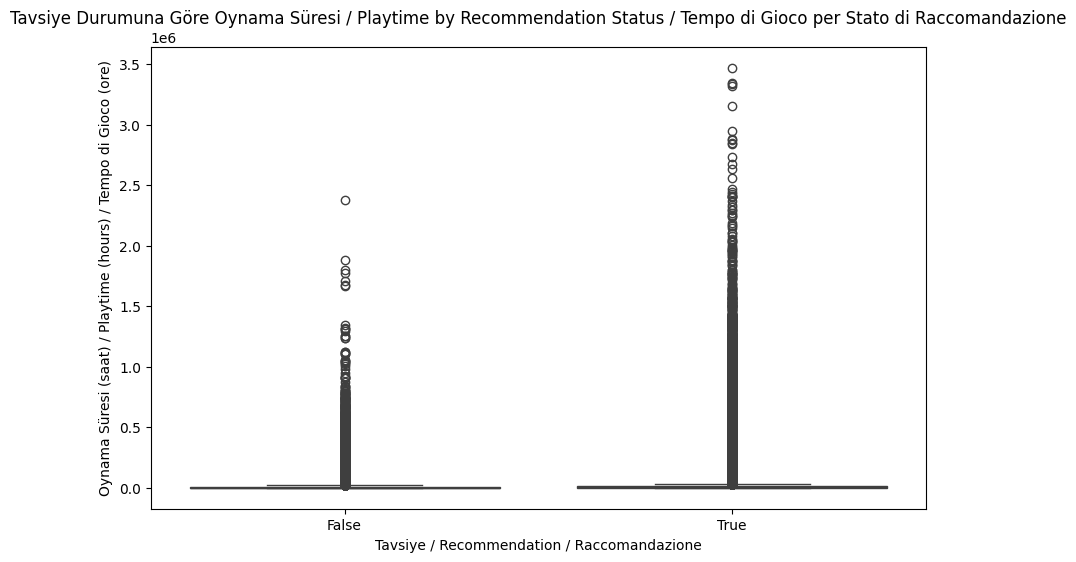

In [ ]:
# Converting 'author.playtime_forever' to numeric type (if not already)
data['author.playtime_forever'] = pd.to_numeric(data['author.playtime_forever'], errors='coerce')
# Relationship between playtime and recommendation
plt.figure(figsize=(10, 6))
sns.boxplot(x='recommended', y='author.playtime_forever', data=data)
plt.title('Tavsiye Durumuna Göre Oynama Süresi / Playtime by Recommendation Status / Tempo di Gioco per Stato di Raccomandazione')
plt.xlabel('Tavsiye / Recommendation / Raccomandazione')
plt.ylabel('Oynama Süresi (saat) / Playtime (hours) / Tempo di Gioco (ore)')
plt.show()

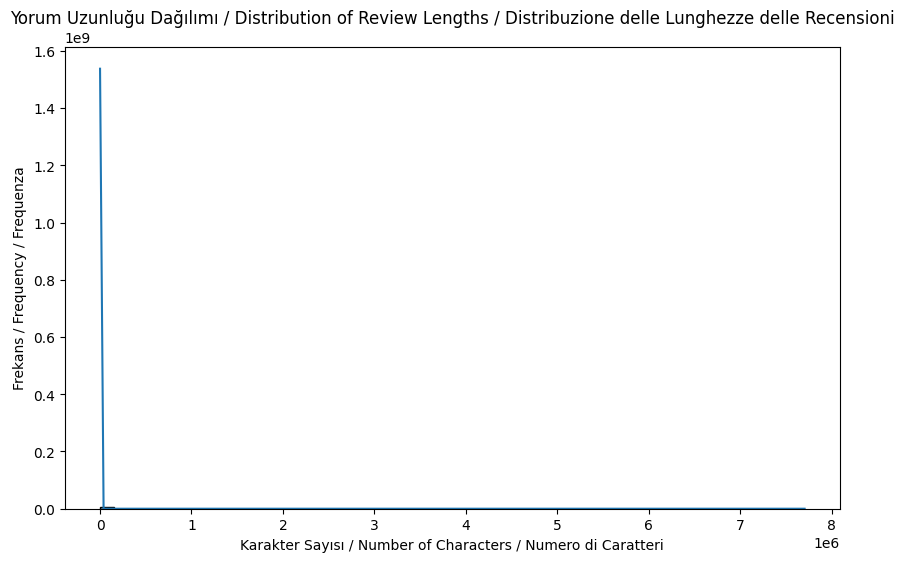

In [ ]:
# Calculating review length
data['review_length'] = data['review'].apply(len)
# Distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], bins=50, kde=True)
plt.title('Yorum Uzunluğu Dağılımı / Distribution of Review Lengths / Distribuzione delle Lunghezze delle Recensioni')
plt.xlabel('Karakter Sayısı / Number of Characters / Numero di Caratteri')
plt.ylabel('Frekans / Frequency / Frequenza')
plt.show()

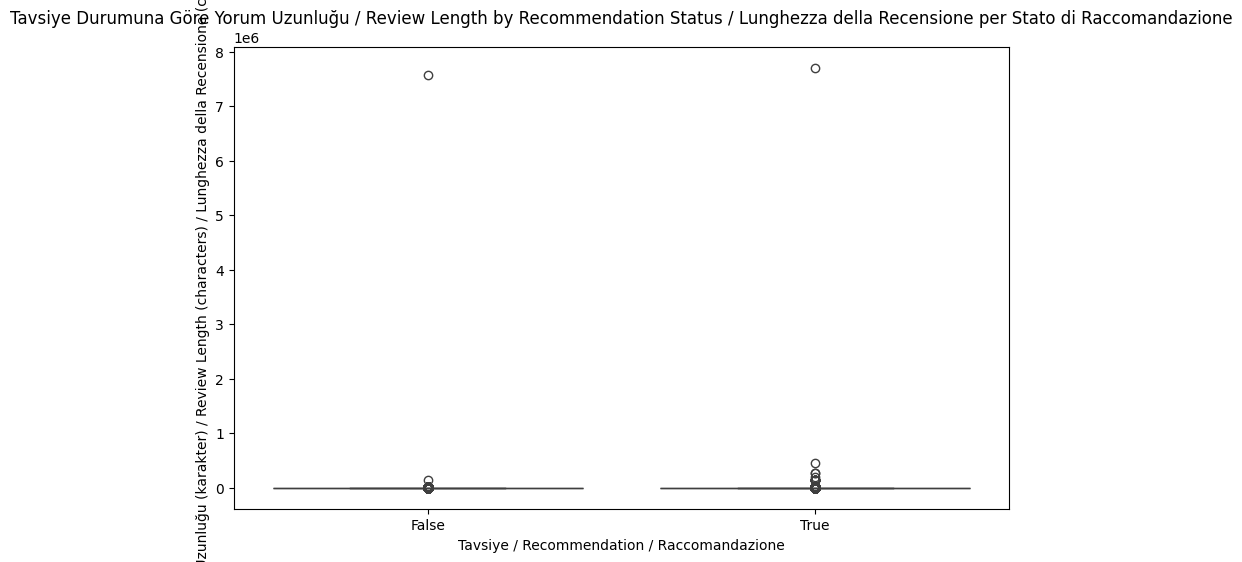

In [ ]:
# Relationship between review length and recommendation
plt.figure(figsize=(10, 6))
sns.boxplot(x='recommended', y='review_length', data=data)
plt.title('Tavsiye Durumuna Göre Yorum Uzunluğu / Review Length by Recommendation Status / Lunghezza della Recensione per Stato di Raccomandazione')
plt.xlabel('Tavsiye / Recommendation / Raccomandazione')
plt.ylabel('Yorum Uzunluğu (karakter) / Review Length (characters) / Lunghezza della Recensione (caratteri)')
plt.show()

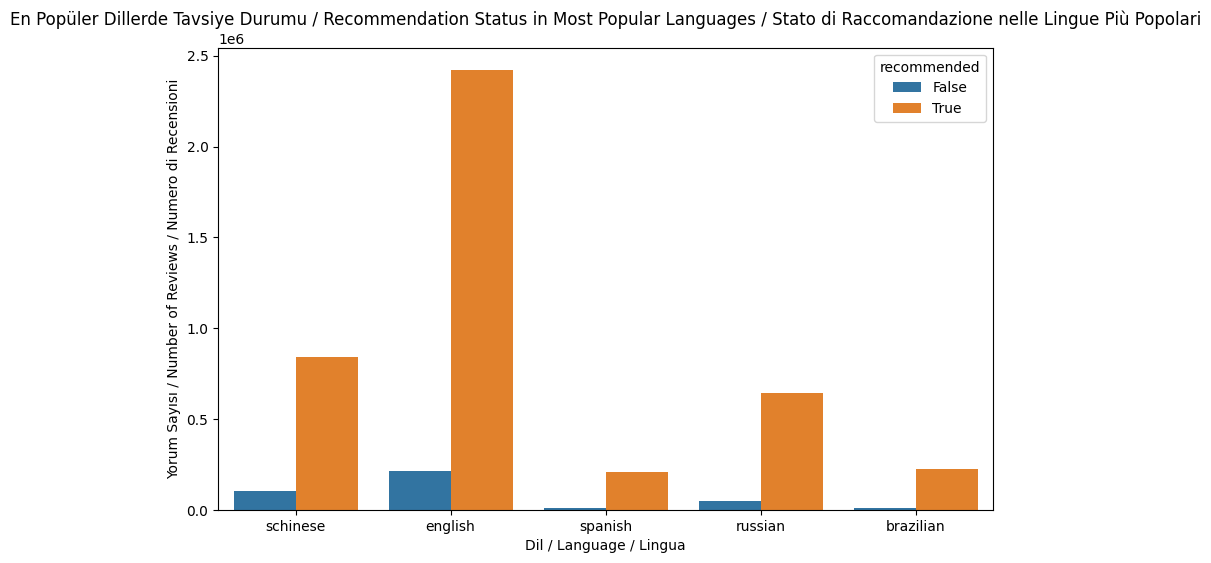

In [ ]:
# Most used languages and recommendation rates
top_languages = data['language'].value_counts().head(5).index
language_recommendation = data[data['language'].isin(top_languages)]
#%%
plt.figure(figsize=(10, 6))
sns.countplot(x='language', hue='recommended', data=language_recommendation)
plt.title('En Popüler Dillerde Tavsiye Durumu / Recommendation Status in Most Popular Languages / Stato di Raccomandazione nelle Lingue Più Popolari')
plt.xlabel('Dil / Language / Lingua')
plt.ylabel('Yorum Sayısı / Number of Reviews / Numero di Recensioni')
plt.show()

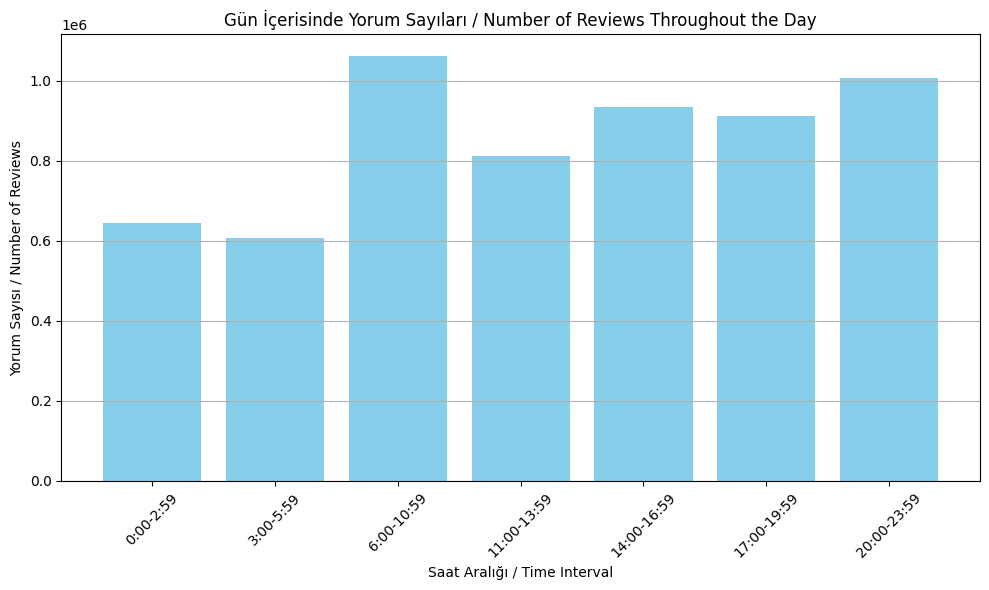

In [ ]:
# Converting the timestamp to datetime format
data['timestamp_created'] = pd.to_datetime(data['timestamp_created'], unit='s')

# Extracting the hour information
data['hour'] = data['timestamp_created'].dt.hour

# Calculating the number of reviews by different time intervals
time_intervals = [(0, 2), (3, 5), (6, 10), (11, 13), (14, 16), (17, 19), (20, 23)]
review_counts = []
for interval in time_intervals:
    start, end = interval
    review_count = data[(data['hour'] >= start) & (data['hour'] <= end)].shape[0]
    review_counts.append(review_count)


# Visualizing with a bar plot
plt.figure(figsize=(10, 6))
plt.bar([f'{start}:00-{end}:59' for start, end in time_intervals], review_counts, color='skyblue')
plt.title('Gün İçerisinde Yorum Sayıları / Number of Reviews Throughout the Day')
# Yorum Sayıları Gün İçerisinde
# Numero di recensioni nel corso della giornata
plt.xlabel('Saat Aralığı / Time Interval')
# Saat Aralığı
# Intervallo di tempo
plt.ylabel('Yorum Sayısı / Number of Reviews')
# Yorum Sayısı
# Numero di recensioni
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import pearsonr
# Pearson correlation between Recommended and Weighted Vote Score
corr, _ = pearsonr(data['recommended'].astype(int), data['weighted_vote_score'])
print(f"\nRecommended ile Weighted Vote Score arasındaki Pearson korelasyonu / Pearson correlation between Recommended and Weighted Vote Score / Correlazione di Pearson tra Recommended e Weighted Vote Score: {corr:.4f}")



Recommended ile Weighted Vote Score arasındaki Pearson korelasyonu / Pearson correlation between Recommended and Weighted Vote Score / Correlazione di Pearson tra Recommended e Weighted Vote Score: -0.2042


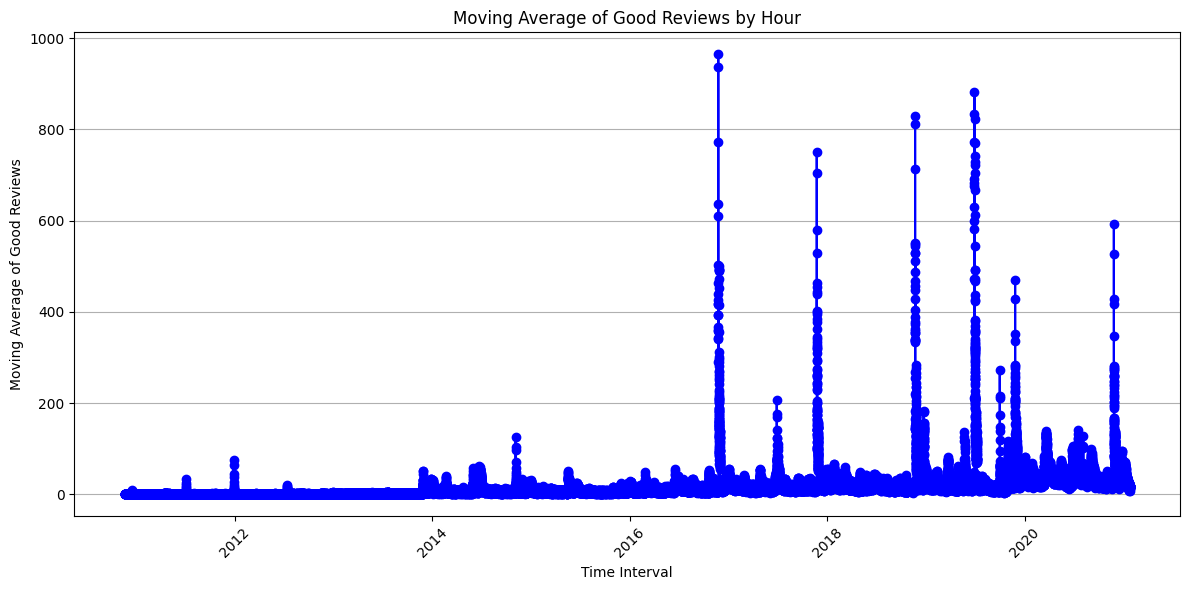

In [ ]:


# Converting the timestamp to datetime format

data['timestamp_created'] = pd.to_datetime(data['timestamp_created'], unit='s')


# Identifying good reviews (e.g., weighted_vote_score >= 0.5)
good_reviews = data[data['weighted_vote_score'] >= 0.5].copy()  # Burada copy() kullanarak bir kopyasını alıyoruz


# Creating time intervals (e.g., grouping by each hour)
good_reviews['time_interval'] = good_reviews['timestamp_created'].dt.floor('h')

# Calculating the number of good reviews by time interval
reviews_per_hour = good_reviews.groupby('time_interval').size()
"""
# Bar plot ile görselleştirme
# Visualizing with a bar plot
# Visualizzazione con un grafico a barre
plt.figure(figsize=(12, 6))
reviews_per_hour.plot(kind='bar', color='skyblue')
plt.title('Number of Good Reviews by Hour')
plt.xlabel('Time Interval')
plt.ylabel('Number of Good Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
"""
reviews_per_hour_moving_avg = reviews_per_hour.rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(reviews_per_hour_moving_avg.index, reviews_per_hour_moving_avg, color='blue', marker='o')
plt.title('Moving Average of Good Reviews by Hour')
plt.xlabel('Time Interval')
plt.ylabel('Moving Average of Good Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter

# Selecting the top 100 users with the most likes
top_100_users = data.nlargest(100, 'votes_helpful')['author.steamid']


# Calculating the frequency of user IDs
user_counts = Counter(top_100_users)


# Printing the most common user IDs and their counts
common_users = user_counts.most_common(10)

print("Most Common Users in Top 100 by Helpful Votes:")
for user, count in common_users:
    print(f"User ID: {user}, Count: {count}")

Most Common Users in Top 100 by Helpful Votes:
User ID: 76561198290310711, Count: 1
User ID: 76561198036586617, Count: 1
User ID: 76561198347710034, Count: 1
User ID: 76561198041425594, Count: 1
User ID: 76561197996764341, Count: 1
User ID: 76561197970757029, Count: 1
User ID: 76561197974906336, Count: 1
User ID: 76561198291704707, Count: 1
User ID: 76561197998187100, Count: 1
User ID: 76561198354182544, Count: 1


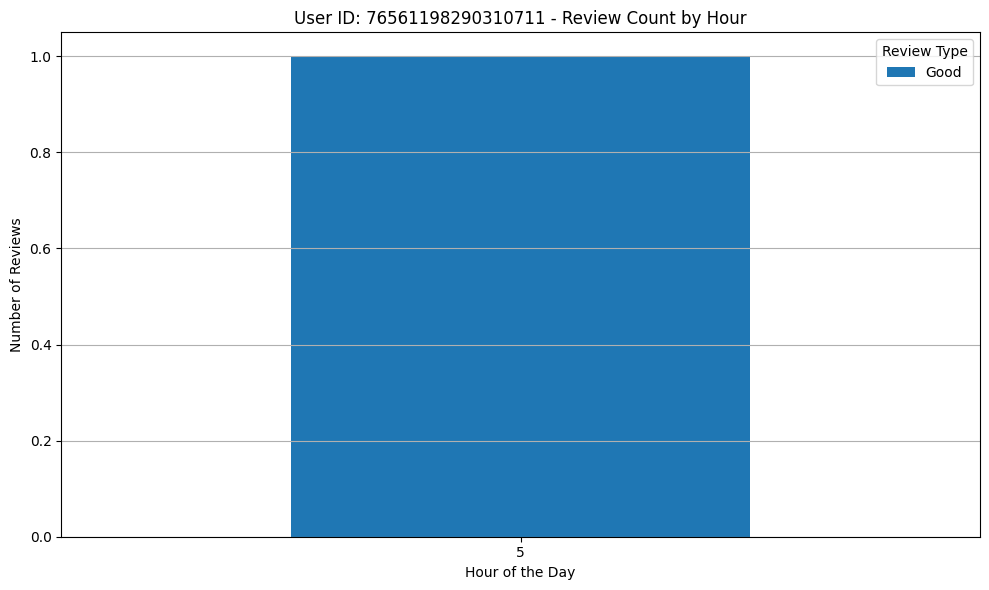

User ID: 76561198290310711 - Review Summary:
         weighted_vote_score review_type  hour
5788626             0.953941        Good     5




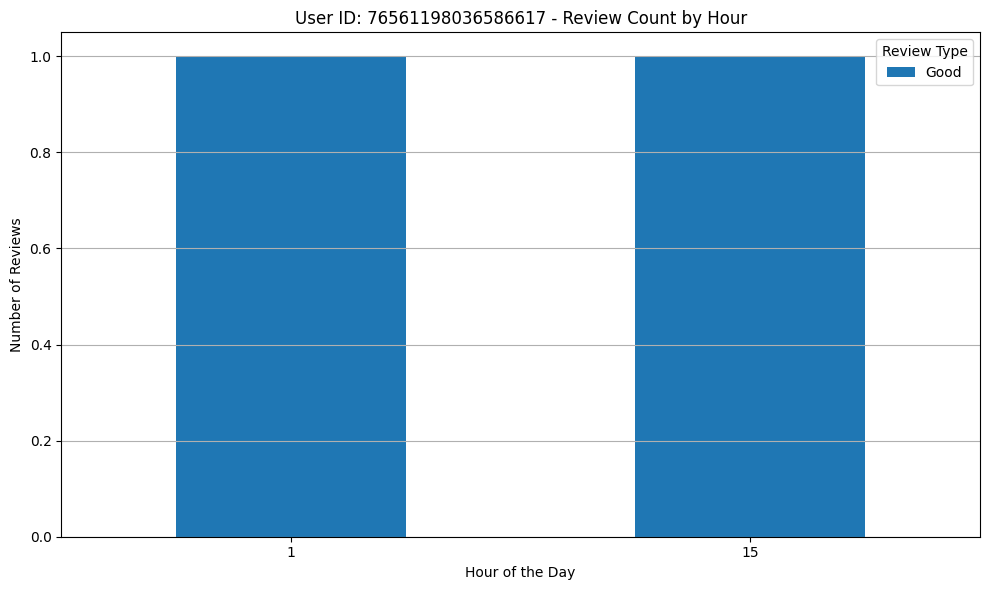

User ID: 76561198036586617 - Review Summary:
         weighted_vote_score review_type  hour
3256421             0.903982        Good     1
5247440             0.529412        Good    15




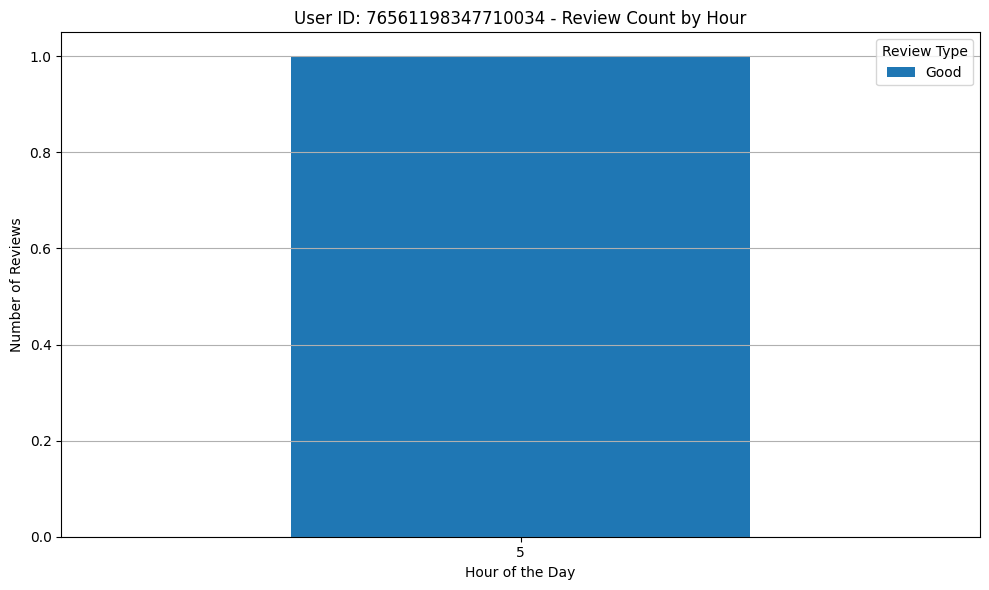

User ID: 76561198347710034 - Review Summary:
         weighted_vote_score review_type  hour
4606795             0.991802        Good     5




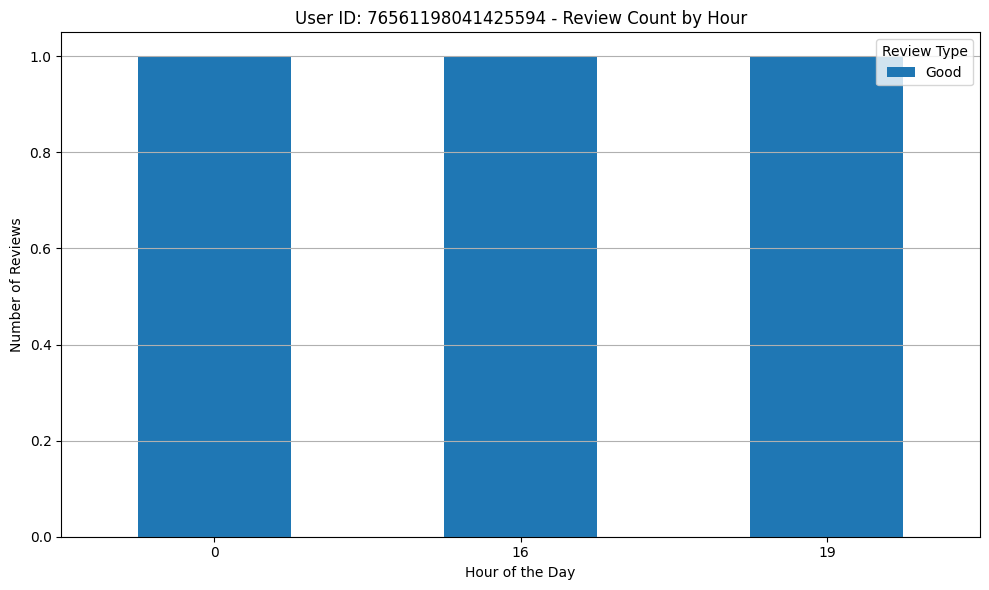

User ID: 76561198041425594 - Review Summary:
         weighted_vote_score review_type  hour
2676485             0.678717        Good    19
3402922             0.517930        Good    16
3728109             0.962367        Good     0




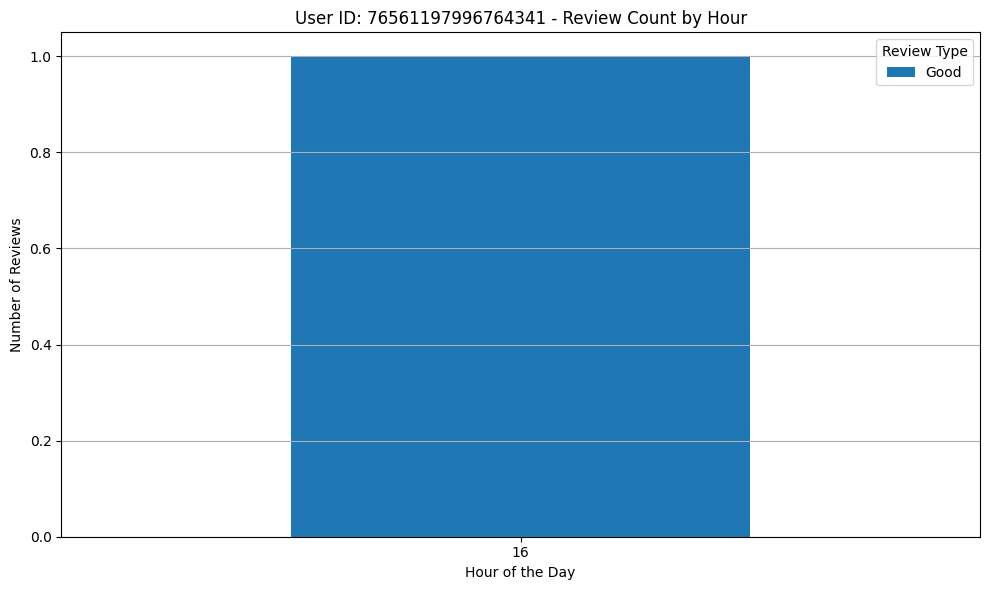

User ID: 76561197996764341 - Review Summary:
         weighted_vote_score review_type  hour
1532180             0.887856        Good    16




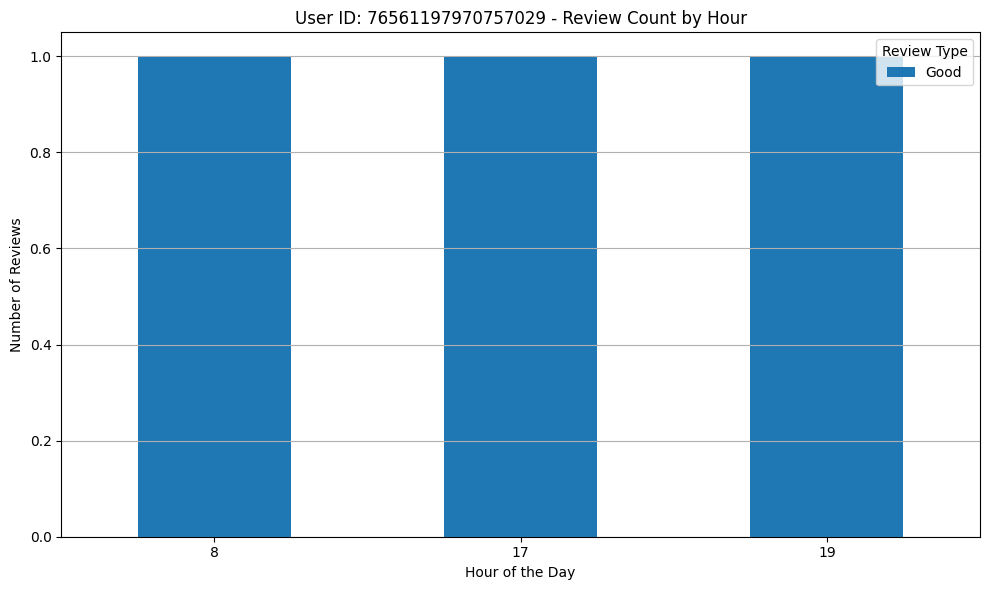

User ID: 76561197970757029 - Review Summary:
         weighted_vote_score review_type  hour
3009933             0.899909        Good    17
4463106             0.790615        Good     8
4821807             0.523810        Good    19




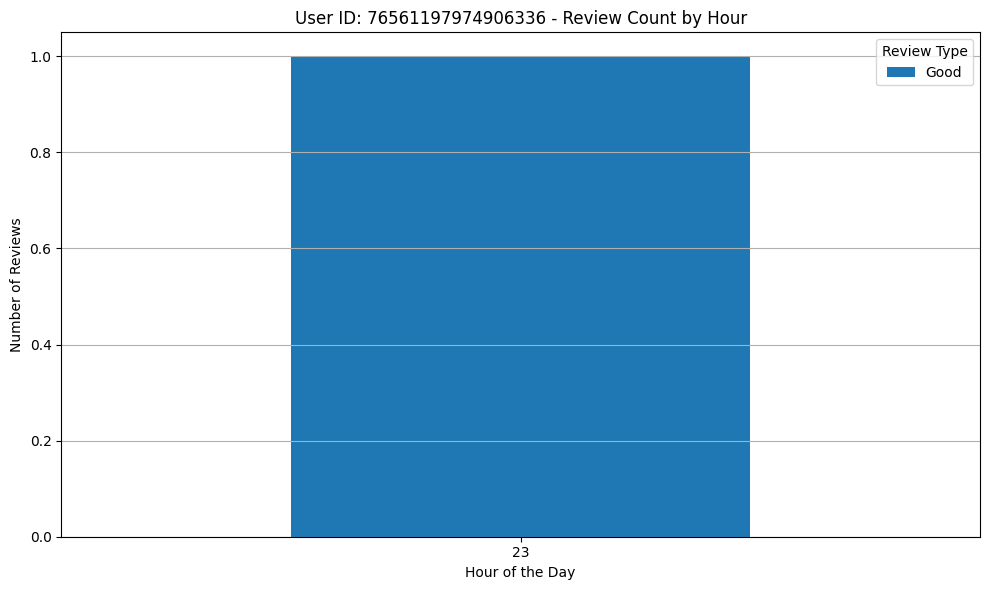

User ID: 76561197974906336 - Review Summary:
         weighted_vote_score review_type  hour
2238830             0.931551        Good    23




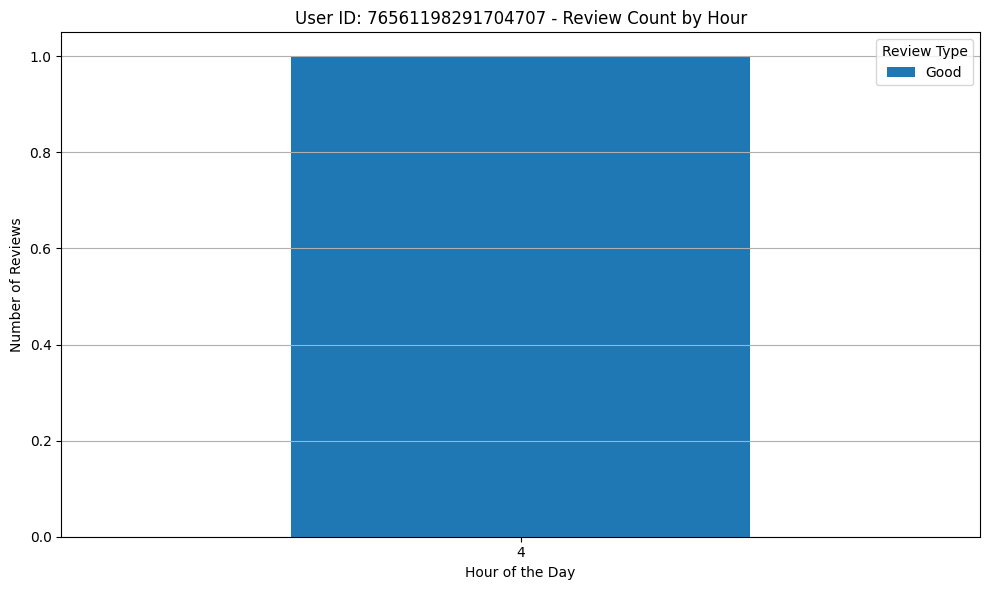

User ID: 76561198291704707 - Review Summary:
         weighted_vote_score review_type  hour
3104946              0.90771        Good     4




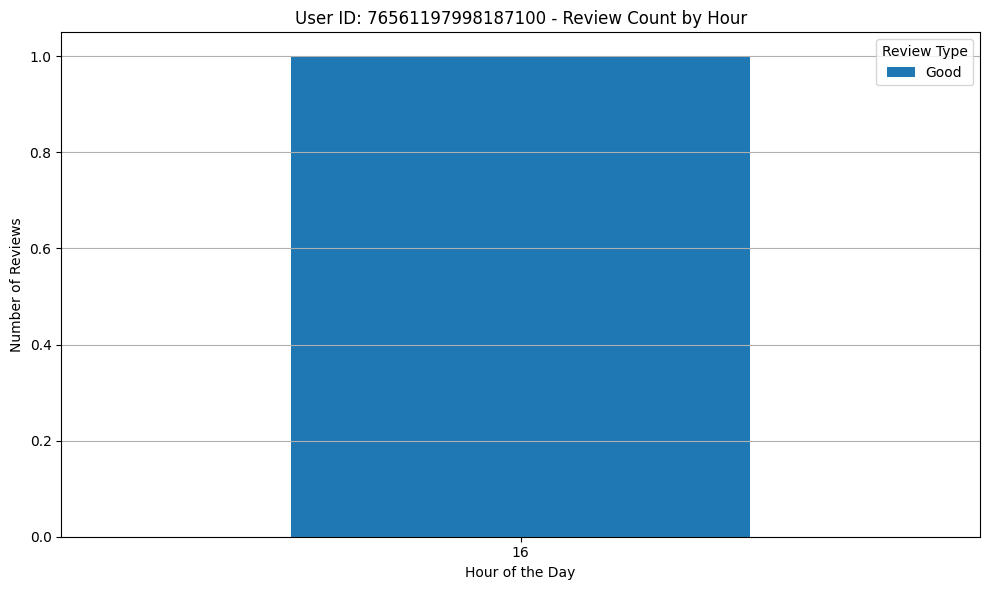

User ID: 76561197998187100 - Review Summary:
         weighted_vote_score review_type  hour
5447247             0.947975        Good    16




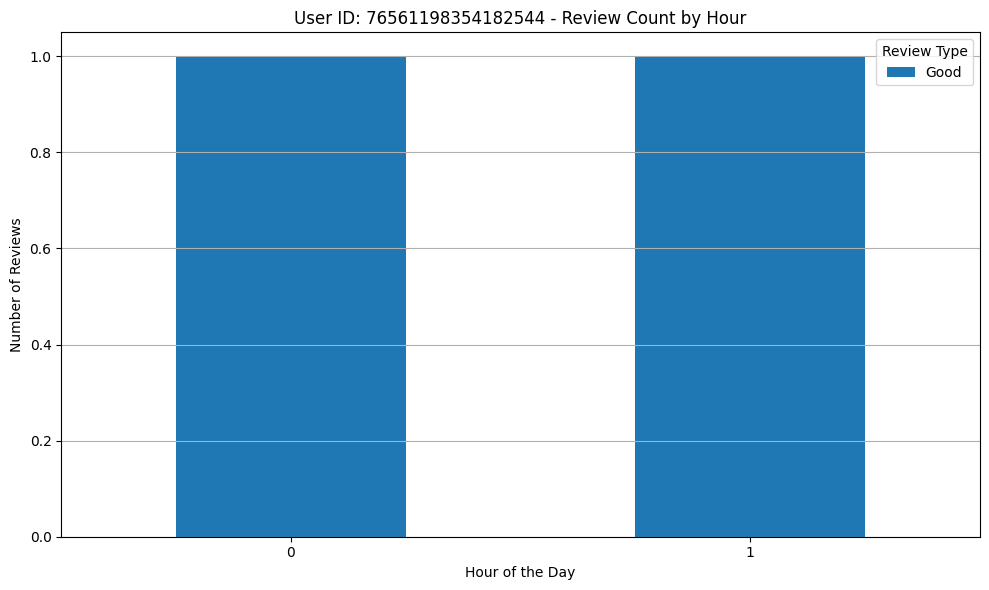

User ID: 76561198354182544 - Review Summary:
         weighted_vote_score review_type  hour
4574074             0.957065        Good     1
5144471             0.989233        Good     0




In [ ]:
from collections import Counter


# Selecting the top 10 users with the most likes

top_10_users = data.nlargest(10, 'votes_helpful')['author.steamid']


# Analyzing user reviews

for user_id in top_10_users:
    user_reviews = data[data['author.steamid'] == user_id].copy()  # Copy to avoid SettingWithCopyWarning
    user_reviews['review_type'] = user_reviews['weighted_vote_score'].apply(lambda x: 'Good' if x >= 0.5 else 'Bad')


    # Extracting the hour of the review

    user_reviews['hour'] = pd.to_datetime(user_reviews['timestamp_created'], unit='s').dt.hour


    # Counting the number of reviews by hour and type

    review_counts = user_reviews.groupby(['hour', 'review_type']).size().unstack(fill_value=0)


    review_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'User ID: {user_id} - Review Count by Hour')

    plt.xlabel('Hour of the Day')

    plt.ylabel('Number of Reviews')

    plt.legend(title='Review Type')


    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Printing the user's review summary

    print(f"User ID: {user_id} - Review Summary:")
    print(user_reviews[['weighted_vote_score', 'review_type', 'hour']])
    print("\n")

##### **Analysis**
**According to Graph and Data**

Looking at the data and graph presented, it can be said that more experienced users (those who have been playing the game for a long time) tend to give lower scores on average.
* “New”: The user group with the lowest playing time has the highest average score (0.2459).
* Score Declines as User Experience Increases: The mean scores decrease for the “Casual”, “Experienced” and “Veteran” groups, respectively (0.1932, 0.1568, 0.1633).


**There are several potential explanations for this trend:**

Excitement of New Players: Players with less gaming experience may score higher due to the excitement of exploring a new game.
* Game Selection: Experienced players play games that appeal to them more selectively. This can drive down average scores. They may choose games based on criteria such as complexity, difficulty level or style of play.
* Game Complexity: Games with high complexity can challenge experienced players more, which can lead to lower scores. Experienced players are more likely to notice bugs or flaws in the game mechanics.
* Scoring Trends: Experienced players are generally able to evaluate games from a more critical perspective. This can lead to lower scores.

## **RQ2**

#### **2.1**
**Identify which applications have the highest and lowest number of reviews.**

In [ ]:
# Import app_name column only
df_app_name = pd.read_csv('steam_reviews.csv', usecols=['app_name'])

# Group by name, calculate how many times single game is present in DF
# and then sort in ascending order
gamesCount = df_app_name.groupby('app_name').size().sort_values()

# More reviews
print("Most reviews application", gamesCount.iloc[-1:])
# Less reviews
print("Least reviews application", gamesCount.iloc[:1])

Most reviews application app_name
PLAYERUNKNOWN'S BATTLEGROUNDS    1644255
dtype: int64
Least reviews application app_name
Neon Hardcorps    200
dtype: int64


**Comments about the exercise:**

1. Only the "app_name" column was imported from the dataframe.
2. Next, a grouping was performed by each unique game name using `groupby`, followed by counting the occurrences of each game in the dataframe, and finally, the results were sorted.
3. Lastly, the first and last rows were printed to identify the game with the most reviews and the game with the fewest reviews.

#### **2.2**
**Plot the number of reviews for each application in descending order. What insights can you draw from the plot?**

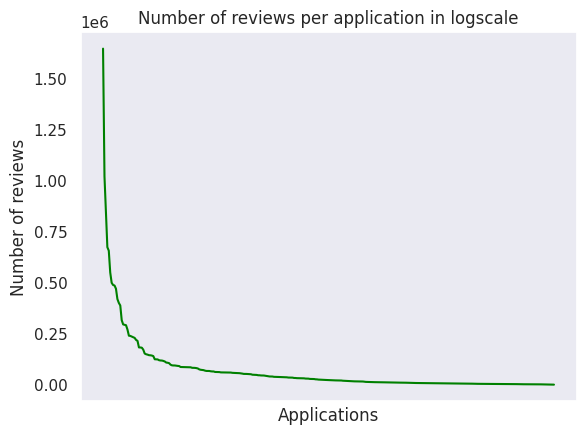

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import app_name column only
df_app_name = pd.read_csv('steam_reviews.csv', usecols=['app_name'])

# Group by name, calculate how many times single game is present in DF
# and then sort in ascending order
gamesCount = df_app_name.groupby('app_name').size().sort_values()

plt.plot(gamesCount.sort_values(ascending=False), linestyle="-", color="green")

plt.grid(None)

plt.title("Number of reviews per application in logscale")

# Remove xticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False, # labels along the bottom edge are off
)

plt.xlabel("Applications")
plt.ylabel("Number of reviews")

plt.show()

**Comments about exercise:** \
From the plot is easy to understand that number of reviews decrease rapidly, only few applications have at least

Comments about exercise:
The plot shows that the number of reviews decreases rapidly; only a few applications have a high number of reviews.

#### **2.3**
**For the top 5 applications by number of reviews, how many reviews came from users who purchased the application versus those who received it for free? Provide a percentage breakdown and highlight any similarities.**

In [ ]:
import pandas as pd

# Import app_name column only
df_app_name = pd.read_csv('steam_reviews.csv', usecols=['app_name'])

# Group by name, calculate how many times single game is present in DF
# and then sort in ascending order
gamesCount = df_app_name.groupby('app_name').size().sort_values()

# Create list of top 5 reviewed applications names
top5_games = gamesCount.tail().index

# Create empty list to save filtered chunks
filtered_data = []

# Read whole CSV file by chunk of size 100000 to get
# every column of top5_games only
for chunk in pd.read_csv('steam_reviews.csv', chunksize=100000):

    # Keep only rows which 'app_name' column is in "top5_games"
    filtered_chunk = chunk[chunk['app_name'].isin(top5_games)]

    # Add filtered data to list of filtered data
    filtered_data.append(filtered_chunk)

# Create Dataframe from filtered data of each chunk
filtered_df = pd.concat(filtered_data, ignore_index=True)

# Calculate how many times single game is present in DF
filtered_df.groupby('app_name').size()

# Group each top5 game, count unique occurrances of received_for_free column
# and then convert the resulting Series in a Dataframe
# (fill_value = 0 ensures that any missing count are filled with 0 value)
counts = filtered_df.groupby('app_name')['received_for_free'].value_counts().unstack(fill_value=0)

# Calculate ratio of True to False and convert to percentage
counts['False_to_True_Percentage'] = (counts[True] / counts[False]) * 100

print(counts)

received_for_free                 False   True  False_to_True_Percentage
app_name                                                                
Garry's Mod                      630759  24765                  3.926222
Grand Theft Auto V               980492  38624                  3.939247
PLAYERUNKNOWN'S BATTLEGROUNDS   1582812  61443                  3.881889
Terraria                         652661  20154                  3.087974
Tom Clancy's Rainbow Six Siege   805618  36300                  4.505858


The **top 5 games and their "received_for_free" percentages** are:

*   **Garry's Mod**, percentage: **3.93%**
*   **Grand Theft Auto V**, percentage: **3.94%**
*   **PLAYERUNKNOWN'S BATTLEGROUNDS**, percentage: **3.88%**
*   **Terraria**, percentage: **3.09%**
*   **Tom Clancy's Rainbow Six Siege**, percentage: **4.51%**

It's easy to highlight that **every percentage is around 4%**.

#### **2.4**
**Which applications have the most and the least user recommendations? Summarize your findings.**

In [ ]:
# Dictionary to save how many recommendation each game has
userDictionary = {}

# Read whole CSV file by chunk of size 200000
for chunk in pd.read_csv('steam_reviews.csv', chunksize=200000):
    # For each row of the chunk, count how many True value in 'recommended' column for each game
    recommValues = chunk[chunk['recommended'] == True].groupby('app_name')['recommended'].count()

    # Update dictionary adding new values
    for app, count in recommValues.items():
        userDictionary[app] = userDictionary.get(app, 0) + count

# Search for max value in dictionary, max(..., key=userDictionary.get) function
# return key associated with max value in the dictionary
maxGameKey = max(userDictionary, key=userDictionary.get)
print(maxGameKey, userDictionary[maxGameKey])

# Search for min value in dictionary, same way as above
minGameKey = min(userDictionary, key=userDictionary.get)
print(minGameKey, userDictionary[minGameKey])

PLAYERUNKNOWN'S BATTLEGROUNDS 886417
Neon Hardcorps 89


**Comments about exercise:** \
The most recommended game is **PLAYERUNKNOWN'S BATTLEGROUNDS** with 886417 recommendations. \
The least recommended game is **Neon Hardcorps** with 89 recommendations.

#### **2.5**
**Is there a correlation between the number of recommendations and the applications' review scores? Use a statistical test to confirm the significance of the relationship.**

**Review Score**

To calculate the review score, We considered the following columns:



*   '**app_name**': the name of the game.
*   '**recommended**': indicates whether the review is positive or negative in boolean fashion.
*   '**author.playtime_forever**': the total playtime on the game by the player who submitted the review.

Initially, We also tried to include columns like '**votes_helpful**' and '**weighted_vote_score**'; however, as shown in the code below, many rows in the dataset have these values set to zero or one, limiting their usefulness.

In [ ]:
votes_helpful_DF = pd.read_csv('steam_reviews.csv', usecols=['votes_helpful'])

print(votes_helpful_DF.size - votes_helpful_DF[votes_helpful_DF['votes_helpful'] > 0]) # Return 15.642.127, so nearly 70% of rows has 0 value in this column.
print(votes_helpful_DF.size - votes_helpful_DF[votes_helpful_DF['votes_helpful'] > 1]) # Return 19.120.233, so nearly 90% of rows has 0 or 1 value in this column.

          votes_helpful
23             21747370
27             21747332
29             21747370
64             21747370
85             21747370
...                 ...
21747354       21747366
21747355       21747368
21747357       21747357
21747362       21747370
21747365       21747284

[6105244 rows x 1 columns]
          votes_helpful
27             21747332
150            21747368
172            21747369
309            21747369
352            21747368
...                 ...
21747353       21747365
21747354       21747366
21747355       21747368
21747357       21747357
21747365       21747284

[2627138 rows x 1 columns]


To calculate the score, We introduced a "**timeFactor**" for each review, which is the player's playtime for that review divided by the average playtime for the specific game.

Notice that this **average playtime differs depending on whether the review is positive or negative**.

For positive reviews, the player’s playtime is divided by the average playtime of positive reviewers, and similarly for negative reviews.

These averages are labeled "**mean_playtime_true**" and "**mean_playtime_false**," respectively:




In [ ]:
# Mean playtime for review with recommended = True
mean_playtime_true = group[group['recommended'] == True]['author.playtime_forever'].mean()
# Mean playtime for review with recommended = False
mean_playtime_false = group[group['recommended'] == False]['author.playtime_forever'].mean()

NameError: name 'group' is not defined

This distinction is necessary because players who review positively tend to continue playing, accumulating more hours, whereas those with negative reviews often stop playing.

Normalizing each playtime for the same average value makes negative reviews less important.

Next, The "**weighted_recommended**" value for each review is created and set to 1 for positive reviews while -1 for negative reviews.

In [ ]:
# Assign 1 to the review value if 'recommended' = True, -1 otherwise.
group['weighted_recommended'] = np.where(group['recommended'] == True, 1, - 1)

The final review score is calculated as follows:

$$\text{score} = \frac{\sum (\text{weighted_recommended} \times \text{timeFactor})}{\text{total_recomm}}$$

In [ ]:
import pandas as pd
import numpy as np

# Import only needed columns
revScoreDF = pd.read_csv('steam_reviews.csv', usecols=['app_name', 'recommended', 'author.playtime_forever'])

def calculate_review_score(group):

    # Mean playtime for review with recommended = True
    mean_playtime_true = group[group['recommended'] == True]['author.playtime_forever'].mean()
    # Mean playtime for review with recommended = False
    mean_playtime_false = group[group['recommended'] == False]['author.playtime_forever'].mean()

    # Assign 1 to the review value if 'recommended' = True, -1 otherwise.
    group['weighted_recommended'] = np.where(group['recommended'] == True, 1, - 1)

    # Count total number of reviews for current game
    total_recomm = group['weighted_recommended'].size

    # Calculate timeFactor for each review and, based on the 'recommended' value, whether True or False,
    # the playing time of the player who writes the review is compared to the playing average
    # of players who wrote a review, respectively, with 'recommended' True or False
    group['timeFactor'] = np.where(
        group['recommended'] == True,
        group['author.playtime_forever'] / mean_playtime_true,
        group['author.playtime_forever'] / mean_playtime_false
    )

    # I calculate the score and the products of each review's votes by their timeFactor, the
    # all normalized to the total number of reviews
    score = sum(group['weighted_recommended'] * group['timeFactor']) / total_recomm

    return score

# Apply the function to calculate the score for each unique game (each game is divided into individual groups to which the function is applied)
review_score = revScoreDF.groupby('app_name').apply(calculate_review_score).reset_index(name='review_score')

**Correlation between review score and number of recommendation**

ChatGPT was consulted to determine an appropriate test for assessing correlation, and the **Pearson correlation coefficient** was suggested, as follows:

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Apply the function to calculate the score for each unique game (each game is divided into individual groups to which the function is applied)
review_score_df = revScoreDF.groupby('app_name').apply(calculate_review_score).reset_index(name='review_score')

# In this test there's should be no Na values in the columns.
review_score_df = review_score_df.dropna()

# Count total number of recommendation for each game
revScoreDF['recommended_numeric'] = revScoreDF['recommended'].astype(int)
total_recomm_df = revScoreDF.groupby('app_name')['recommended_numeric'].sum().reset_index(name='total_recommendations')

# Merge data
merged_df = pd.merge(review_score_df, total_recomm_df, on='app_name')

# Calculation of the Pearson correlation coefficient
correlation, p_value = pearsonr(merged_df['review_score'], merged_df['total_recommendations'])

# Print results
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Results are:

*   **Pearson correlation coefficient**: 0.14970205801140887
*   **P-value**: 0.007880736681157978

From what ChatGPT said there is correlation if:

* **Pearson correlation coefficient** has a value close to **1 (strong positive correlation)** or close to **-1 (strong negative correlation)**, if it has a value around **0** there is **little or no correlation**.
* **P-value** has a value less than **0.05**, in this case there is a statistically significant correlation.

So the data show weak correlation with a P-value that indicate strong significance.

One of the conditions for using Pearson is that the distribution of the data should be normal, plotting the distribution using a histogram, and the Q-Q plot, in fact, does not show any normal distribution, so Pearson is not very suitable as a statistical test.

Once again ChatGPT was consulted, and it suggest: the **Spearman Rank Correlation** and **Kendall's Tau** tests.


In [ ]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau

# Perform Spearman's rank correlation test
correlation, p_value = spearmanr(merged_df['review_score'], merged_df['total_recommendations'])

print("Spearman's correlation coefficient:", correlation)
print("p-value:", p_value)

# Perform Kendall's Tau correlation test
correlation, p_value = kendalltau(merged_df['review_score'], merged_df['total_recommendations'])

print("Kendall's Tau correlation coefficient:", correlation)
print("p-value:", p_value)

Spearman results are:

*   **Spearman's correlation coefficient**: 0.3517847483712336
*   **p-value**: 1.4083774651487946e-10

Kendall's Tau results are:

*   **Kendall's Tau correlation coefficient**: 0.2311605854699615
*   **p-value**: 9.966148611904685e-10

Both tests indicate a positive correlation between the two variables. While the correlation is not extremely strong, it is statistically significant.

This suggests that there is a trend where games with higher review scores tend to receive more recommendations, which is a result consistent with expectations.

## **RQ3**

#### **3.1**
**Plot the number of reviews submitted each month and describe any trends.**


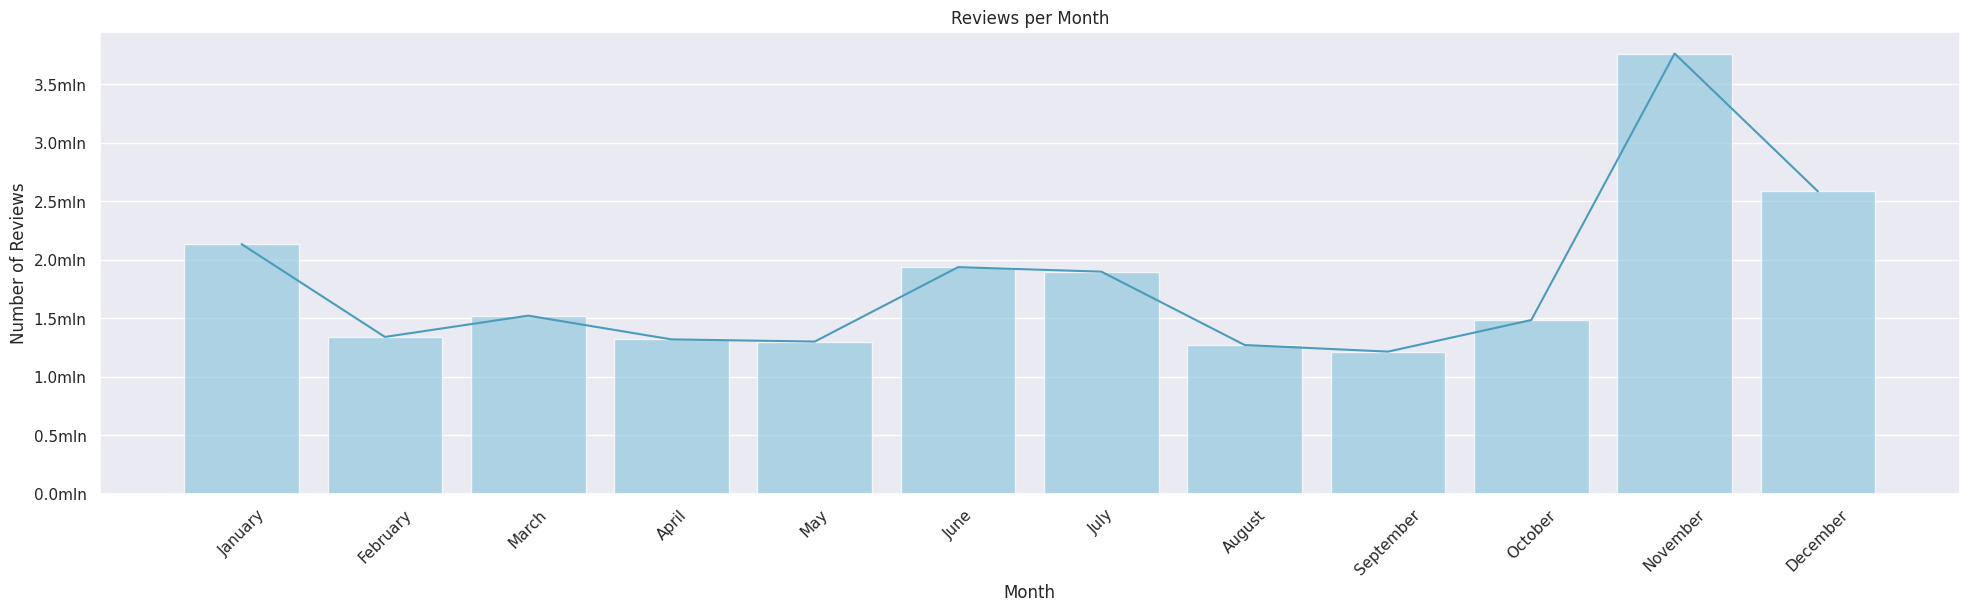

In [ ]:
df_timestamp = pd.read_csv('steam_reviews.csv', usecols=['timestamp_created'])
df_timestamp['timestamp_created'] = pd.to_datetime(df_timestamp['timestamp_created'], unit='s')

# Initialize a list with months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Find the number of reviews for each month
per_month = df_timestamp.groupby(df_timestamp['timestamp_created'].dt.month).size()

# PLOTTING
sns.set_theme(style="darkgrid")
plt.figure(figsize=(24, 6))
sns.barplot(x=months, y=per_month.values, color="skyblue", alpha = 0.7)
plt.plot(months, per_month.values, color="#4B9BBB", linestyle="-")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.title("Reviews per Month")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.1f}mln'))
plt.show()

#### **3.2.**
**Identify any seasonal patterns or trends in review activity. Explain any seasonal impact you notice.**

* **Winter (January, February, March):** The beginning of the year is marked by a peak in number of reviews in the month of **January**, possibly due to post-holiday activity. The significant drop in **February**, followed by the moderate recovery in **March**, suggests a cooling off period and a progressive stabilization.


* **Spring (April, May, June):** The number of reviews remains steady and slightly lower than March for the months of **April** and **May**, indicating a quieter period for engagement. **June** is characterized by a noticeable uptick in reviews suggesting an increase in activity, potentially correlated with the beginning of Summer vacations.

* **Summer (July, August, September):** Summer begins with strong activity in **July**, although slightly weaker than what seen in June. A sharp drop follows for both the monts of **August** and **September** (the last being the the lowest review count of the year), possibly reflecting a shift in user priorities towards outdoor activities.

* **Fall (October, November, SepDecember):** The fall season starts quietly in **October**. In **November** we can observe a dramatic spike, that could be correlated to major events of the season like Black Friday and to preparation for the holiday season. This is the highest point of the year. As a matter of fact, reviews remain strong in **December** though lower than the previous month.


#### **3.3**
**Determine if certain times of the year have higher engagement rates. Describe noticeable peaks in user activity.**

Each review in the dataset is associated to a number of "*helpful* " and "*funny* " votes the review recieved.

After removing the outliers. The **engagement score** for each month can be computed through the formula:


\begin{equation}
\\
\text{Engagement Score} = \frac{\sum_\text{month}{\text{Votes Helpful}_\text{month} + \text{Votes Funny}_\text{month} }}{\text{Num of Reviews for Month}}
\end{equation}

In [ ]:
help = pd.read_csv('steam_reviews.csv', usecols=['votes_helpful'])

# Calculate the first and third quartiles
Q1 = help['votes_helpful'].quantile(0.25)
Q3 = help['votes_helpful'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound_help = Q1 - 1.5 * IQR
upper_bound_help = Q3 + 1.5 * IQR

In [ ]:
funny = pd.read_csv('steam_reviews.csv', usecols=['votes_funny'])

# Calculate the first and third quartiles
Q1 = funny['votes_funny'].quantile(0.25)
Q3 = funny['votes_funny'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound_funny = Q1 - 1.5 * IQR
upper_bound_funny = Q3 + 1.5 * IQR

In [ ]:
monthly_engagement_scores = {}
for chunk in pd.read_csv('steam_reviews.csv',
                          chunksize=200000,
                          usecols=['timestamp_created', 'votes_helpful', 'votes_funny']):

    # Remove outliers
    chunk = chunk[(chunk['votes_helpful'] >= lower_bound_help) & (chunk['votes_helpful'] <= upper_bound_help) &
                  (chunk['votes_funny'] >= lower_bound_funny) & (chunk['votes_funny'] <= upper_bound_funny)]

    # Convert 'timestamp_created' to datetime format
    chunk['timestamp_created'] = pd.to_datetime(chunk['timestamp_created'], unit = 's')

    # Extract the month from the timestamp
    chunk.loc[:, 'month'] = chunk['timestamp_created'].dt.month

    # Compute individual engagement score for each review
    chunk.loc[:, 'engagement_score'] = (
        (weight_helpful * chunk['votes_helpful']) +
        (weight_funny * chunk['votes_funny'])
    )


    # Sum engagement scores for each month
    for month in range(1, 13):
        month_scores = chunk[chunk['month'] == month]['engagement_score'].sum()

        if month not in monthly_engagement_scores:
            monthly_engagement_scores[month] = 0

        monthly_engagement_scores[month] += month_scores

# Obtain the Engagement Score dividing by the number of reviews for that month
average_monthly_engagement = {month: (monthly_engagement_scores[month] / per_month[month])
                              for month in monthly_engagement_scores if per_month[month] > 0}
engagement_scores = list(average_monthly_engagement.values())

# PLOTTING
plt.figure(figsize=(24, 6))
sns.barplot(x=months, y=engagement_scores, color="coral", alpha = 0.7)
plt.plot(months, engagement_scores, color="#E27C2E", linestyle="-")
plt.xlabel("Month")
plt.ylabel("Engagement Score")
plt.title("Engagement Score per Month")
plt.xticks(rotation=45)
plt.show()

NameError: name 'pd' is not defined

As we can see, there are no significant fluctuations in the **engagement**, remaining **consistently low** across the months.

To analyze peaks in user activity effectively, we focus on the **percentage change in the number of reviews**. We define two thresholds:

* **Low Threshold:** This threshold is associated with percentage changes that fall between 25% and 50% in absolute value.

* **High Threshold:** This threshold pertains to percentage changes that exceed 50% in absolute value.

By employing these thresholds, we can better identify significant fluctuations in user activity over the months.

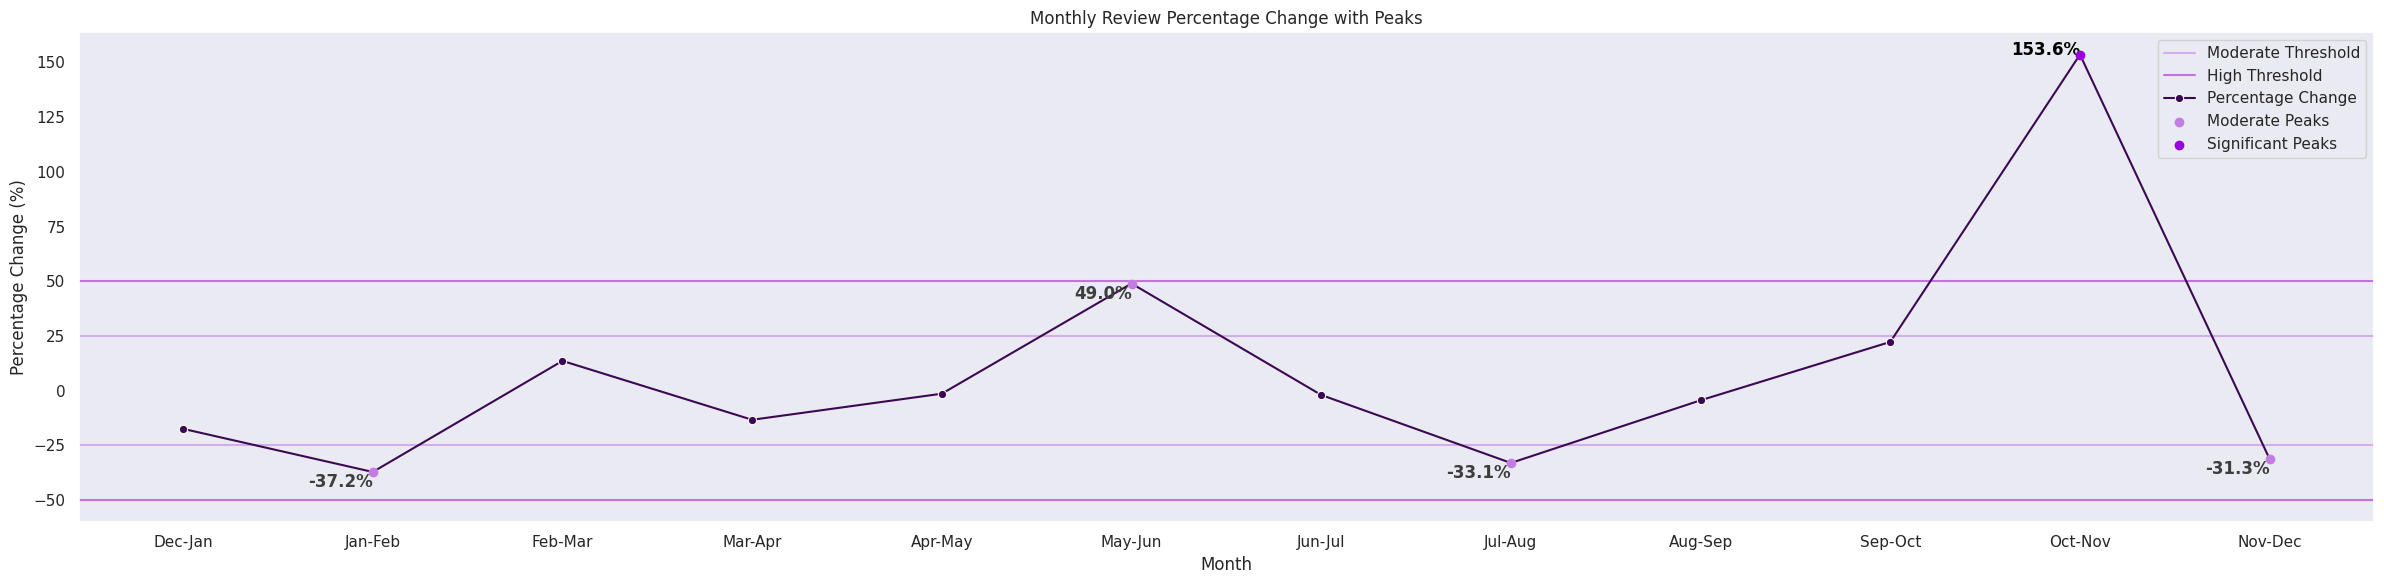

In [ ]:
# Create a DataFrame from per_month for easier handling
monthly_reviews = pd.DataFrame({
    'month': range(1, 13),
    'review_count': per_month.values
})

# Calculate percentage change from the previous month
monthly_reviews['percentage_change'] = monthly_reviews['review_count'].pct_change() * 100

# For January, calculate change relative to December
january_review_count = monthly_reviews.loc[monthly_reviews['month'] == 1, 'review_count'].values[0]
december_review_count = monthly_reviews.loc[monthly_reviews['month'] == 12, 'review_count'].values[0]

# Calculate January's percentage change based on December's count
january_percentage_change = ((january_review_count - december_review_count) / december_review_count) * 100
monthly_reviews.loc[monthly_reviews['month'] == 1, 'percentage_change'] = january_percentage_change

# Define thresholds for identifying peaks
threshold_low = 25
threshold_high = 50

# Identify peaks based on the thresholds
monthly_reviews['is_local_peak'] = (monthly_reviews['percentage_change'].abs() > threshold_low) & (monthly_reviews['percentage_change'].abs() < threshold_high)
monthly_reviews['is_peak'] = monthly_reviews['percentage_change'].abs() > threshold_high


#PLOTTING

sns.set(style='darkgrid')
plt.figure(figsize=(24, 6))

# Draw threshold lines
plt.axhline(y=threshold_low, color='#C073E4', label='Moderate Threshold', alpha = 0.5)
plt.axhline(y=-threshold_low, color='#C073E4', alpha = 0.5)
plt.axhline(y=threshold_high, color='#C073E4', label='High Threshold')
plt.axhline(y=-threshold_high, color='#C073E4')

# Create a line plot
sns.lineplot(data=monthly_reviews, x='month', y='percentage_change', marker='o', color='#3B0953', label='Percentage Change')

# Scatter points for local and significant peaks
plt.scatter(monthly_reviews['month'][monthly_reviews['is_local_peak']],
            monthly_reviews['percentage_change'][monthly_reviews['is_local_peak']],
            color='#C27DE2', label='Moderate Peaks', zorder=7)

plt.scatter(monthly_reviews['month'][monthly_reviews['is_peak']],
            monthly_reviews['percentage_change'][monthly_reviews['is_peak']],
            color='#9800DF', label='Significant Peaks', zorder=7)


# Add annotations for significant points
for idx in monthly_reviews[monthly_reviews['is_peak']].index:
    plt.text(monthly_reviews['month'][idx], monthly_reviews['percentage_change'][idx],
             f'{monthly_reviews["percentage_change"][idx]:.1f}%',
             horizontalalignment='right', size='medium', color='black', weight='semibold')

# Add annotations for weak points
for idx in monthly_reviews[monthly_reviews['is_local_peak']].index:
    plt.text(monthly_reviews['month'][idx], monthly_reviews['percentage_change'][idx]-0.5,
             f'{monthly_reviews["percentage_change"][idx]:.1f}%',
             horizontalalignment='right', verticalalignment='top', size='medium', color='#3D3D3D', weight='semibold')

# Labeling the plot
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.title('Monthly Review Percentage Change with Peaks')

# New x-tick labels
months_labels = ['Dec-Jan', 'Jan-Feb', 'Feb-Mar', 'Mar-Apr', 'Apr-May', 'May-Jun',
                 'Jun-Jul', 'Jul-Aug', 'Aug-Sep', 'Sep-Oct', 'Oct-Nov', 'Nov-Dec']

# Set custom ticks and labels
plt.xticks(ticks=monthly_reviews['month'], labels=months_labels)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


As we can see, the highest peak is seen in **November** with a **percentage increase of 153.6%**.

**June** has the second best with **49.0%** with an **increase** that is lower than the high treshold only by a 1%.

The other months do not see significative fluctuations with the exception of **Jan-Feb -37.2%**, **Jul-Aug -33.1%** and **Nov-Dec -31.3%**.

#### **3.4**
**What is the most common time of day users write reviews? Explain how this time distribution could influence your analysis.**

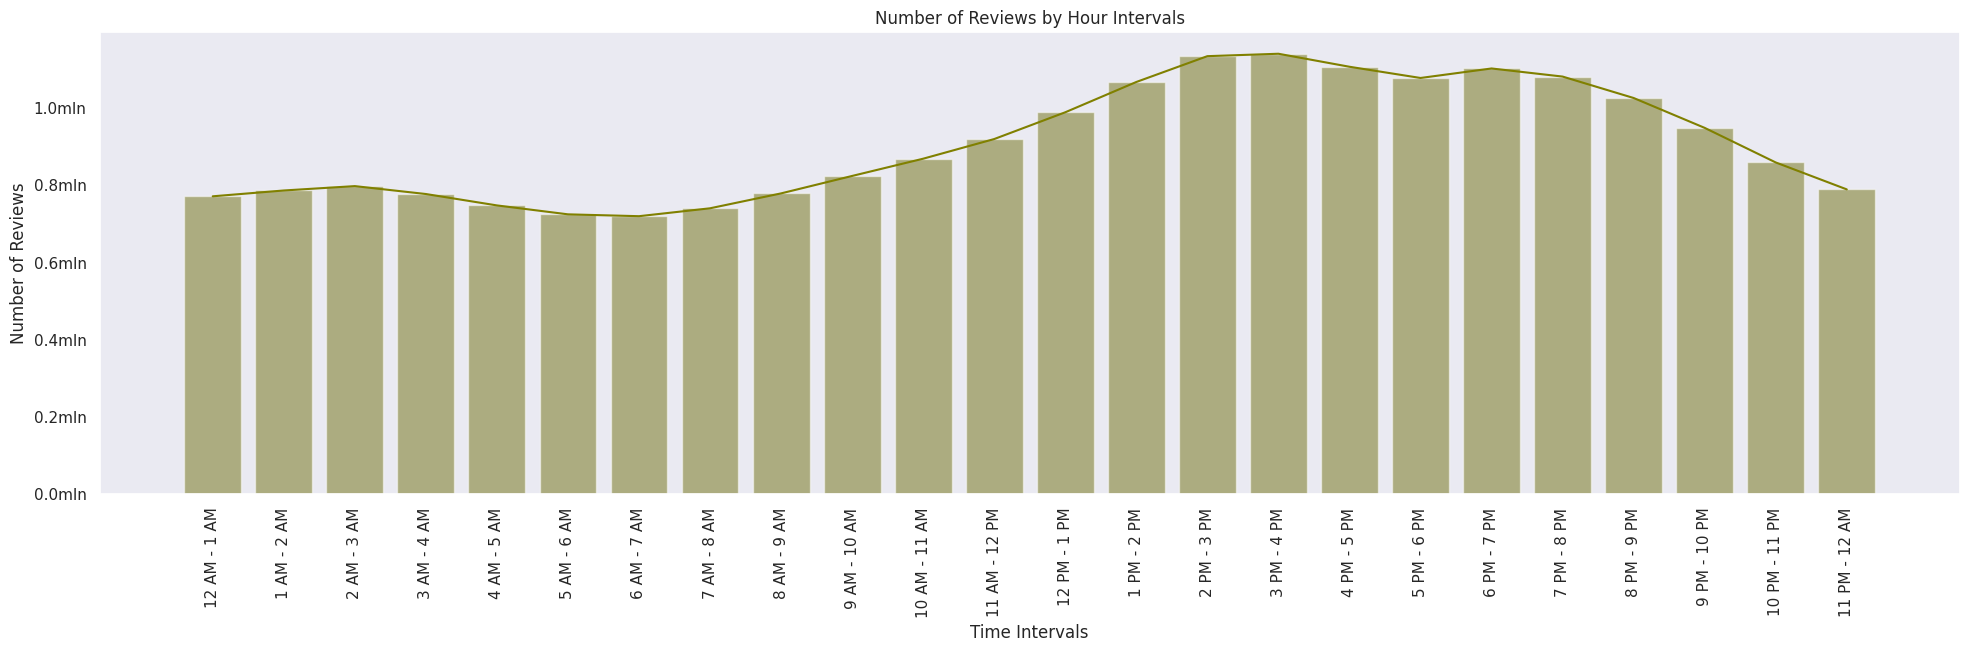

In [ ]:
# Create labels
time_labels = [
    f'{i % 12 or 12} {"AM" if i < 12 else "PM"} - {(i + 1) % 12 or 12} {"AM" if (i + 1) % 24 < 12 else "PM"}'
    for i in range(24)]

# find number of reviews written at any time
hourly_counts = df_timestamp.groupby(df_timestamp['timestamp_created'].dt.hour).size()

# PLOTTING
plt.figure(figsize=(24, 6))
sns.barplot(x=time_labels, y=hourly_counts.values, color='olive', alpha=0.5)
plt.plot(time_labels, hourly_counts.values, color="olive", linestyle="-")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.1f}mln'))
plt.xticks(rotation=90)
plt.title('Number of Reviews by Hour Intervals')
plt.xlabel('Time Intervals')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()

The time distribution analysis for the reviews suggests the **least number of reviews** is written in the early morning, with the interval form **6AM to 7AM** representing the absolute minimum.

The **progressive growth** in the next hours, eventually **peaking** **between 2PM and 4PM**, suggest users may have more free-time in this time slot, possibly due to this time coinciding with post-lunch breaks.

Finally, as the day progresses, the number of reviews **gradually decreases**.


Time analysis could be useful to identify how **different targets tend to write reviews during specific hours**. For example, the highest number of reviews is written in the afternoon, which could signify that a large part of the users is in the school age demographic.

#### **3.5**
**Create a function that accepts a list of time intervals and plots the number of reviews for each interval.**

In [ ]:
# Auxiliary function to check if the timestamp is within a time interval
def is_within_interval(timestamp, start_time, end_time):
    return start_time <= timestamp.time() <= end_time

# Main function to plot reviews for given time intervals
def plot_reviews_by_time_intervals(time_intervals):

    # Initialize a list for the counts
    review_counts = []

    # Iterate through the intarvals and apply the previously defined function
    for start_time, end_time in time_intervals:
        count = df_timestamp[df_timestamp['timestamp_created'].apply(lambda x: is_within_interval(x, start_time, end_time))].shape[0]
        review_counts.append(count)


    # PLOTTING
    plt.figure(figsize=(20, 6))
    plt.barh(range(len(time_intervals)), review_counts, color='gold', alpha=0.5, edgecolor='white')
    plt.yticks(
        range(len(time_intervals)),
        [f'{start.strftime("%H:%M:%S")} - {end.strftime("%H:%M:%S")}' for start, end in time_intervals]
    )
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.1f}mln'))
    plt.title('Number of Reviews by Time Interval')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Time Intervals')
    plt.show()

#### **3.6**
**Use the function to plot the number of reviews for the following time intervals:**

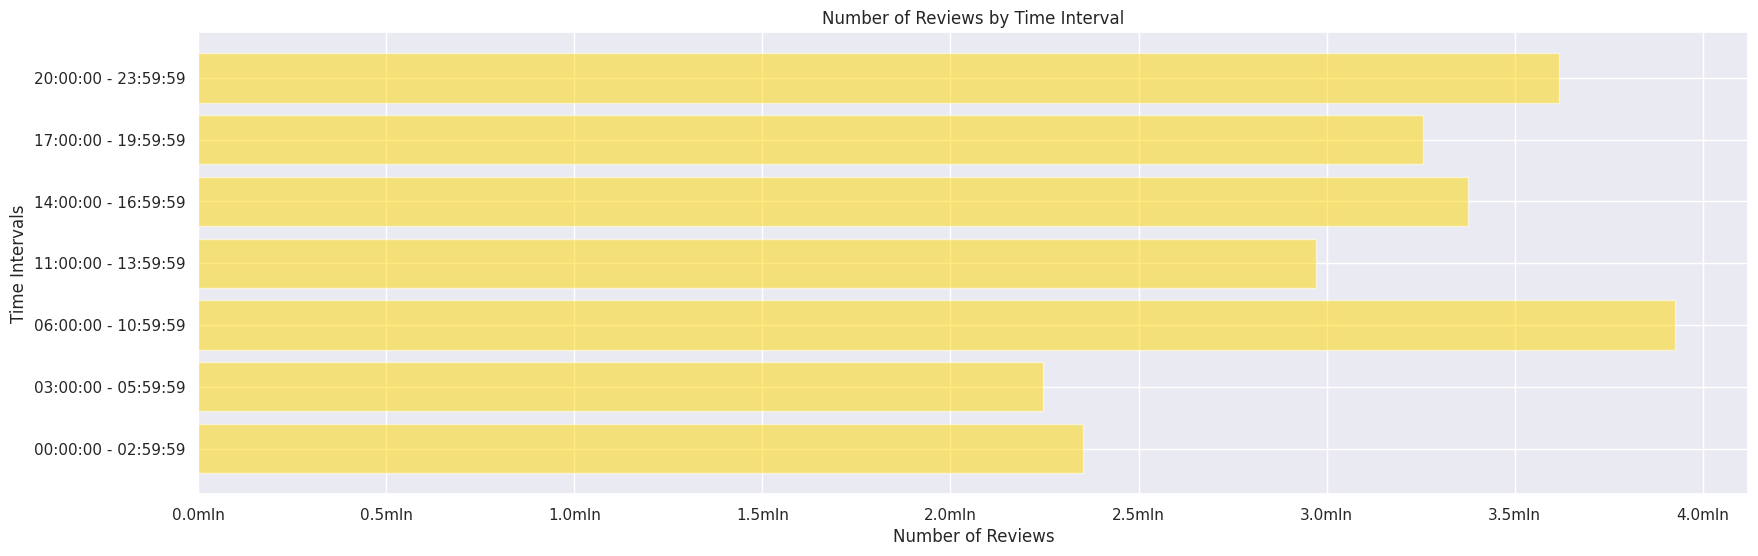

In [ ]:
# Define time intervals
time_intervals = [
    (pd.to_datetime('00:00:00').time(), pd.to_datetime('02:59:59').time()),
    (pd.to_datetime('03:00:00').time(), pd.to_datetime('05:59:59').time()),
    (pd.to_datetime('06:00:00').time(), pd.to_datetime('10:59:59').time()),
    (pd.to_datetime('11:00:00').time(), pd.to_datetime('13:59:59').time()),
    (pd.to_datetime('14:00:00').time(), pd.to_datetime('16:59:59').time()),
    (pd.to_datetime('17:00:00').time(), pd.to_datetime('19:59:59').time()),
    (pd.to_datetime('20:00:00').time(), pd.to_datetime('23:59:59').time())
]

# Use the function on the dataset
plot_reviews_by_time_intervals(time_intervals)

#### **3.7**
**Summarize your findings from the time interval analysis.**

The **least number of reviews** is written from late night to early morning with the two **minimum** number written in the **3AM-6AM interval** followed by the **12AM-3AM** one. This is probably reflective of sleeping schedule.

The time interval from **6AM to 11AM** incorporate the **maximum number of reviews** (although it is also the *longest interval*).

A **decrease** is seen in the time interval corresponding to lunch-time **11AM-2PM** followed by a **slight increase** in the following hours (**from 2PM to 5PM**).

Similarly, a **slight decrease** corresponding to dinner-time from **5PM to 8PM** is followed by **another peak**, though slightly lower that the morning one, from **8PM to 12AM**.

This somewhat aligns with the findings from the time distribution analysis since this interval analysis  involves *non-homogeneous time segments*.




## **RQ4**

#### **4.1**
**Analyze the relationship between the amount of time a user has spent on an application and their review score.**

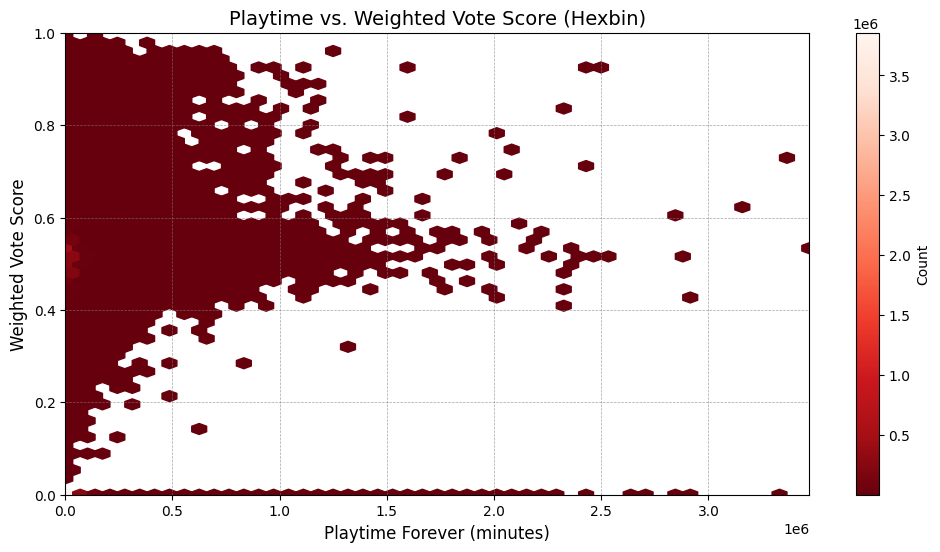

In [ ]:
# 4.1. Analyze the relationship between playtime and review score
plt.figure(figsize=(12, 6))
plt.hexbin(data['author.playtime_forever'], data['weighted_vote_score'], gridsize=50, cmap='Reds_r', mincnt=1)  # Adding more detail by reducing gridsize
plt.colorbar(label='Count')

# Adding lines to make the data in the center of the graph more distinct
plt.xlabel('Playtime Forever (minutes)', fontsize=12)
plt.ylabel('Weighted Vote Score', fontsize=12)
plt.title('Playtime vs. Weighted Vote Score (Hexbin)', fontsize=14)

# Extra adjustments
plt.xlim(0, data['author.playtime_forever'].max())  # Adjusting the playtime axis
plt.ylim(0, 1)  # Adjusting the score axis
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)  # Adding extra grid lines

plt.show()

##### **Analysis**
The resulting hexbin graph visually illustrates the relationship between the amount of time players spend in a game (playing time) and the weighted voting score they give to the game. The color intensity in the graph indicates how many players are in a given playing time and score range.

<br>

**General Trend:**

There is a clear trend in the graph that as players' playing time increases, their rating of the game generally increases. This suggests that the more players play a game, the more knowledge they have about that game and hence the more objective their assessment is.

<br>

**Intensity Zones:**

- Lower Left Corner: In this region, players with low playing time and low point value are concentrated. This can be interpreted as players who tried the game for a short period of time and did not like it and gave it a low score.
- Upper Right Corner: In this region, players with long playing time and high score value are concentrated. This can be interpreted as players giving high scores after playing the game for a long time.

<br>

**Exceptions:**

  There are some points in the graph that are outside the general trend. For example, there may be players who give low scores despite playing for a long time or players who give high scores despite playing for a short time. This suggests that gamers may be influenced by different factors such as their personal tastes, gaming expectations and gaming experiences.

<br>

**Conclusions and Comments**

The data in the graph shows that there is a positive correlation between gamers' playing time and the score they give. That is, players generally give higher scores to games they have played longer. This can be explained by the following factors:

- Game Understanding: The more players play a game, the better they understand its mechanics, story and other features. This allows them to evaluate the game more objectively.

- Engagement: Players who play for a long time are usually more engaged with the game. This attachment can lead players to ignore or downplay negative aspects of the game.

- Game Development: Some games become more challenging as players progress. This may provide a motivation for players to improve their skills and make the game experience more enjoyable.

#### **4.2**
**Do more experienced users (who have used the application longer) tend to give higher or lower ratings? Comment on any trends you observe.**

  user_experience      mean       std
0             New  0.248113  0.248141
1          Casual  0.190075  0.247851
2     Experienced  0.146752  0.234762
3         Veteran  0.153713  0.239980


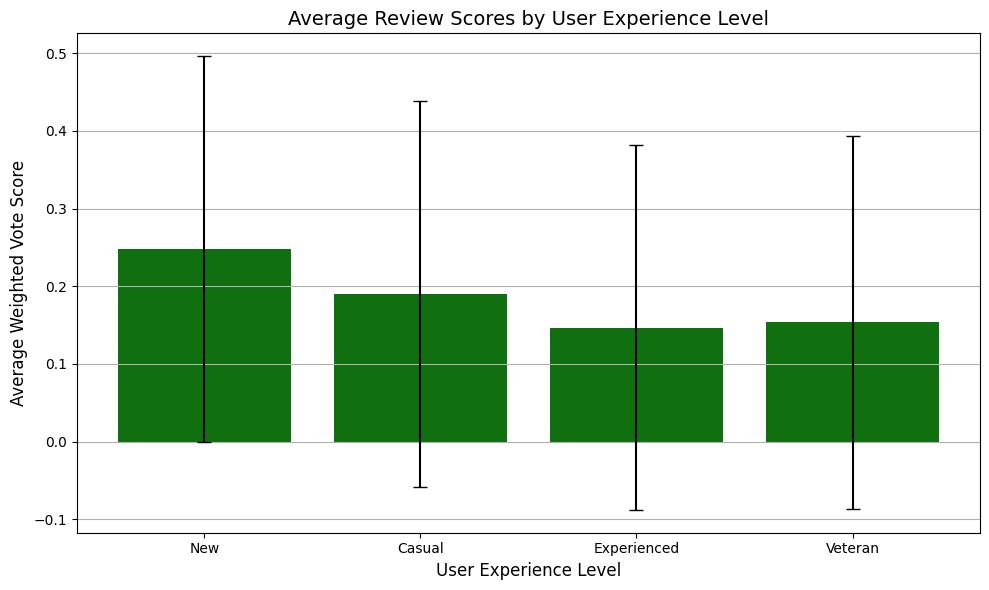

In [ ]:
# Defining user experience levels
data['user_experience'] = pd.cut(data['author.playtime_forever'], bins=[-1, 60, 300, 1000, np.inf], labels=['New', 'Casual', 'Experienced', 'Veteran'])
review_score_by_experience = data.groupby('user_experience', observed=False)['weighted_vote_score'].agg(['mean', 'std'])

review_score_by_experience = review_score_by_experience.reset_index()
print(review_score_by_experience)


plt.figure(figsize=(10, 6))

# Creating a bar plot (without hue)
sns.barplot(x='user_experience', y='mean', data=review_score_by_experience, capsize=0.3, color='green')

# Adding standard deviations
for index, row in review_score_by_experience.iterrows():
    plt.errorbar(row['user_experience'], row['mean'], yerr=row['std'], fmt='none', c='black', capsize=5)

# Axis and title settings
plt.xlabel('User Experience Level', fontsize=12)
plt.ylabel('Average Weighted Vote Score', fontsize=12)
plt.title('Average Review Scores by User Experience Level', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Visualization
plt.tight_layout()
plt.show()

##### **Analysis**

**According to Graph and Data**

Looking at the data and graph presented, it can be said that more experienced users (those who have been playing the game for a long time) tend to give lower scores on average.

* “New”: The user group with the lowest playing time has the highest average score (0.2459).

* Score Declines as User Experience Increases: The mean scores decrease for the “Casual”, “Experienced” and “Veteran” groups, respectively (0.1932, 0.1568, 0.1633).

<br>

**There are several potential explanations for this trend:**

* Excitement of New Players: Players with less gaming experience may score higher due to the excitement of exploring a new game.

* Game Selection: Experienced players play games that appeal to them more selectively. This can drive down average scores. They may choose games based on criteria such as complexity, difficulty level or style of play.

* Game Complexity: Games with high complexity can challenge experienced players more, which can lead to lower scores. Experienced players are more likely to notice bugs or flaws in the game mechanics.

* Scoring Trends: Experienced players are generally able to evaluate games from a more critical perspective. This can lead to lower scores.

#### **4.3**
**Plot the distribution of review scores based on different user experience levels (e.g., new users vs. veteran users). Is there a statistical difference in the score distributions? Use an appropriate statistical test to validate your hypothesis.**

##### **1 - timestamp-updated version**

For this exercise I thought of using the '**timestamp-updated**' column to categorize the users, in particular, I calculated the median of these timestamps for each game and considered as 'New User' the reviewers who wrote the review after the median value, 'Veteran User' otherwise.

To calculate the median of the timestamps, I used the following code:

In [ ]:
# Reads the dataframe and considers only the 'app_name' and 'timestamp_updated' columns
timestampDF = pd.read_csv('steam_reviews.csv', usecols=['app_name', 'timestamp_updated'])
# I calculate the median of each game using groupby() and median()
timestampMedian = timestampDF.groupby('app_name').median().reset_index()
# Rename column
timestampMedian = timestampMedian.rename(columns={'timestamp_updated':'timestamp_median'})

I subsequently calculated the overall scores of the games reviewed by the 'New Users' and the 'Veteran Users' as follows:

**New Users (Under timestamp median)**

In [ ]:
# Function to calculate the review score for each game
def calculate_review_score(group):
    mean_playtime_true = group[group['recommended'] == True]['author.playtime_forever'].mean()
    mean_playtime_false = group[group['recommended'] == False]['author.playtime_forever'].mean()

    group['weighted_recommended'] = np.where(group['recommended'] == True, 1, -1)

    group['timeFactor'] = np.where(
        group['recommended'] == True,
        group['author.playtime_forever'] / mean_playtime_true,
        group['author.playtime_forever'] / mean_playtime_false
    )
    total_recomm = group['weighted_recommended'].size

    score = sum(group['weighted_recommended'] * group['timeFactor']) / total_recomm
    return score

# List to store the results for each chunk
all_scores = []
# Counter to keep in memory the number of rows considered, used
# subsequently in the distribution graphs
underTimeMedianCount = 0

# Loading and filtering data into chunks with condition
for chunk in pd.read_csv('steam_reviews.csv', usecols=['app_name', 'recommended', 'timestamp_updated', 'author.playtime_forever'], chunksize=500000):
    #  medians are added to each row in order to use them in subsequent row filtering
    chunk = chunk.merge(timestampMedian, on='app_name', how='right')
    # Filter only rows that match the condition
    chunk_filtered = chunk[chunk['timestamp_updated'] < chunk['timestamp_median']]  # I only consider rows with timestamps lower than the median

    # Calculate the review score for each game in the filtered chunk
    if chunk_filtered.shape[0] > 0: chunk_scores = chunk_filtered.groupby('app_name').apply(calculate_review_score).reset_index(name='review_score')

    # Add the chunk results to the list
    all_scores.append(chunk_scores)
    # Update counter
    underTimeMedianCount += chunk_filtered.shape[0]

# Combine the results of all chunks and calculate the average for each game
review_score_under_ts_median = pd.concat(all_scores).groupby('app_name').mean().reset_index()

**Veteran Users (Over timestamp median)**

In [ ]:
# Function to calculate the review score for each game
def calculate_review_score(group):
    mean_playtime_true = group[group['recommended'] == True]['author.playtime_forever'].mean()
    mean_playtime_false = group[group['recommended'] == False]['author.playtime_forever'].mean()

    group['weighted_recommended'] = np.where(group['recommended'] == True, 1, -1)

    group['timeFactor'] = np.where(
        group['recommended'] == True,
        group['author.playtime_forever'] / mean_playtime_true,
        group['author.playtime_forever'] / mean_playtime_false
    )
    total_recomm = group['weighted_recommended'].size

    score = sum(group['weighted_recommended'] * group['timeFactor']) / total_recomm
    return score

# List to store the results for each chunk
all_scores = []
# Counter to keep in memory the number of rows considered, used
# subsequently in the distribution graphs
overTimeMedianCount = 0

# Loading and filtering data into chunks with condition
for chunk in pd.read_csv('steam_reviews.csv', usecols=['app_name', 'recommended', 'timestamp_updated', 'author.playtime_forever'], chunksize=500000):
     #  medians are added to each row in order to use them in subsequent row filtering
    chunk = chunk.merge(timestampMedian, on='app_name', how='right')
    # Filter only rows that match the condition
    chunk_filtered = chunk[chunk['timestamp_updated'] > chunk['timestamp_median']]  # I only consider rows with timestamps lower than the median

    # Calculate the review score for each game in the filtered chunk
    if chunk_filtered.shape[0] > 0: chunk_scores = chunk_filtered.groupby('app_name').apply(calculate_review_score).reset_index(name='review_score')

    # Add the chunk results to the list
    all_scores.append(chunk_scores)
    # Update counter
    overTimeMedianCount += chunk_filtered.shape[0]

# Combine the results of all chunks and calculate the average for each game
review_score_over_ts_median = pd.concat(all_scores).groupby('app_name').mean().reset_index()

I **graphed the distributions** of the review scores of the two types of users:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafici affiancati per la categoria 'user_game_experience'
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(data=review_score_over_ts_median, x='review_score', kde=True, ax=axes[0], color="skyblue")
axes[0].set_title(f'Over TS Median ({overTimeMedianCount} users) Score Distribution')
axes[0].set_xlabel('Review Score')
axes[0].set_ylabel('Num of user')

sns.histplot(data=review_score_under_ts_median, x='review_score', kde=True, ax=axes[1], color="salmon")
axes[1].set_title(f'Under TS Median ({underTimeMedianCount} users) Score Distribution')
axes[1].set_xlabel('Review Score')

plt.suptitle('Distribution of Review Scores by Median')
plt.show()

Finally, as a **statistical test** to verify a possible statistical difference, the **Mann-Whitney U test** was employed. The choice fell on this one since, **being non-parametric**, there is no need for the distributions to be normal (in this case they are not, verified via Q-Q plot) and furthermore, not being based on averages, it is **less sensitive to outliers**.
The test code is as follows:

In [ ]:
from scipy.stats import mannwhitneyu

# Remove any na values ​​that may invalidate the test
review_score_over_ts_median = review_score_over_ts_median.dropna()
review_score_under_ts_median = review_score_under_ts_median.dropna()

# Conduct the Mann-Whitney U test
statistic, p_value = mannwhitneyu(review_score_over_ts_median['review_score'], review_score_under_ts_median['review_score'], alternative='two-sided')

# Print the results
print(f'Mann-Whitney U statistic: {statistic}')
print(f'p-value: {p_value}')

**Results** for this test are:

**Mann-Whitney U statistic**: 54685.5 \
**p-value**: 0.02172729462443957



---

##### **2 - num_games_owned version**

Similarly, the '**num_games_owned**' column was used to categorize users. Specifically, the median number of games owned by reviewers for each game was calculated. Reviewers who own fewer games than the median are categorized as "New Users," while those with games at or above the median are classified as "Veteran Users."

**Each step is the same as before:**

**Median calculation**

In [ ]:
medianGame = pd.read_csv('steam_reviews.csv', usecols=['app_name', 'author.num_games_owned']).groupby('app_name').median().reset_index()
medianGame = medianGame.rename(columns={'author.num_games_owned':'median_games'})
medianGame

**New Users (Under num_games_owned median)**

In [ ]:
# Function to calculate the review score for each game
def calculate_review_score(group):
    mean_playtime_true = group[group['recommended'] == True]['author.playtime_forever'].mean()
    mean_playtime_false = group[group['recommended'] == False]['author.playtime_forever'].mean()

    group['weighted_recommended'] = np.where(group['recommended'] == True, 1, -1)

    group['timeFactor'] = np.where(
        group['recommended'] == True,
        group['author.playtime_forever'] / mean_playtime_true,
        group['author.playtime_forever'] / mean_playtime_false
    )
    total_recomm = group['weighted_recommended'].size

    score = sum(group['weighted_recommended'] * group['timeFactor']) / total_recomm
    return score

# List to store the results for each chunk
all_scores = []
# Counter to keep in memory the number of rows considered, used
# subsequently in the distribution graphs
newCount = 0

# Loading and filtering data into chunks with condition
for chunk in pd.read_csv('steam_reviews.csv', usecols=['app_name', 'recommended', 'author.num_games_owned', 'author.playtime_forever'], chunksize=500000):
    # I add the medians to each row so I can use in subsequent row filtering
    chunk = chunk.merge(medianGame, on='app_name', how='right')
    # Filter only rows that match the condition
    chunk_filtered = chunk[chunk['author.num_games_owned'] < chunk['median_games']]

    # Calculate the review score for each game in the filtered chunk
    if chunk_filtered.shape[0] > 0: chunk_scores = chunk_filtered.groupby('app_name').apply(calculate_review_score).reset_index(name='review_score')

    # Add the chunk results to the list
    all_scores.append(chunk_scores)
    # Update counter
    newCount += chunk_filtered.shape[0]

# Combine the results of all chunks and calculate the average for each game
review_score_new_user = pd.concat(all_scores).groupby('app_name').mean().reset_index()

**Veteran Users (Over num_games_owned median)**

In [ ]:
# Function to calculate the review score for each game
def calculate_review_score(group):
    mean_playtime_true = group[group['recommended'] == True]['author.playtime_forever'].mean()
    mean_playtime_false = group[group['recommended'] == False]['author.playtime_forever'].mean()

    group['weighted_recommended'] = np.where(group['recommended'] == True, 1, -1)

    group['timeFactor'] = np.where(
        group['recommended'] == True,
        group['author.playtime_forever'] / mean_playtime_true,
        group['author.playtime_forever'] / mean_playtime_false
    )
    total_recomm = group['weighted_recommended'].size

    score = sum(group['weighted_recommended'] * group['timeFactor']) / total_recomm
    return score

# List to store the results for each chunk
all_scores = []
# Counter to keep in memory the number of rows considered, used
# subsequently in the distribution graphs
veteranCount = 0

# Loading and filtering data into chunks with condition
for chunk in pd.read_csv('steam_reviews.csv', usecols=['app_name', 'recommended', 'author.num_games_owned', 'author.playtime_forever'], chunksize=500000):
    # I add the medians to each row so I can use in subsequent row filtering
    chunk = chunk.merge(medianGame, on='app_name', how='right')
    # Filter only rows that match the condition
    chunk_filtered = chunk[chunk['author.num_games_owned'] > chunk['median_games']]

    # Calculate the review score for each game in the filtered chunk
    if chunk_filtered.shape[0] > 0: chunk_scores = chunk_filtered.groupby('app_name').apply(calculate_review_score).reset_index(name='review_score')

    # Add the chunk results to the list
    all_scores.append(chunk_scores)
    # Update counter
    veteranCount += chunk_filtered.shape[0]

# Combine the results of all chunks and calculate the average for each game
review_score_veteran_user = pd.concat(all_scores).groupby('app_name').mean().reset_index()

**Plot of the distributions**

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(data=review_score_new_user, x='review_score', kde=True, ax=axes[0], color="skyblue")
axes[0].set_title(f'New User Review ({newCount} users) Score Distribution')
axes[0].set_xlabel('Review Score')
axes[0].set_ylabel('Num of user')

sns.histplot(data=review_score_veteran_user, x='review_score', kde=True, ax=axes[1], color="salmon")
axes[1].set_title(f'Veteran User Review ({veteranCount} users) Score Distribution')
axes[1].set_xlabel('Review Score')

**Mann-Whitney U test**

In [ ]:
# Conduct the Mann-Whitney U test
statistic, p_value = mannwhitneyu(review_score_new_user['review_score'], review_score_veteran_user['review_score'], alternative='two-sided')

# Print the results
print(f'Mann-Whitney U statistic: {statistic}')
print(f'p-value: {p_value}')


**Results** are:

**Mann-Whitney U statistic**: 53910.0
**p-value**: 0.05060833926376315

#### **4.4**
**Ask an LLM tool (ChatGPT, Claude AI, etc.) to interpret the statistical results of the analysis and provide potential explanations for the trends. Does the LLM suggest additional factors that could explain why users who spend more time on the app give higher or lower ratings? How can you validate the interpretations provided by the LLM?**

**1 - Timestamp Categorization**

1. **Interpretation of Statistical Results**: We can interpret the results obtained from the Mann-Whitney test, which indicate a significant difference between the review scores of the two groups (new users vs. veterans). This difference might suggest that veterans, who have more experience with the game and likely more familiar with its mechanics and content, tend to give different ratings than new users.
2. **Potential Explanations for Trends**: The LLM may suggest that users who spend more time on the app tend to give higher ratings for various reasons:
  * **Engagement**: Users with more hours of gameplay may be more engaged and therefore more likely to give positive ratings.
  * **Expertise**: With more experience, users can better understand the dynamics of the game, leading them to more positive ratings.
  * **Expectations**: Experienced users may have higher expectations and may be more critical, but if they are satisfied, they may give very high ratings.
3. **Additional Factors to Consider**: The LLM may suggest considering additional factors that could influence ratings:
  * **Game Updates**: Changes in gameplay or additions of content may influence user opinions.
  * **Community Support**: Strong gaming community support can positively influence the user experience.
  * **Negative Feedback**: Users with less experience may be more susceptible to negative feedback affecting their rating.
4. **Validation of Interpretations**: To validate the interpretations provided by the LLM, various strategies can be adopted:
  * **Surveys**: Conduct user surveys to gather qualitative information about their experiences and motivations.
  * **Comparison with Other Datasets**: Examine other datasets to see if similar trends emerge in different contexts or with other games.


**2 - Number of games categorization**

1. **Interpretation of Statistical Results**: Using the Mann-Whitney test, we observed a U-statistic of 53910.0 and a p-value of 0.0506. These results suggest a marginally significant difference in review scores between users with different numbers of games owned. While the difference isn't extremely strong, it does indicate that the number of games owned could influence ratings.
2. **Potential Explanations for Trends**: The LLM may suggest that users who spend more time on the app tend to give higher ratings for various reasons:
  * **User Experience**: Users with a larger number of games may be more familiar with the rating system and, therefore, express more critical opinions. They might also compare games more thoroughly than new users.
  * **Different Expectations**: Users with multiple games may have higher expectations, negatively impacting their ratings if a game does not meet those standards.
  * **Dunning-Kruger Effect**: Less experienced users may lack the skills needed to properly rate a game, leading them to give higher ratings than experienced users.
3. **Additional Factors to Consider**: The LLM may suggest considering additional factors that could influence ratings:
  * **Play Time**: Time spent on a game may influence ratings, with users who spend more time playing the game likely to feel more engaged and, therefore, give higher scores.
  * **Game Type**: Some game genres may attract more veteran users, which may affect the distribution of ratings.
  * **Qualitative Feedback**: Collecting comments or feedback from players can provide additional insights into their motivations for rating.
4. **Validation of Interpretations**: To validate the interpretations provided by the LLM, various strategies can be adopted:
  * **User Surveys**: Conduct surveys or interviews to collect qualitative data that can confirm or explain trends observed in ratings.
  * **Data Views**: Use graphs and charts to better visualize the relationships between variables, allowing you to more clearly observe any trends or anomalies.

## **RQ5**

#### **5.1**
**Determine the ten reviewers with the highest number of reviews in the dataset.**

In [ ]:
# Initialize a dictionary to store the count for each author
authors = {}

# Read the dataset in chunks of 20000
for chunk in pd.read_csv('steam_reviews.csv', chunksize=200000, usecols=['author.steamid']):

    # Count the reviews in the chunk for each author
    counts = chunk['author.steamid'].value_counts()

    # Update the dictionary
    for reviewer, count in counts.items():
        if reviewer in authors:
            authors[reviewer] += count
        else:
            authors[reviewer] = count

# Sort by review count and take the first 10
top_reviewers = sorted(authors.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert in a dataframe
top_reviewers_df = pd.DataFrame(top_reviewers, columns=['Reviewer', 'ReviewCount'])

# Show the dataframe
top_reviewers_df


,Reviewer,ReviewCount
0,76561198062813911,149
1,76561198315585536,132
2,76561198192166873,107
3,76561198239163744,106
4,76561198045381877,103
5,76561198064946151,100
6,76561198013146396,99
7,76561198027973295,96
8,76561197969749884,88
9,76561197989746995,86


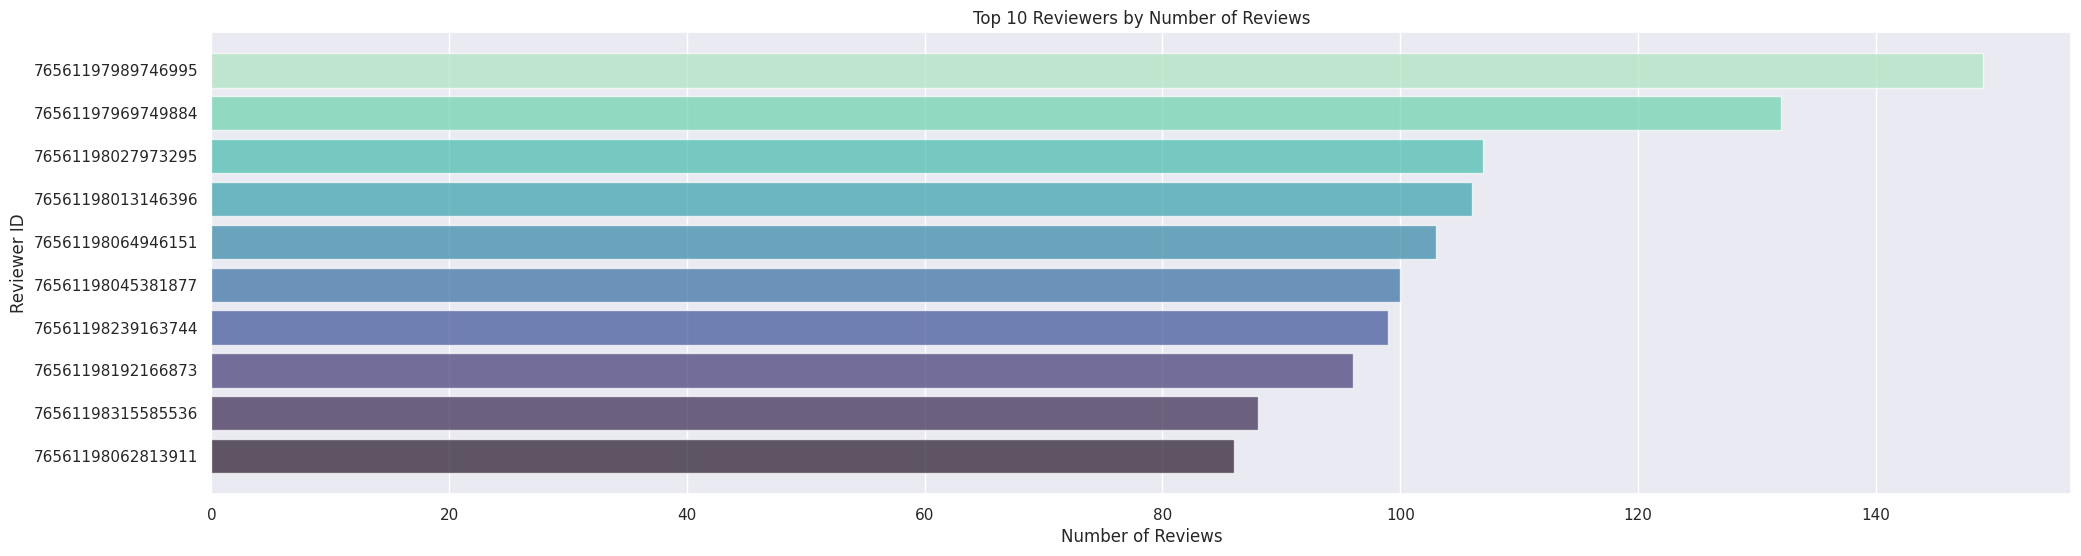

In [ ]:
# PLOTTING
sns.set_theme(style="darkgrid")
palette = sns.color_palette('mako', len(top_reviewers_df))
plt.figure(figsize=(24, 6))
plt.barh(top_reviewers_df['Reviewer'].astype(str), top_reviewers_df.sort_values(by='ReviewCount', ascending=True)['ReviewCount'], color= palette, alpha = 0.7)
plt.title('Top 10 Reviewers by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer ID')
plt.grid(axis='y')

plt.show()

#### **5.2**
**What is the percentage of each language used by these top 10 reviewers when submitting a review?**

In [ ]:
top_reviewers = [reviewer[0] for reviewer in top_reviewers]
language_counts_total = {}

for chunk in pd.read_csv('steam_reviews.csv', chunksize=200000, usecols = ['author.steamid', 'language']):

    # Filter the chunk to include only the rows where the steamid is in the top 10 reviewers
    top_10_reviews = chunk[chunk['author.steamid'].isin(top_reviewers)]

    # Get the count for each language in the top_10_reviews
    language_counts = top_10_reviews['language'].value_counts()

    # Aggregate the counts into the total dictionary
    for language, count in language_counts.items():
        if language in language_counts_total:
            language_counts_total[language] += count
        else:
            language_counts_total[language] = count

# Compute the total number of reviews
total_reviews = sum(language_counts_total.values())

# Compute the percentage
language_percentages = {language: round((count / total_reviews) * 100, 1) for language, count in language_counts_total.items()}

# Display the results
print("Language Counts:", language_counts_total)
print("Language Percentages:", f'{language_percentages}%')

Language Counts: {'english': 575, 'russian': 300, 'schinese': 191}
Language Percentages: {'english': 53.9, 'russian': 28.1, 'schinese': 17.9}%


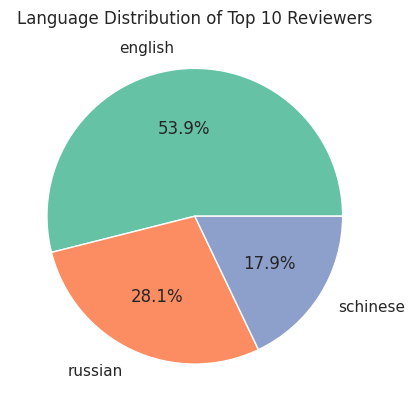

In [ ]:
# PLOTTING

# Define the color palette
palette = sns.color_palette("Set2", len(language_counts_total))

# Use it thanks to the color argument
plt.pie(language_counts_total.values(), labels=language_counts_total.keys(), autopct='%1.1f%%', labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors = palette);
plt.title("Language Distribution of Top 10 Reviewers")
plt.show()

####**5.3**
**Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming. Calculate the average number of valuable votes these reviewers received for their submitted reviews. Elaborate on the results you see.**

In [ ]:
# Dictionary to store the total 'votes_helpful' per author among the top 10
per_author_top_10 = {}

for chunk in pd.read_csv('steam_reviews.csv', chunksize=200000, usecols=['author.steamid', 'votes_helpful']):

    # Filter the chunk to include only the rows where the steamid is in the top 10 reviewers
    top_10_reviews = chunk[chunk['author.steamid'].isin(top_reviewers)]

    # sum the votes they recieved
    sum_votes = top_10_reviews.groupby('author.steamid')['votes_helpful'].sum()

    # Update 'votes_helpful' total for each top 10 reviewer
    for reviewer, sum_vote in sum_votes.items():
        # Add the sum from this chunk to the total
        per_author_top_10[reviewer] = per_author_top_10.get(reviewer, 0) + sum_vote


# Calculate the average 'votes_helpful' for each top reviewer
average_votes_helpful = {reviewer: round(per_author_top_10[reviewer] / top_reviewers_df[top_reviewers_df['Reviewer'] == reviewer]['ReviewCount'].values[0], 1)
                         for reviewer in per_author_top_10}


# Sum all votes helpful
total_votes_helpful = sum(per_author_top_10.values())

# Sum the number of reviews written by all top 10 reviewers
total_reviews_count = top_reviewers_df['ReviewCount'].sum()

# Compute overall avg
overall_avg = total_votes_helpful / total_reviews_count

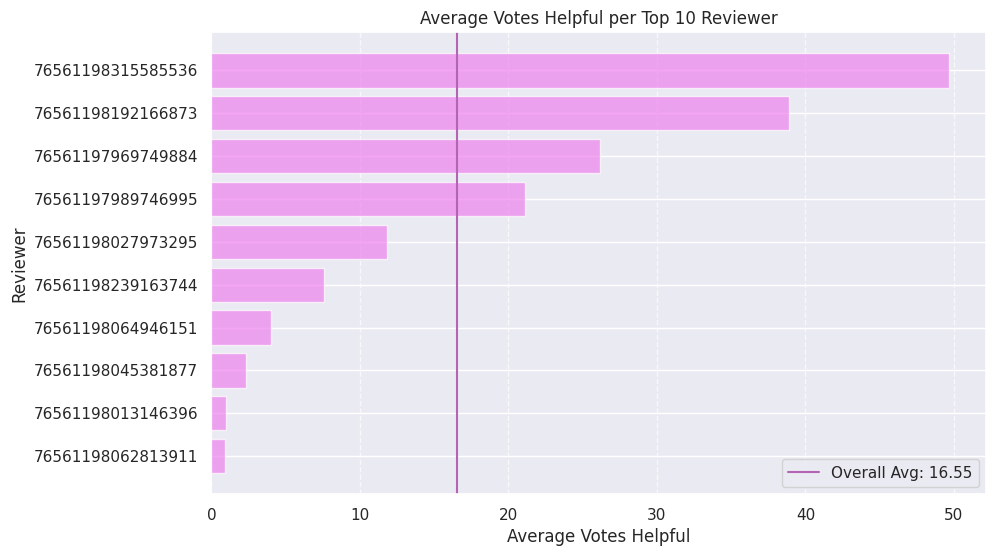

In [ ]:
# PLOTTING
average_votes_helpful_df = pd.DataFrame(list(average_votes_helpful.items()), columns=['Reviewer', 'AvgVotesHelpful'])
# Treat Reviewer column as a string
average_votes_helpful_df['Reviewer'] = average_votes_helpful_df['Reviewer'].astype(str)
# Order values
average_votes_helpful_df = average_votes_helpful_df.sort_values(by='AvgVotesHelpful', ascending=True)


plt.figure(figsize=(10, 6))
plt.barh(average_votes_helpful_df['Reviewer'], average_votes_helpful_df['AvgVotesHelpful'], color='violet', alpha = 0.7)
plt.axvline(overall_avg, color='#B365B3', linestyle='-', label=f'Overall Avg: {overall_avg:.2f}')
plt.xlabel('Average Votes Helpful')
plt.ylabel('Reviewer')
plt.title('Average Votes Helpful per Top 10 Reviewer')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


#### **5.4**
**Create a plot showing the distribution of the number of reviews each application received from the top 10 reviewers, arranged in descending order.**

Because of the large number of apps reviewed by the top 10 reviewers, we used plotly.

By hovering on the bars of the barplot below, we can see which games belong to that bin.

In [ ]:
per_game = {}

for chunk in pd.read_csv('steam_reviews.csv', chunksize=200000, usecols=['app_name', 'author.steamid']):

    # Filter the chunk to include only the rows where the steamid is in the top 10 reviewers
    top_10_reviews = chunk[chunk['author.steamid'].isin(top_reviewers)]

    # Count the reviews in the chunk for each game
    counts = top_10_reviews.groupby('app_name').size()

    # Update the dictionary
    for game, count in counts.items():
        per_game[game] = per_game.get(game, 0) + count

In [ ]:
# Define the ranges for the bins
bin_ranges = list(range(1, 11)) + ["11+ reviews"]

# Initialize a dictionary to count the number of games in each bin
binned_counts = {f"{count} review" if count == 1 else f"{count} reviews": 0 for count in range(1, 11)}
binned_counts["11+ reviews"] = 0

# Dictionary to map each game to its corresponding bin label
game_bin_mapping = {}

# Populate binned_counts and game_bin_mapping based on the review count
for game, count in per_game.items():
    if count <= 10:
        bin_label = f"{count} review" if count == 1 else f"{count} reviews"
    else:
        bin_label = "11+ reviews"
    binned_counts[bin_label] += 1
    game_bin_mapping[game] = bin_label



# PLOTTING

palette = sns.color_palette("ch:start=.2,rot=-.3", n_colors=len(binned_counts))
# Convert the palette to RGBA format for Plotly
colors = [f'rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, 0.8)' for r, g, b in palette]

# Create a bar plot using Plotly
fig = go.Figure()

# Add bars to the plot for each bin
for i, (bin_label, count) in enumerate(binned_counts.items()):
    fig.add_trace(go.Bar(
        x=[bin_label],
        y=[count],
        name=bin_label,
        hoverinfo='text',
        # Set hover text to show the list of games in the bin
        hovertext=f'<b>Games:</b> <br>{",<br>".join([game for game, b in game_bin_mapping.items() if b == bin_label])}',
        # Use the palette
        marker_color=colors[i]
    ))

# Update the layout of the figure
fig.update_layout(
    title='Reviews per Game by Top 10 Reviewers Distribution',
    xaxis_title='Number of Reviews',
    yaxis_title='Number of Games',
    height=900,
    showlegend=False
)

fig.show()

## **RQ6**

#### **6.1**
**Which group is more likely to edit or update their review after submitting it? “English or Spanish!”?**

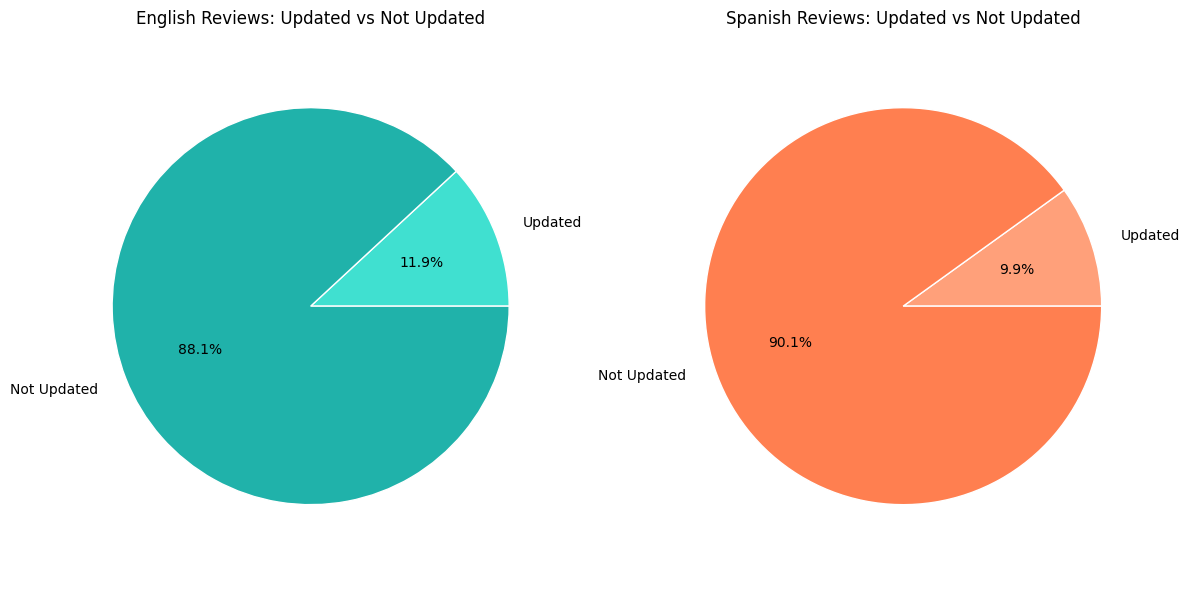

In [ ]:
# Initialize the variables to store the number of reviews in each language
english_reviews = 0
spanish_reviews = 0

# Initialize the variables to store number the edited reviews in each language
english_edited = 0
spanish_edited = 0

# Read the dataset in chunks
for chunk in pd.read_csv('steam_reviews.csv', chunksize=200000, usecols=['timestamp_created', 'timestamp_updated', 'language']):

    # Filter the reviews in each language
    eng = chunk[chunk['language'] == 'english']
    esp = chunk[chunk['language'] == 'spanish']

    # Update the counts for that language
    english_reviews += eng.shape[0]
    spanish_reviews += esp.shape[0]

    # Check if the reviews were updated
    eng_edit = eng[eng['timestamp_created'] != eng['timestamp_updated']]
    esp_edit = esp[esp['timestamp_created'] != esp['timestamp_updated']]

    # Update the counts for that language
    english_edited += eng_edit.shape[0]
    spanish_edited += esp_edit.shape[0]

# Create data for plots
english_data = [english_edited, english_reviews - english_edited]
spanish_data = [spanish_edited, spanish_reviews - spanish_edited]

# Create labels for plots
labels_english = ['Updated', 'Not Updated']
labels_spanish = ['Updated', 'Not Updated']

# PLOTTING
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for English reviews
axs[0].pie(english_data, labels=labels_english, autopct='%1.1f%%',labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=['turquoise', 'lightseagreen'])
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('English Reviews: Updated vs Not Updated')

# Plot for Spanish reviews
axs[1].pie(spanish_data, labels=labels_spanish, autopct='%1.1f%%', labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors = ['lightsalmon', 'coral'])
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].set_title('Spanish Reviews: Updated vs Not Updated')

plt.tight_layout()
plt.show()

##### **Analysis**
Although the percentage of edited reviews is low for both groups, **English** reviews are more likely to get edited or updated.

#### **6.2**
**Provide the average number of games that reviewers from each group have on their Steam accounts and the average number of games for which they write reviews. What can you say about the number you just calculated?**

In [ ]:
def remove_outliers(data_dict):

    values = list(data_dict.values())

    # Compute the first and third quartile
    Q1 = pd.Series(values).quantile(0.25)
    Q3 = pd.Series(values).quantile(0.75)

    # Compute the interquartile range
    IQR = Q3 - Q1

    # Define Lower and Upper Bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dictionary to only retain values that fall within the bounds
    return {key: value for key, value in data_dict.items() if lower_bound <= value <= upper_bound}

For the **average number of games owned** by each group we consider maximum of the column *author.num_games_owned*
for each author.

In [ ]:
eng_games_owned = {}
esp_games_owned = {}

for chunk in pd.read_csv('steam_reviews.csv', chunksize=200000, usecols=['author.steamid','language', 'author.num_games_owned']):

    # Filter the reviews in each language
    eng = chunk[chunk['language'] == 'english']
    esp = chunk[chunk['language'] == 'spanish']

    # Update the entry in the eng dictionary with the max between what's already there and the current max
    for author_id, num_games_owned in eng.groupby('author.steamid')['author.num_games_owned'].max().items():
        if author_id in eng_games_owned:
            eng_games_owned[author_id] = max(eng_games_owned[author_id], num_games_owned)
        else:
            eng_games_owned[author_id] = num_games_owned

    # Update the entry in the esp dictionary with the max between what's already there and the current max
    for author_id, num_games_owned in esp.groupby('author.steamid')['author.num_games_owned'].max().items():
        if author_id in esp_games_owned:
            esp_games_owned[author_id] = max(esp_games_owned[author_id], num_games_owned)
        else:
            esp_games_owned[author_id] = num_games_owned

# Filter the dictionaries to remove the outliers
eng_games_owned_filtered = remove_outliers(eng_games_owned)
esp_games_owned_filtered = remove_outliers(esp_games_owned)

# Compute the means for both groups
eng_mean = round(sum(eng_games_owned_filtered.values()) / len(eng_games_owned_filtered), 1)
esp_mean = round(sum(esp_games_owned_filtered.values()) / len(esp_games_owned_filtered), 1)

print(f'Average number of games owned by English reviewers: {eng_mean}')
print(f'Average number of games owned by Spanish reviewers: {esp_mean}')


Average number of games owned by English reviewers: 74.5
Average number of games owned by Spanish reviewers: 49.2


For the **average number of games for which each group writes reviews** we consider maximum of the column *author.num_games_owned* for each author.

In [ ]:
eng_reviews_per_author = {}
esp_reviews_per_author = {}

for chunk in pd.read_csv('steam_reviews.csv', chunksize=200000, usecols=['author.steamid', 'app_name', 'language']):

    # Filter english and spanish reviews
    eng = chunk[chunk['language'] == 'english']
    esp = chunk[chunk['language'] == 'spanish']

    # Games reviewed for eng reviewers
    for author_id, apps in eng.groupby('author.steamid')['app_name']:
        # The value associated to each key is a set to avoid duplicates
        if author_id not in eng_reviews_per_author:
            eng_reviews_per_author[author_id] = set()
        eng_reviews_per_author[author_id].update(apps.unique())

    # Games reviewed for esp reviewers
    for author_id, apps in esp.groupby('author.steamid')['app_name']:
        # The value associated to each key is a set to avoid duplicates
        if author_id not in esp_reviews_per_author:
            esp_reviews_per_author[author_id] = set()
        esp_reviews_per_author[author_id].update(apps.unique())

# Compute the mean of the number of reviewed apps for each group
eng_avg = round(sum(len(apps) for apps in eng_reviews_per_author.values()) / len(eng_reviews_per_author), 1)
esp_avg = round(sum(len(apps) for apps in esp_reviews_per_author.values()) / len(esp_reviews_per_author), 1)

print(f'Average number of games reviewed per English reviewer: {eng_avg}')
print(f'Average number of games reviewed per Spanish reviewer: {esp_avg}')

Average number of games reviewed per English reviewer: 1.8
Average number of games reviewed per Spanish reviewer: 1.6


##### **Analysis**
The **average number of games** for which users write reviews is **generally low** and suggests that most reviewers contribute only a single review or two reviews.


Although **English-speaking** users tend to **own more games**, they **don’t necessarily review significantly more** than **Spanish-speaking** users.

## **RQ7**

#### **7.1**
**What is the probability of submitting a review and receiving at least one helpful vote from other users?**

We wnat to determine how likely it is for a review to receive at least one helpful vote. The probability is calculated as the fraction of reviews that received helpful votes compared to the total reviews examined

In [ ]:

columns_to_import = ['votes_helpful']

# Initialize variables to store totals
total_reviews = 0
total_reviews_with_helpful_votes = 0
import pandas as pd
# Process each chunk of the CSV file
for chunk in pd.read_csv('steam_reviews.csv',
                          sep=",",
                          header='infer',
                          usecols=columns_to_import,
                          chunksize=100000):

    # Update total reviews
    total_reviews += len(chunk)

    # Update reviews with at least one helpful vote
    total_reviews_with_helpful_votes += chunk[chunk['votes_helpful'] > 0].shape[0]

# Calculate the overall probability of receiving at least one helpful vote
p = total_reviews_with_helpful_votes / total_reviews if total_reviews > 0 else 0

print(f'Probability of receiving at least one helpful vote: {p:.2f}')


Probability of receiving at least one helpful vote: 0.28


#### **7.2**
**What is the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app?**

In [ ]:
" P(A | B) = P(A ∩ B) / P(B)"

import pandas as pd

# Define columns to import
columns_to_import = ['recommended', 'votes_helpful']

# Initialize counters
total_non_recommend_reviews = 0
reviews_with_helpful_votes = 0
total_reviews = 0  # Initialize a counter for total reviews

# Process each chunk of the CSV file
for chunk in pd.read_csv('steam_reviews.csv',
                          sep=",",
                          header='infer',
                          usecols=columns_to_import,
                          chunksize=100000):

    # Update the total number of reviews
    total_reviews += len(chunk)

    # Filter for non-recommended reviews
    non_recommend_reviews = chunk[chunk['recommended'] == False]

    # Update total non-recommended reviews
    total_non_recommend_reviews += len(non_recommend_reviews)

    # Count reviews with at least one helpful vote
    reviews_with_helpful_votes += non_recommend_reviews[non_recommend_reviews['votes_helpful'] > 0].shape[0]

# Calculate the probability
if total_non_recommend_reviews > 0:
    p_a_intersection_b = reviews_with_helpful_votes / total_reviews  # Total reviews counted
    p_b = total_non_recommend_reviews / total_reviews
    probability = p_a_intersection_b / p_b
else:
    probability = 0

print(f"The probability of receiving at least one helpful vote for non-recommend reviews is: {probability:.2f}")






The probability of receiving at least one helpful vote for non-recommend reviews is: 0.48


#### **7.3**
**Is the probability of “a review receiving at least one helpful vote” independent of the probability that “the reviewer has submitted at least five reviews before the current review”? Elaborate on it.**

In [ ]:


columns_to_import = [ 'author.num_reviews', 'timestamp_updated', 'author.steamid', 'votes_helpful']

#  empty DataFrame to store processed data from each chunk
processed_chunks = []

for chunk in pd.read_csv('steam_reviews.csv',
        sep=",",
        header='infer',
        usecols=columns_to_import,
        parse_dates=["timestamp_updated"],
        chunksize=100000):

    # Step 1: Get the most recent review for each author
    recent_reviews = chunk.loc[chunk.groupby('author.steamid')['timestamp_updated'].idxmax()]

    # Step 2: Create a mapping of each author to their most recent number of reviews
    num_reviews_mapping = recent_reviews.set_index('author.steamid')['author.num_reviews'].to_dict()

    # Step 3: Update the chunk with the number of reviews from the most recent review for each author
    chunk['author.num_reviews'] = chunk['author.steamid'].map(num_reviews_mapping)

    # Step 4: Add a column indicating if a reviewer has at least five reviews
    chunk['has_five_reviews'] = chunk['author.num_reviews'] >= 5

    # Append the processed chunk to the list
    processed_chunks.append(chunk)


# Combine all processed chunks into a single DataFrame
dataset = pd.concat(processed_chunks, ignore_index=True)
del processed_chunks  # Free up memory by deleting the list of chunks
# Calculate probabilities for independence check
# P(A): Probability that a review receives at least one helpful vote
P_A = len(dataset[dataset['votes_helpful'] > 0]) / len(dataset)

# P(B): Probability that a reviewer has submitted at least five reviews
P_B = len(dataset[dataset['has_five_reviews']]) / len(dataset)

# P(A ∩ B): Probability that a review receives at least one helpful vote and the reviewer has submitted at least five reviews
P_A_and_B = len(dataset[(dataset['votes_helpful'] > 0) & (dataset['has_five_reviews'])]) / len(dataset)

# Check if the events are independent
independent = P_A_and_B == (P_A * P_B)


<ipython-input-13-72d6ce405f45>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  for chunk in pd.read_csv('steam_reviews.csv',
<ipython-input-13-72d6ce405f45>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  for chunk in pd.read_csv('steam_reviews.csv',
<ipython-input-13-72d6ce405f45>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  for chunk in pd.read_csv('steam_reviews.csv',
<ipython-input-13-72d6ce405f45>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, pleas

In [ ]:
# Print results
print(f"P(A): {P_A:.2f}")
print(f"P(B): {P_B:.2f}")
print(f"P(A ∩ B): {P_A_and_B:.2f}")
print(f"Sono indipendenti: {independent}. The events show dependency, implying that the number of helpful votes may be affected by whether the author has a significant number of prior reviews.")




P(A): 0.28
P(B): 0.46
P(A ∩ B): 0.16
Sono indipendenti: False. The events show dependency, implying that the number of helpful votes may be affected by whether the author has a significant number of prior reviews.


#### **7.4**
**We hypothesize that “reviewers who own a larger number of games are likely to leave fewer reviews on the platform.” Please validate or refute this statement through statistical analysis.**

In this part of the code, we made two assumptions to handle discrepancies in the data:

- **Number of Reviews for Each Author**: Given inconsistencies in the data, we chose to use the number of reviews associated with each author as recorded in their most recent review update. This approach helps to standardize the metric by focusing on the latest data for each author.

- **Games Owned per Author**: Similarly, due to inconsistencies in the number of games owned, across reviews for the same author, we opted to take the maximum value of games owned. By doing so, we assign each author the highest recorded value, assuming it is the most accurate one.

After examining the descriptive statistics of the columns representing games owned and reviews per author, we identified outliers, particularly emphasized by high maximum values. To address these, we applied the **Interquartile Range (IQR)** method to detect and remove these extreme values.

**Normality check**: Next, we analyzed the data distribution to ensure it met the assumptions for further statistical testing. To do this, we used several techniques, but we’ll present the **Q-Q plot** here as it provides an intuitive way to visually assess how the quantiles deviate from a normal distribution. In our case, the plot enabled us to see deviations from normality effectively.

**Correlation and linear regression analysis**: Following this, we employed the Spearman correlation coefficient to gain initial insight into the relationship between the two metrics. We observed a moderately positive and statistically significant correlation, with a p-value that confirms significance at the 95% confidence level (α = 0.05). Given this preliminary association, we proceeded to a linear regression analysis to further explore whether the number of games owned by an author influences the number of reviews they write.

The relationship between `author.num_games_owned` and `author.num_reviews` is statistically significant, but the correlation is not very strong, and the model explains only a small portion of the data variability (17.5%). Therefore, while the variable `author.num_games_owned` is relevant, it is not sufficient on its own to predict the number of reviews an author might write.




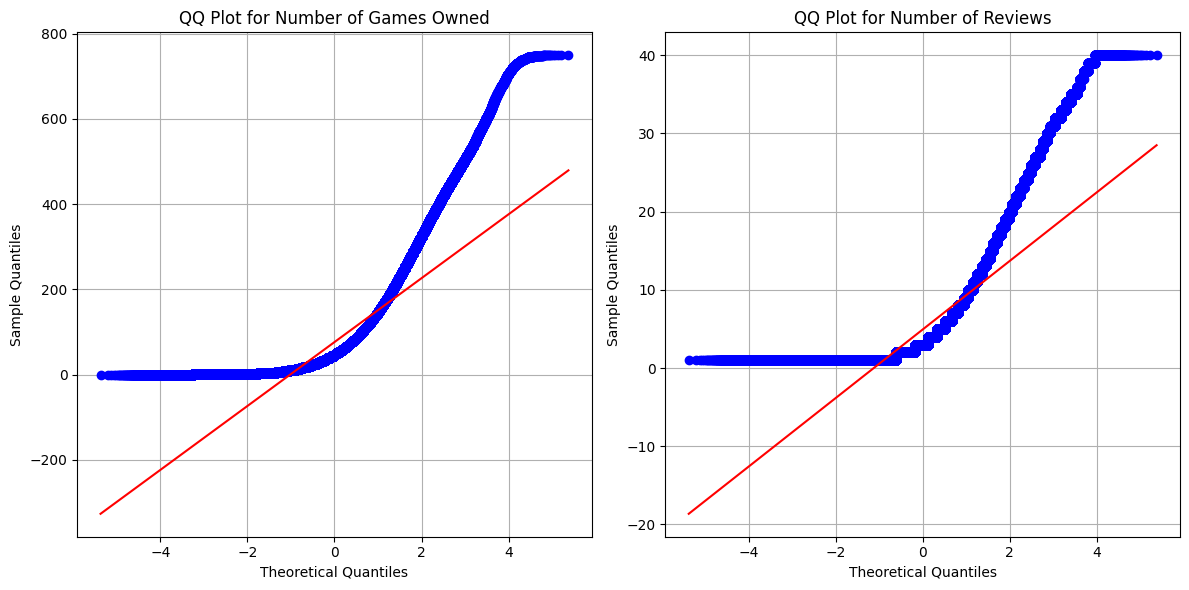

Correlazione Spearman: 0.5243015907714761, p-value: 0.0
                            OLS Regression Results                            
Dep. Variable:     author.num_reviews   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                 3.813e+06
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:24:45   Log-Likelihood:            -5.2957e+07
No. Observations:            18023469   AIC:                         1.059e+08
Df Residuals:                18023467   BIC:                         1.059e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the columns to import
columns_to_import = ['author.num_games_owned', 'author.num_reviews', 'author.steamid','timestamp_updated']

# Initialize an empty list to store each processed chunk
processed_chunks = []

# Process each chunk to map max games, remove outliers, and accumulate results
for chunk in pd.read_csv('steam_reviews.csv',
        sep=",",
        header='infer',
        usecols=columns_to_import,
        chunksize=100000):
    # Step 1: Get the most recent review for each author in the chunk
    recent_reviews = chunk.loc[chunk.groupby('author.steamid')['timestamp_updated'].idxmax()]

    # Step 2: Create a mapping of each author to their most recent number of reviews
    num_reviews_mapping = recent_reviews.set_index('author.steamid')['author.num_reviews'].to_dict()

    # Step 3: Update the chunk with the number of reviews from the most recent review for each author
    chunk['author.num_reviews'] = chunk['author.steamid'].map(num_reviews_mapping)

    # Step 4: Calculate the max number of games owned for each author in the chunk
    max_games_owned = chunk.groupby('author.steamid')['author.num_games_owned'].max()
    games_owned_mapping = max_games_owned.to_dict()
    chunk['author.num_games_owned'] = chunk['author.steamid'].map(games_owned_mapping)

    # Step 5: Remove outliers for 'author.num_games_owned' in the chunk
    Q1_games = chunk['author.num_games_owned'].quantile(0.25)
    Q3_games = chunk['author.num_games_owned'].quantile(0.75)
    IQR_games = Q3_games - Q1_games
    lower_bound_games = Q1_games - 1.5 * IQR_games
    upper_bound_games = Q3_games + 1.5 * IQR_games
    chunk = chunk[(chunk['author.num_games_owned'] >= lower_bound_games) &
                  (chunk['author.num_games_owned'] <= upper_bound_games)]

    # Step 6: Remove outliers for 'author.num_reviews' in the chunk
    Q1_reviews = chunk['author.num_reviews'].quantile(0.25)
    Q3_reviews = chunk['author.num_reviews'].quantile(0.75)
    IQR_reviews = Q3_reviews - Q1_reviews
    lower_bound_reviews = Q1_reviews - 1.5 * IQR_reviews
    upper_bound_reviews = Q3_reviews + 1.5 * IQR_reviews
    chunk = chunk[(chunk['author.num_reviews'] >= lower_bound_reviews) &
                  (chunk['author.num_reviews'] <= upper_bound_reviews)]

    # Append the processed chunk to the list
    processed_chunks.append(chunk)

# Concatenate all processed chunks into a single DataFrame
dataset = pd.concat(processed_chunks, ignore_index=True)
del processed_chunks
# QQ Plot to check for normality of 'author.num_games_owned' and 'author.num_reviews'
plt.figure(figsize=(12, 6))

# QQ Plot for 'author.num_games_owned'
plt.subplot(1, 2, 1)
stats.probplot(dataset['author.num_games_owned'], dist="norm", plot=plt)
plt.title('QQ Plot for Number of Games Owned')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()

# QQ Plot for 'author.num_reviews'
plt.subplot(1, 2, 2)
stats.probplot(dataset['author.num_reviews'], dist="norm", plot=plt)
plt.title('QQ Plot for Number of Reviews')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()


from scipy.stats import pearsonr, spearmanr

df = dataset
correlation, p_value = spearmanr(df['author.num_games_owned'], df['author.num_reviews'])
print(f"Correlazione Spearman: {correlation}, p-value: {p_value}")


import statsmodels.api as sm

# Definisci variabile dipendente e indipendente
X = df['author.num_games_owned']
y = df['author.num_reviews']

# Aggiungi un termine di intercetta a X
X = sm.add_constant(X)

# Modello di regressione lineare
model = sm.OLS(y, X).fit()
print(model.summary())



#### **7.5**
**Ask an LLM tool (such as ChatGPT, Claude AI, Gemini, Perplexity, etc.) to understand the purposes of histograms, bar plots, scatterplots, and pie charts and what kind of insights they offer that might be useful for statistical analysis. Are those results trustworthy, or can you do something to improve somehow the confidence in the suggestions given by the LLM?**

According to chatgpt :

**Histograms**
Purpose: Display the distribution of a continuous variable by showing the frequency of data points within specified ranges (bins).
Insights: Help identify the shape of the distribution (e.g., normal, skewed), detect outliers, and understand variability.
Trustworthiness: Results can be trustworthy if the bins are appropriately chosen. Adjusting bin width and alignment can improve clarity.

**Bar Plots**
Purpose: Compare categorical data by displaying the frequency or value of each category.
Insights: Useful for identifying patterns and trends among categories, making it easy to compare sizes directly.
Trustworthiness: Ensure categories are clearly defined and avoid misleading scales. Consistent coloring and labeling enhance understanding.

**Scatterplots**
Purpose: Illustrate relationships between two continuous variables by plotting points on a Cartesian plane.
Insights: Help visualize correlations, trends, and potential outliers in the data.
Trustworthiness: Consider adding trend lines or statistical annotations to provide context. Analyzing residuals can also improve confidence in the observed relationships.

**Pie Charts**
Purpose: Show proportions of a whole by dividing a circle into slices representing categories.
Insights: Useful for visualizing the relative size of each category, though they can be less effective for precise comparisons.
Trustworthiness: Ensure categories sum to 100% and avoid using too many slices, which can confuse interpretation.


I would add a few considerations.

- First, I would expand the descriptions to include aspects such as the shape of the distribution in histograms and the distinction between aggregation and comparison in bar plots. Additionally, I would suggest specific practices to improve visualization, such as choosing appropriate bins in histograms and using trend lines in scatterplots.

- It’s also important to emphasize the significance of clear representation, limiting the number of categories in pie charts and using appropriate scales in bar plots. Furthermore, I would include suggestions for statistical analysis, like adding annotations and correlation coefficients in scatterplots, to provide richer context.

- Finally, I would mention the limitations of each type of chart, such as the difficulty in comparison in pie charts when categories are similar. These additions could make the discussion more comprehensive and helpful for those approaching data visualization.

# **Bonus**

#### **B.1**
**Perform sentiment analysis on the review texts in the top 3 languages and classify them as positive, negative, or neutral.**

In this section, we would like to present our approach to sentiment analysis. We utilized NLTK as a tool for conducting the sentiment analysis. First and foremost, we performed text processing using various functions. We employed regular expressions as well as NLTK functions that allowed us to carry out operations such as removing stop words and special characters, resulting in clearer text suitable for analysis.

The sentiment scores were calculated using the polarity scores, which return several metrics. However, we focused on extracting the compound score. The sentiments were then categorized into negative, neutral, and positive. Subsequently, the code visualizes the distribution of these sentiment categories.


In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')


# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define function for cleaning text
def clean_review_text(text):
    # Remove unwanted symbols and numbers, convert to lowercase
    text = re.sub(r"[^a-zA-Z?!.,]+", ' ', text)
    text = re.sub(r'\d+', '', text)
    # Remove punctuation and stopwords
    nopunc = ''.join([char for char in text if char not in string.punctuation]).lower()
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(nopunc)
    cleaned_text = [word for word in words if word not in stop_words and word not in {'game', 'get', 'gt', 'got', 'play'}]
    return ' '.join(cleaned_text)

# Define chunk loading and concatenation
data_chunks = []
chunk_size = 20000

# Define data types to reduce memory usage
dtype_dict = {
    'recommended': 'category',
    'language': 'category',
    'votes_helpful': 'int32'
}

# Read and concatenate chunks
for chunk in pd.read_csv('steam_reviews.csv', sep=",", header='infer',
                         usecols=['review', 'recommended', 'language', 'votes_helpful'],
                         dtype=dtype_dict, chunksize=chunk_size):

    # Filter English reviews and drop rows with missing reviews in each chunk
    chunk = chunk[chunk['language'] == 'english'].dropna(subset=['review'])
    data_chunks.append(chunk)  # Append filtered chunk to list


data_clean = pd.concat(data_chunks, ignore_index=True)
del data_chunks  # Free up memory by deleting the list of chunks

# Apply text cleaning to the entire DataFrame
data_clean['review'] = data_clean['review'].astype(str).apply(clean_review_text)

# Calculate sentiment scores for the cleaned reviews
data_clean['sentiment_score'] = data_clean['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize sentiment based on score
data_clean['sentiment_category'] = pd.cut(
    data_clean['sentiment_score'],
    bins=[-float('inf'), -0.1, 0.1, float('inf')],
    labels=['Negativo', 'Neutro', 'Positivo']
)


print(data_clean[['review', 'sentiment_score', 'sentiment_category']].head())


print(data_clean['sentiment_score'].describe())

# Visualize the distribution of sentiment categories
sentiment_counts = data_clean['sentiment_category'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title(' Sentiment categories distribution')
plt.xlabel('Sentiment category')
plt.ylabel('Conunts')
plt.show()


#### **B.2**
**What is the distribution of sentiment across all reviews?**

In [ ]:
# Visualizza la distribuzione delle categorie di sentiment
sentiment_counts = data_clean['sentiment_category'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribuzione delle Categorie di Sentiment')
plt.xlabel('Categoria di Sentiment')
plt.ylabel('Conteggio')
plt.show()

#### **B.3**
**Does the sentiment analysis align with whether the application is recommended or not? Explain any insights from this comparison.**

To outline the relationship between sentiment categories and the recommendation status of the reviews, we used a contingency table from which we derived percentages indicating how recommendations correlate with sentiment categories.

Due to runtime problems of our code, we examine a subset of 60,000 reviews.

Looking at the overall results without categorizing, it’s clear that the number of "not recommended" reviews is relatively low. Therefore, we would expect a similar distribution across individual categories. However, an interesting aspect emerges in the case of negative reviews: although most of them are classified as "recommended," there is still 16% of negative reviews that are marked as "not recommended." This figure is significant when compared to the mere 2% of total reviews that are "not recommended."

In other words, 16% of negative reviews being marked as "not recommended" represents a high percentage relative to the rest of the non-recommended reviews. This suggests that the model, while showing a decent ability to correctly classify negative reviews, tends to flag a significant portion of them as "not recommended," indicating a more critical distinction compared to other types of reviews.

In [ ]:
# Create a contingency table (cross-tabulation) of sentiment category vs. recommendation status
alignment_table = pd.crosstab(data_clean['sentiment_category'], data_clean['recommended'])

# Display the alignment table
print("Contingency Table (Sentiment Category vs Recommendation Status):")
print(alignment_table)

# Calculate alignment percentages
total_positive_recommended = alignment_table.loc['Positivo', True] / alignment_table.loc['Positivo'].sum() * 100
total_negative_not_recommended = alignment_table.loc['Negativo', False] / alignment_table.loc['Negativo'].sum() * 100
total_neutral_recommended = alignment_table.loc['Neutro', True] / alignment_table.loc['Neutro'].sum() * 100
total_neutral_not_recommended = alignment_table.loc['Neutro', False] / alignment_table.loc['Neutro'].sum() * 100

# Print the percentages
print(f"\nPercentage of Positive Sentiments that recommend the app: {total_positive_recommended:.2f}%")
print(f"Percentage of Negative Sentiments that do not recommend the app: {total_negative_not_recommended:.2f}%")
print(f"Percentage of Neutral Sentiments that recommend the app: {total_neutral_recommended:.2f}%")
print(f"Percentage of Neutral Sentiments that do not recommend the app: {total_neutral_not_recommended:.2f}%")



data = {
    'Sentiment': ['Positivo', 'Positivo', 'Neutro', 'Neutro', 'Negativo', 'Negativo'],
    'Recommendation': ['Recommended', 'Not Recommended', 'Recommended', 'Not Recommended', 'Recommended', 'Not Recommended'],
    'Percentage': [
        total_positive_recommended,
        100 - total_positive_recommended,
        total_neutral_recommended,
        100 - total_neutral_recommended,
        100 - total_negative_not_recommended,
        total_negative_not_recommended
    ]
}

df_plot = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='Sentiment', y='Percentage', hue='Recommendation', palette=['#2ecc71', '#e74c3c'])
plt.title('Percentage of Recommendations by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage')
plt.legend(title='Recommendation Status')


plt.yticks(range(0, 101, 10))
plt.ylim(0, 100)

plt.show()


#### **B.4**
**Is there a correlation between the sentiment of a review and the number of helpfulness votes it receives? Provide an analysis of the results and discuss potential trends.**

# **Algorithmic Question**

You are given two positive integers, $n$ (where $1\le n \le 10^9$) and k (where $q \le k \le 100$). Your task is to express $n$ as the sum of $k$ positive integers, all having the same parity (i.e., all have the same remainder when divided by 2, meaning they are either all even or all odd).
In other words, find $a_1, a_2, ..., a_k$ each $a_i \gt 0, n = a_1 + a_2 + ... + a_k$, and all $a_i$ simultaneously are either even or odd.
If it's impossible to represent $n$ in this way, report that no such representation exists.

**Input**

In the first input line, you will receive a number t (where $1 \le t \le 100$), representing the number of test cases. The following $t$ lines will contain two values, $n$ and $k$, corresponding to each test case.

**Output**

For each test case, if it is possible to represent $n$ as the sum of $k$ positive integers, all of the same parity (either all even or all odd), print "YES" and provide the corresponding values of $a_i$ in the next line. If there are multiple valid solutions, you can print any of them. If such a representation is not possible for a given test case, print "NO".

**Examples**
---

**Input**
```
8
10 3
100 4
8 7
97 2
8 8
3 10
5 3
```
**Output**
```
YES
4 2 4
YES
55 5 5 35
NO
NO
YES
1 1 1 1 1 1 1 1
NO
YES
3 1 1
```

#### **A.1**
**Implement a Python program to solve the problem above.**

In [ ]:
def can_sum_with_same_parity(n, k):
    # Check for odd sum possibility
    if n >= k and (n - k) % 2 == 0:
        # All odd solution
        return ["YES", " ".join([str(1)] * (k - 1) + [str(n - (k - 1))])]

    # Check for even sum possibility
    if n >= 2 * k and (n - 2 * k) % 2 == 0:
        # All even solution
        return ["YES", " ".join([str(2)] * (k - 1) + [str(n - 2 * (k - 1))])]

    return ["NO"]

def main():
    t = int(input("Enter the number of test cases: "))
    results = []

    for _ in range(t):
        try:
            n, k = map(int, input("Enter n and k separated by space: ").split())
            result = can_sum_with_same_parity(n, k)
            results.append(result)
        except ValueError:
            print("Invalid input. Please enter two integers separated by a space.")
            continue  # Skip to the next iteration if there's an error

    for result in results:
        print(result[0])
        if result[0] == "YES":
            print(result[1])

if __name__ == "__main__":
    main()

Enter the number of test cases: 8
Enter n and k separated by space: 10 3
Enter n and k separated by space: 100 4
Enter n and k separated by space: 8 7
Enter n and k separated by space: 97 2
Enter n and k separated by space: 8 8
Enter n and k separated by space: 3 10
Enter n and k separated by space: 5 3
Enter n and k separated by space: 10 3
YES
2 2 6
YES
1 1 1 97
NO
NO
YES
1 1 1 1 1 1 1 1
NO
YES
1 1 3
YES
2 2 6


#### **A.2**
**Please provide an analysis of your code's time complexity using Big O notation.**

##Time Complexity Analysis

•	The time complexity of the can_sum_with_same_parity function for each test case is  O(1) , as it consists of constant-time operations (arithmetic checks and conditionals).

•	Thus, for  t  test cases, the overall time complexity is:
O(t) *

1.	**Function: `can_sum_with_same_parity(n, k)`**:
This function checks whether it is possible to express  n  as the sum of  k  positive integers with the same parity (either all odd or all even).
   - It first checks if it’s possible to represent  n  using  k  odd integers:
   - The condition n >= k ensures that there are enough integers to sum.
   - The condition (n - k) % 2 == 0 ensures that the sum can maintain odd parity.
   - If the first condition fails, it checks for  k  even integers:
   - The condition n >= 2 * k ensures that each integer can be at least 2.
   - The condition (n - 2 * k) % 2 == 0 ensures that the sum can maintain even parity.
•	If neither condition is met, it returns “NO”.
2.	**Main Function : `def main()`**:
- Reads input for the number of test cases and the corresponding  n  and  k  values.
- Collects results for each test case and prints them.


-	The time complexity of the can_sum_with_same_parity function for each test case is  O(1) , as it consists of constant-time operations (arithmetic checks and conditionals).
- Thus, for  t  test cases, the overall time complexity is:
O(t)

#### **A.3**
**Ask an LLM tool (such as ChatGPT, Claude AI, Gemini, Perplexity, etc.) to evaluate the time complexity of your code using Big O notation. Is the assessment accurate? If it differs from your previous analysis, which would be correct? Please explain your reasoning.**

Assessment of Time Complexity Using LLM

If we were to ask a language model like ChatGPT to evaluate the time complexity, the assessment would likely align with the analysis provided, stating that the complexity is O(t) . This assessment is accurate because the function performs a constant amount of work for each test case.

Evaluation
Regarding the code I wrote, Claude's artificial intelligence tool said, "Even in the worst case, the algorithm runs in linear time, because for each test case k operations are performed and this is repeated t times." The output of my code is presented below.
Claude Comparison
Let me analyze the time complexity of this code using Big O notation:

can_sum_with_same_parity() function:

Performs simple arithmetic operations (subtraction, modulo)
Creates and joins strings, which scales with k
This function's complexity is O(k)
main() function:

Has a loop for t test cases
For each test case:
input() and split() operations are O(1)
calling can_sum_with_same_parity() is O(k)
Adding results to list is O(1)
Loop for printing results is O(t)
Total time complexity: O(t * k)

Where:

t: number of test cases
k: number of elements requested in each test case
Even in the worst case, the algorithm runs in linear time since k operations are performed for each test case, and this is repeated t times.

Also, there are some syntax errors in the code:

for * in range(t) should be for _ in range(t)
can*sum_with_same_parity should be can_sum_with_same_parity
if **name** should be if __name__